In [39]:
import utils
import Graph_Exploration
import importlib
importlib.reload(utils)
import networkx as nx
import numpy as np
import json
import pickle

In [40]:
import sys
sys.prefix

'/home/deborah/FS24/social_media/project/project-git/Social-Media-Analytics---Project/.venv'

In [41]:
nodes,edges = utils.Load_data("data/musae_facebook_target.csv","data/musae_facebook_edges.csv")

In [42]:
G = utils.Create_Graph(nodes=nodes , edges=edges)

In [43]:
degree_nodes = G.degree()
print(degree_nodes)
degree_nodes(0)

[(0, 1), (1, 34), (2, 12), (3, 10), (4, 51), (5, 22), (6, 16), (7, 3), (8, 3), (9, 2), (10, 3), (11, 4), (12, 6), (13, 17), (14, 55), (15, 3), (16, 1), (17, 4), (18, 38), (19, 13), (20, 1), (21, 3), (22, 28), (23, 4), (24, 4), (25, 5), (26, 30), (27, 6), (28, 4), (29, 15), (30, 5), (31, 10), (32, 43), (33, 2), (34, 2), (35, 6), (36, 4), (37, 18), (38, 6), (39, 17), (40, 5), (41, 23), (42, 6), (43, 13), (44, 59), (45, 13), (46, 9), (47, 13), (48, 4), (49, 31), (50, 20), (51, 11), (52, 11), (53, 1), (54, 6), (55, 17), (56, 20), (57, 15), (58, 6), (59, 3), (60, 16), (61, 94), (62, 2), (63, 2), (64, 23), (65, 12), (66, 10), (67, 6), (68, 5), (69, 8), (70, 19), (71, 1), (72, 20), (73, 8), (74, 25), (75, 7), (76, 1), (77, 29), (78, 1), (79, 8), (80, 6), (81, 47), (82, 5), (83, 10), (84, 5), (85, 8), (86, 7), (87, 2), (88, 49), (89, 5), (90, 30), (91, 10), (92, 6), (93, 2), (94, 20), (95, 48), (96, 6), (97, 4), (98, 20), (99, 32), (100, 10), (101, 45), (102, 13), (103, 19), (104, 30), (105, 8

1

Louvain first step

In [44]:
def modularity_gain(node,neighbor):
    m = G.number_of_edges()
    di = G.degree(node)
    dj = G.degree(neighbor)
    if neighbor not in com_inv:
        return 1/(2*m)*(2-di*dj/m)
    else:
        com_index = com_inv[neighbor]
        members = com[com_index]
        shared_degree = 0
        for m in members:
            if m in G.neighbors(node):
                shared_degree +=2
        #print("shared_dergee",shared_degree)
        return 1/(2*m)*(shared_degree-di*dj/m)


#modularity_gain(0,18427)

com = {}
com_inv = {}
for v in G.nodes():
    #delete v from its community:
    if v in com_inv.keys():
        com_index = com_inv[v]
        del com_inv[v]
        com[com_index].remove(v) 
    #Find the neighbor with highest modularity gain
    #print("com_inv",com_inv)
    gains = []
    for neighbor in G.neighbors(v):
        gains.append((modularity_gain(v,neighbor),neighbor))
    closest_node = max(gains)[1]
    # Add v to the same community as the closest_node
    #check if closest node is already in a community:
    if closest_node in com_inv.keys():
        com_index = com_inv[closest_node]
        com_inv[v]=com_index
        com[com_index].add(v)
    else:
        #Add v and neighbor in a new created community
        com_index = len(com)
        com_inv[v]=com_index
        com_inv[closest_node]= com_index
        com[com_index] = {v,closest_node}
    
    #if len(com)>1000:
     #   break
print(com)
print(len(com))
print(len(com_inv))
print(len(com.values()))

KeyboardInterrupt: 

Passage 1 for traversing each node once took 37m37.6s.

In [46]:
with open('data/com_temp', 'rb') as file:
    com = pickle.load(file)

UnpicklingError: invalid load key, '{'.

In [164]:
#In case of storeing the comunities 
with open('data/com_temp', 'wb') as file:
    pickle.dump(com, file)
with open('data/com_temp_inv', 'wb') as file:
    pickle.dump(com_inv, file)
#json.dump(com, open('data/com_temp', 'w'))
#json.dump(com_inv, open('data/com_temp_inv', 'w'))
with open('data/com_temp', 'rb') as file:
    loaded_dict = pickle.load(file)
print(loaded_dict)

{0: {0, 8323, 16644, 14087, 14602, 11659, 396, 10764, 11276, 17807, 21386, 15889, 5371, 5913, 9884, 12319, 6692, 6821, 8358, 295, 17959, 21285, 21292, 3758, 4783, 5934, 15921, 16687, 21808, 22322, 12726, 9655, 20150, 4665, 3897, 18873, 21437, 22077, 21184, 4929, 2632, 5065, 19017, 1099, 2257, 20690, 1365, 8791, 16343, 4831, 8289, 14305, 14051, 16486, 1898, 3181, 5742, 13166, 20845, 8945, 12273, 11763, 17397, 18165, 18427, 15356, 7679}, 1: {1}, 2: {21888, 19969, 2, 5624, 19337, 21641, 15120, 11537, 15378, 17554, 13205, 21275, 20251, 18461, 18204, 18333, 22304, 16926, 8229, 17318, 21418, 8495, 21040, 13233, 17458, 12467, 11829, 14905, 17728, 19524, 2629, 15173, 21064, 6353, 19923, 21203, 9048, 18265, 16479, 5857, 15074, 20580, 10089, 17005, 7279, 20207, 12401, 17778, 21880, 4601, 1533, 126, 22399}, 3: {3843, 3, 1286, 1799, 16526, 5904, 4243, 16147, 20502, 3479, 7192, 8474, 15517, 21791, 7073, 19361, 4899, 4388, 293, 4901, 6819, 8361, 19753, 10411, 10796, 12333, 5550, 20274, 14715, 9654, 

In [165]:
#Second passage

def construct_community_graph(com, G):
    # Initialize empty graph
    community_graph = nx.Graph()
    
    # Calculate total degree for each node in the original graph
    node_degrees = dict(G.degree())
    
    # Add nodes for each community and calculate total degrees
    total_degrees = {}
    for community, members in com.items():
        community_graph.add_node(community, size=len(members))
        total_degrees[community] = sum(node_degrees[node] for node in members)
    
    # Add edges between community nodes and calculate shared degrees
    for community1, members1 in com.items():
        for community2, members2 in com.items():
            if community1 != community2:
                shared_degree = sum(len(set(G.neighbors(node)).intersection(members2)) for node in members1)
                #print(shared_degree)
                if shared_degree > 0:
                    community_graph.add_edge(community1, community2, shared_degree=shared_degree)
        
    # Add total degree as node attribute
    nx.set_node_attributes(community_graph, total_degrees, 'total_degree')
    
    return community_graph



hyper_graph = construct_community_graph(com, com_inv,G)

In [174]:
print(hyper_graph.number_of_nodes())
print(hyper_graph.number_of_edges())
print(hyper_graph.edges())
print(nx.is_connected(hyper_graph))
hyper_graph.nodes[0].get('total_degree')

2859
18866
[(0, 3), (0, 43), (0, 61), (0, 98), (0, 103), (0, 116), (0, 143), (0, 164), (0, 198), (0, 227), (0, 251), (0, 253), (0, 254), (0, 255), (0, 282), (0, 319), (0, 344), (0, 353), (0, 361), (0, 381), (0, 400), (0, 441), (0, 482), (0, 495), (0, 505), (0, 507), (0, 536), (0, 550), (0, 565), (0, 577), (0, 584), (0, 610), (0, 636), (0, 692), (0, 744), (0, 822), (0, 839), (0, 854), (0, 856), (0, 918), (0, 936), (0, 957), (0, 998), (0, 1008), (0, 1150), (0, 1224), (0, 1236), (0, 1237), (0, 1419), (0, 1624), (0, 1706), (0, 1713), (0, 1797), (0, 1829), (0, 1903), (0, 1959), (0, 1979), (0, 2253), (0, 2305), (0, 2649), (1, 10), (1, 124), (1, 127), (1, 203), (1, 274), (1, 292), (1, 597), (1, 1517), (2, 18), (2, 47), (2, 59), (2, 83), (2, 86), (2, 104), (2, 130), (2, 134), (2, 141), (2, 164), (2, 179), (2, 181), (2, 197), (2, 198), (2, 204), (2, 206), (2, 227), (2, 229), (2, 230), (2, 251), (2, 283), (2, 284), (2, 303), (2, 306), (2, 338), (2, 346), (2, 378), (2, 400), (2, 401), (2, 407), (

291

In [226]:
def modularity_gain_hyper(node,neighbor,com,com_inv):
    m = G.number_of_edges()
    di = hyper_graph.nodes[node].get('total_degree')
    dj = hyper_graph.nodes[neighbor].get('total_degree')
    if neighbor not in com_inv:
        shared_degree = hyper_graph[node][neighbor]['shared_degree']
        return 1/(2*m)*(2*shared_degree-di*dj/m)
    else:
        com_index = com_inv[neighbor]
        members = com[com_index]
        shared_degree = 0
        for m in members:
            if m in hyper_graph.neighbors(node):
                shared_degree +=2*hyper_graph[node][neighbor]['shared_degree']
        #print("shared_dergee",shared_degree)
        return 1/(2*m)*(shared_degree-di*dj/m)


    #modularity_gain(0,18427)
def second_passage():
    hyper_com = {}
    hyper_com_inv = {}
    changes = True
    criteria = True
    while criteria and changes:
        print("begin of passage")
        changes = False
        criteria = False
        for v in hyper_graph.nodes():
            original = "undefined"
            #delete v from its community:
            if v in hyper_com_inv.keys():
                hyper_com_index = hyper_com_inv[v]
                del hyper_com_inv[v]
                hyper_com[hyper_com_index].remove(v) 
                original = hyper_com_index
            #Find the neighbor with highest modularity gain
            #print("com_inv",com_inv)
            gains = []
            for neighbor in hyper_graph.neighbors(v):
                gains.append((modularity_gain_hyper(v,neighbor,hyper_com,hyper_com_inv),neighbor))
            closest_node = max(gains)[1]
            #print(max(gains)[0])
            if max(gains)[0]>0.005:
                criteria = True
            # Add v to the same community as the closest_node
            #check if closest node is already in a community:
            if closest_node in hyper_com_inv.keys():
                hyper_com_index = hyper_com_inv[closest_node]
                hyper_com_inv[v]=hyper_com_index
                hyper_com[hyper_com_index].add(v)
            else:
                #Add v and neighbor in a new 
                # d community
                hyper_com_index = len(hyper_com)
                hyper_com_inv[v]=hyper_com_index
                hyper_com_inv[closest_node]= hyper_com_index
                hyper_com[hyper_com_index] = {v,closest_node}
            #print(original,hyper_com_index)
            if original!=hyper_com_index:
                changes=True
            
            if v>20:
                break
    if criteria==False:
        print("stopped because of mod")
    if changes==False:
        print("stopped because of changes")
    print(hyper_com)
    return hyper_com
h = second_passage()

begin of passage
begin of passage
begin of passage
begin of passage
begin of passage
begin of passage
begin of passage
begin of passage
begin of passage
begin of passage
begin of passage
begin of passage
begin of passage
begin of passage
begin of passage
begin of passage
begin of passage
begin of passage
begin of passage
begin of passage
begin of passage
begin of passage
begin of passage
begin of passage
begin of passage
begin of passage
begin of passage
begin of passage
begin of passage
begin of passage
begin of passage
begin of passage
begin of passage
begin of passage
begin of passage
begin of passage
begin of passage
begin of passage
begin of passage
begin of passage
begin of passage
begin of passage
begin of passage
begin of passage
begin of passage
begin of passage
begin of passage
begin of passage
begin of passage
begin of passage
begin of passage
begin of passage
begin of passage
begin of passage
begin of passage
begin of passage
begin of passage
begin of passage
begin of passa

In [227]:
len(h)

227

second passage took 4m7s. 663 communities were detected.

In [195]:
print(type(h))
len(h)
final_com = {}
for hyper,hyper_val in h.items():
    final_com[hyper] = [node for node_set in hyper_val for node in com[node_set]] # [item for sublist in nested_list for item in sublist]
    #for node in hyper_val:
     #   final_com[hyper].union(com[node])
print(final_com)


<class 'dict'>
{0: [0, 8323, 16644, 14087, 14602, 11659, 396, 10764, 11276, 17807, 21386, 15889, 5913, 9884, 12319, 6692, 6821, 8358, 295, 18427, 17959, 21285, 21292, 3758, 4783, 5934, 15921, 16687, 21808, 22322, 12726, 9655, 20150, 4665, 3897, 18873, 21437, 22077, 21184, 4929, 2632, 5065, 19017, 1099, 2257, 20690, 1365, 8791, 16343, 4831, 8289, 14305, 14051, 16486, 1898, 3181, 5742, 13166, 20845, 8945, 12273, 11763, 17397, 18165, 5371, 15356, 7679, 15499, 7526, 4168, 7771, 10307, 4564, 18229, 11718, 12794, 4212, 119, 14266], 1: [1], 2: [1564, 17344, 17444, 8261, 19174, 19591, 21284, 20062, 21722, 20715, 21036, 20222, 19311, 19739, 19985, 21135, 20474, 17275, 1566, 21888, 19969, 2, 21880, 19337, 21641, 15120, 11537, 15378, 17554, 13205, 20251, 18204, 18333, 16926, 18461, 21275, 22304, 8229, 17318, 21418, 8495, 21040, 13233, 17458, 12467, 11829, 14905, 17728, 19524, 2629, 15173, 21064, 6353, 19923, 21203, 9048, 18265, 16479, 5857, 15074, 20580, 10089, 17005, 7279, 20207, 12401, 17778, 5

In [204]:
len(final_com)
check = [node for nodes_set in final_com.values() for node in nodes_set]
print(len(check))
print(G.number_of_nodes())

22470
22470


In [16]:
communities = nx.community.louvain_communities(G,seed=2)
print("There are",len(communities),"communities.")

There are 60 communities.


In [26]:
for comm_idx, community in enumerate(communities):
    for node_id in community:
        G.nodes[node_id]['louvain_communities'] = comm_idx

In [36]:
min_length, min_sublist = min((len(sublist), sublist) for sublist in communities)
print(min_length)
print(max(len(sublist) for sublist in communities))


8
3853


In [24]:
total_length = sum(len(sublist) for sublist in communities)

# Calculate the average length
average_length = total_length / len(communities)
average_length

374.5

In [31]:
G.nodes[100]

{'facebook_id': 2046450978914607,
 'page_name': 'Préfecture de police des Bouches-du-Rhône',
 'page_type': 'government',
 'louvain_communities': 9}

In [37]:
G,nodes = Graph_Exploration.Calculate_closeness_centrality(G,nodes)

In [50]:
#Louvain:
G
com = {}
com[0] = [51]
com[0].append(1)
com[20] = 2
print(51 in com.values())
len(com)
print(com)

SyntaxError: invalid syntax (4175900380.py, line 7)

other way to implement louvain. Use the graph to keep track of the community with an attribute of the node. Important to load to graph again before applying to graph again.

In [258]:
G = utils.Create_Graph(nodes=nodes , edges=edges)

In [8]:
def modularity_gain(node,neighbor):
    m = G.number_of_edges()
    di = G.degree(node)
    dj = G.degree(neighbor)
    if 'com' not in G.nodes[neighbor]:
        return 1/(2*m)*(2-di*dj/m)
    else:
        com_index = G.nodes[neighbor]['com']
        members = com[com_index]
        shared_degree = 0
        for m in members:
            if m in G.neighbors(node):
                shared_degree +=2
        #print("shared_dergee",shared_degree)
        return 1/(2*m)*(shared_degree-di*dj/m)


modularity_gain(0,18427)

5.847012777260432e-06

In [240]:
com = {}
#_ = [G.nodes[node].pop('com', None) for node in G.nodes()]
for v in G.nodes():
    #delete v from its community:
    if 'com' in G.nodes[v]:
        com_index = G.nodes[v]['com']
        del G.nodes[v]['com']
        com[com_index].remove(v) 
    #Find the neighbor with highest modularity gain
    gains = []
    for neighbor in G[v]:
        gains.append((modularity_gain(v,neighbor),neighbor))
    closest_node = max(gains)[1]
    # Add v to the same community as the closest_node
    #check if closest node is already in a community:
    if 'com' in G.nodes[closest_node]:
        com_index = G.nodes[closest_node]['com']
        G.nodes[v]['com']=com_index
        com[com_index].add(v)
    else:
        #Add v and neighbor in a new created community
        com_index = len(com)
        G.nodes[v]['com']=com_index
        G.nodes[closest_node]['com'] = com_index
        com[com_index] = {v,closest_node}
    
    #if len(com)>100:
     #   break
print(com)

{0: [0, 295, 396, 1099, 1365, 1898, 2257, 2632, 3179, 3181, 3237, 3758, 3897, 4665, 4783, 4831, 4929, 5065, 5371, 5742, 5913, 5934, 6692, 6821, 7679, 8289, 8358, 8762, 8945, 9655, 9792, 9884, 10764, 11276, 11659, 12273, 12319, 12726, 13166, 14051, 14087, 14266, 14305, 14602, 15889, 15921, 16343, 16644, 16687, 17807, 18165, 18427, 18873, 19550, 20150, 20845, 21292, 21386, 21437, 22322], 1: [1], 2: [2, 126, 1533, 2629, 4601, 5624, 5857, 6353, 7279, 8495, 9048, 10089, 11537, 11829, 12401, 13205, 13233, 15378, 17318, 17554, 17728, 18461, 19337, 19969, 20207, 21064, 21275, 21888, 22304], 3: [3, 293, 713, 1079, 1286, 1385, 1799, 2249, 3044, 3479, 3707, 3843, 4057, 4243, 4856, 4872, 4899, 4901, 5826, 5904, 6819, 6855, 7073, 7192, 7757, 8005, 8361, 9591, 9654, 10411, 10738, 10796, 10945, 11082, 11090, 11319, 11457, 12083, 12333, 12413, 12642, 13303, 14694, 14912, 15417, 15517, 15582, 16147, 16236, 16422, 16526, 17346, 18682, 19361, 19753, 20274, 20502, 21439, 21791, 22338], 4: [4, 1377, 1443, 

it took 39m36s

In [241]:
len(com)

2832

In [24]:
adj_matrix = nx.adjacency_matrix(G)
adj_matrix_dense = adj_matrix.toarray() 

In [251]:
#adj_matrix_dense = adj_matrix.toarray() 
for i in range(10000):
    di = np.sum(adj_matrix_dense[0,:])

In [252]:
for i in range(10000):
    di = G.degree(0)

In [255]:
for i in range(1000):
    modularity_gain(0,295)

In [256]:
for i in range(1000):
    if 'com' in G.nodes[v]:
        z = 0

In [12]:
G = utils.Create_Graph(nodes=nodes , edges=edges)

In [13]:

com = {}
criteria = True
change = True
while criteria and change:
    print("begin passage")
    criteria = False
    change = False
    for v in G.nodes():
        original = "o"
        # Delete v from its community if it exists
        try:
            com_index = G.nodes[v]['com']
            com[com_index].remove(v)
            original = com_index
        except KeyError:
            pass
        
        # Find the neighbor with the highest modularity gain
        gains = [(modularity_gain(v, neighbor), neighbor) for neighbor in G.neighbors(v)]
        closest_node = max(gains)[1]
        if max(gains)[0]>0.005:
                criteria = True
        # Add v to the same community as the closest_node
        try:
            com_index = G.nodes[closest_node]['com']
        except KeyError:
            com_index = len(com)
            G.nodes[closest_node]['com'] = com_index
            com[com_index] = {closest_node}

        G.nodes[v]['com'] = com_index
        com[com_index].add(v)
        if original != com_index:
             change = True
        #if v>100:
        #   break
if change ==False:
     print("stopped because of no change")
if criteria == False:
     print("stopped because of low modularity gain")
print(com)

begin passage
begin passage
begin passage
begin passage
begin passage
begin passage
begin passage
begin passage
begin passage
begin passage
begin passage
begin passage
begin passage
begin passage


KeyboardInterrupt: 

In [61]:
len(com)
print(list(com.values()))
nx.community.modularity(G,list(com.values()))

[{0, 18947, 519, 10764, 11276, 18447, 15889, 21014, 12319, 6692, 2086, 17959, 15921, 4665, 8762, 11837, 9792, 10307, 3652, 2632, 4168, 1099, 20558, 15952, 16979, 8791, 7771, 19550, 3167, 8289, 10340, 2661, 16486, 3179, 3181, 5742, 633, 8323, 9884, 6821, 8358, 3237, 3758, 4783, 20150, 15036, 14019, 2257, 20690, 17629, 4831, 735, 7395, 2790, 8425, 4841, 16110, 18165, 6909, 16644, 14087, 14602, 16655, 5913, 3872, 21285, 295, 21292, 5934, 16687, 21808, 9009, 22322, 18229, 3897, 4929, 17730, 1365, 12117, 21857, 18275, 1898, 4971, 21357, 20845, 13166, 12149, 2939, 10635, 396, 11659, 13308, 21386, 7575, 12697, 19359, 13823, 12726, 9655, 19382, 18873, 21437, 12232, 18377, 19405, 4564, 16343, 21979, 19424, 14305, 1511, 22000, 12273, 11763, 2547, 17397, 18427, 15356, 7679}, set(), {21888, 19969, 2, 19337, 11537, 15378, 17554, 13205, 18461, 21275, 22304, 8229, 5413, 17318, 8495, 13233, 5296, 11829, 17728, 2629, 21064, 6353, 9048, 1754, 5857, 10089, 4601, 7279, 12401, 20207, 4083, 5624, 1533, 126,

NotAPartition: [{0, 18947, 519, 10764, 11276, 18447, 15889, 21014, 12319, 6692, 2086, 17959, 15921, 4665, 8762, 11837, 9792, 10307, 3652, 2632, 4168, 1099, 20558, 15952, 16979, 8791, 7771, 19550, 3167, 8289, 10340, 2661, 16486, 3179, 3181, 5742, 633, 8323, 9884, 6821, 8358, 3237, 3758, 4783, 20150, 15036, 14019, 2257, 20690, 17629, 4831, 735, 7395, 2790, 8425, 4841, 16110, 18165, 6909, 16644, 14087, 14602, 16655, 5913, 3872, 21285, 295, 21292, 5934, 16687, 21808, 9009, 22322, 18229, 3897, 4929, 17730, 1365, 12117, 21857, 18275, 1898, 4971, 21357, 20845, 13166, 12149, 2939, 10635, 396, 11659, 13308, 21386, 7575, 12697, 19359, 13823, 12726, 9655, 19382, 18873, 21437, 12232, 18377, 19405, 4564, 16343, 21979, 19424, 14305, 1511, 22000, 12273, 11763, 2547, 17397, 18427, 15356, 7679}, set(), {21888, 19969, 2, 19337, 11537, 15378, 17554, 13205, 18461, 21275, 22304, 8229, 5413, 17318, 8495, 13233, 5296, 11829, 17728, 2629, 21064, 6353, 9048, 1754, 5857, 10089, 4601, 7279, 12401, 20207, 4083, 5624, 1533, 126, 22399}, {3, 20502, 7192, 16422, 10796, 12333, 1079, 11319, 15417, 14912, 3142, 586, 7757, 7274, 12413, 4243, 15517, 6819, 8361, 10411, 21184, 10945, 5826, 11457, 6855, 2249, 13522, 4312, 15582, 4856, 18682, 3843, 1286, 1799, 4872, 5904, 16147, 21791, 4899, 4388, 293, 4901, 19753, 12083, 20274, 22338, 11082, 11090, 12634, 12642, 14694, 1385, 16236, 9591, 3479, 1436, 7073, 19361, 1958, 9654, 1983, 21439, 17346, 4057, 3044, 10738, 13303}, set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), {353, 15}, {652, 21774, 12431, 9619, 3214, 10134, 7447, 3480, 6553, 16543, 16674, 20269, 12338, 10460, 4827, 10088, 5745, 14582}, set(), set(), set(), set(), {3010, 18263}, set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), {3904, 11468, 5552, 12721, 17363, 2933, 8476}, set(), set(), set(), set(), set(), set(), {3074, 6147, 4118, 3103, 20516, 44, 5165, 6706, 568, 15416, 11329, 12870, 20037, 19525, 11850, 1618, 11349, 9813, 8795, 21087, 13408, 13922, 101, 1126, 18539, 5229, 2160, 7800, 7288, 4751, 19621, 3241, 21681, 17591, 19127, 7355, 14016, 18624, 20162, 5317, 20168, 18638, 11473, 5858, 16103, 16105, 7919, 21236, 18167, 12025, 6398, 3852, 9996, 13074, 21274, 7978, 3885, 2864, 4401, 4917, 2872, 18235, 19268, 839, 9034, 21324, 13140, 9567, 14703, 8062, 11137, 3981, 5010, 5525, 20889, 410, 9641, 4527, 18869, 7606, 4031, 12745, 5589, 5082, 2532, 12774, 9194, 14831, 11248, 1517, 4077, 19964}, set(), set(), set(), {7553, 17284, 1274, 21642, 655, 10512, 6674, 14868, 18710, 280, 14076, 13608, 19626, 9256, 49, 3000, 14904, 12735, 22207, 21955, 8911, 8535, 10210, 21347, 19557, 6758, 21105, 5362, 7799, 17915, 5500, 12285}, set(), set(), set(), set(), {19426, 14402, 12462, 10639, 54, 13755, 2589}, set(), set(), set(), set(), set(), set(), set(), set(), set(), {11266, 9219, 2059, 17423, 21528, 10267, 8220, 19496, 7216, 13362, 2103, 8251, 4159, 64, 1102, 14417, 7258, 21599, 9312, 12386, 100, 15463, 13416, 14446, 114, 12404, 13431, 15486, 10368, 12418, 5252, 18564, 17540, 18568, 14478, 15506, 5272, 16539, 12443, 5283, 13478, 6313, 21674, 19632, 4273, 17600, 7362, 196, 4298, 10451, 2259, 21718, 1240, 20699, 13541, 20713, 13548, 12525, 17650, 4342, 15612, 14592, 17672, 18701, 9486, 14606, 8470, 6423, 2328, 16670, 9505, 17705, 1328, 19767, 10553, 14655, 19779, 4420, 14675, 341, 345, 17758, 12639, 3426, 2405, 9579, 4466, 3444, 8564, 5496, 10618, 3451, 4483, 19844, 19845, 17798, 11666, 12698, 1454, 11696, 2484, 11701, 3509, 5562, 9659, 15804, 14779, 4543, 14783, 2499, 20931, 6599, 5580, 6608, 7634, 478, 1503, 2531, 3563, 13806, 22003, 8691, 22006, 15865, 16889, 5628, 8697, 16890, 5626, 9731, 14851, 13828, 7687, 17941, 22041, 12832, 6689, 3622, 13864, 6699, 2605, 19008, 7750, 14926, 9807, 9808, 2644, 19034, 18012, 16989, 3678, 7774, 19042, 8807, 13929, 8811, 17004, 10861, 12913, 21108, 11895, 3705, 2685, 12934, 659, 6807, 16028, 11934, 15008, 17057, 17060, 16047, 12995, 20165, 709, 18126, 14032, 2776, 16090, 8929, 15075, 19173, 4843, 3828, 21238, 12039, 20237, 18195, 13077, 8981, 16153, 12058, 15134, 12065, 7970, 8997, 12081, 1849, 14138, 8001, 11076, 20308, 5975, 21338, 8028, 21341, 20317, 3941, 3943, 1896, 5997, 12147, 18296, 22397, 20360, 18314, 7054, 16276, 3989, 12183, 6040, 14233, 11166, 2978, 4005, 1960, 17321, 14250, 5033, 10159, 4016, 6070, 16311, 20412, 3005, 17339, 11196, 18372, 1993, 8147, 15317, 20444, 11228, 19422, 992, 8161, 4071, 17389, 20462, 20468, 1013, 6136, 14330, 17404}, set(), set(), set(), set(), set(), {19854, 924, 12830, 16034, 10152, 7595, 18475, 19504, 20923, 9282, 70, 3663, 4693, 18911, 20582, 20076, 7029, 21366}, set(), set(), set(), set(), {1825, 19490, 8198, 76, 17168, 20881, 14579, 8371, 14265, 16959}, set(), set(), {12514, 11173, 9288, 18313, 13675, 79, 20335, 19026, 7228, 10974}, set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), {93, 6709}, set(), set(), set(), set(), set(), set(), set(), {10625, 17668, 18310, 17479, 16391, 1558, 17943, 2966, 681, 11375, 6708, 15930, 6783}, {21891, 8842, 17295, 10135, 18473, 2347, 10539, 4788, 7221, 7104, 10048, 21957, 8393, 17882, 1766, 102, 21480, 2153, 15097, 15866}, set(), set(), set(), {9466, 19473, 20774, 6438, 552, 17202, 20281, 9787, 21840, 16975, 2643, 15450, 17756, 97, 19558, 19560, 17777, 2931, 9611, 7834, 4770, 6055, 6311, 22445, 18356, 15808, 21952, 13261, 7374, 4060, 11485, 14822, 5871}, set(), set(), set(), set(), set(), set(), set(), {15375, 4117, 20, 6165, 18453, 21531, 8214, 8236, 20525, 14385, 13370, 15420, 12350, 20565, 1121, 16485, 1128, 11369, 10355, 3191, 15494, 18598, 14530, 21731, 10489, 14588, 19711, 3339, 6428, 3357, 7454, 18729, 8494, 18750, 18759, 9547, 19788, 3415, 18780, 7529, 364, 9593, 1405, 8583, 17813, 9628, 5542, 18874, 3517, 7614, 17852, 448, 7621, 1490, 4592, 4595, 4607, 17921, 7683, 17932, 1559, 7715, 550, 15924, 2613, 11853, 9814, 619, 18029, 3697, 13943, 10873, 1663, 10893, 11940, 20147, 7868, 16079, 6869, 15068, 16099, 5859, 3819, 12012, 5877, 760, 7936, 1804, 3857, 14103, 12057, 4891, 10020, 1828, 21289, 18219, 5932, 11053, 11055, 18227, 12086, 5956, 10061, 13141, 20321, 5991, 15214, 8066, 2961, 7060, 18328, 1945, 5054, 8132, 10181, 3019, 14291, 14293, 4066, 14324}, set(), set(), {15712, 117, 21767}, set(), {11718, 12794, 4212, 119, 14266}, set(), set(), set(), set(), {12329, 14916, 96, 2171, 2705, 14009, 14607, 19730, 17182, 19756, 838, 12120, 2947, 15264, 20388, 10167, 20933, 7627, 10206, 2539, 18418, 15347, 14325}, set(), set(), set(), {18948, 8589, 14611, 6293, 11547, 10663, 16297, 21938, 306, 22196, 20284, 19398, 15303, 19916, 2770, 4433, 20819, 16984, 15308, 5211, 351, 19428, 20075, 12287, 22259, 9202}, set(), set(), set(), set(), set(), set(), {11652, 2053, 10502, 5898, 394, 139, 12560, 14616, 16929, 20005, 18352, 8628, 6976, 21705, 21329, 2001, 17879, 602, 8543, 19680, 17255, 874, 3692, 13036, 6252, 13809, 5494, 3315, 10874}, set(), {19584, 141, 15505, 5021, 6559, 18469, 19495, 5035, 1211, 19020, 9938, 8183, 7524, 13798, 233, 16754, 8439, 3576, 3449, 13559}, set(), set(), set(), set(), set(), set(), set(), set(), {526, 21011, 22053, 1576, 20012, 14384, 6210, 69, 3660, 19031, 16472, 4186, 4699, 19038, 1652, 4733, 2690, 3212, 17551, 12436, 151, 19617, 8364, 3766, 21687, 16054, 20671, 7370, 15573, 20702, 10471, 19180, 20206, 20208, 19189, 2807, 4862, 18687, 3840, 12031, 10499, 19731, 4887, 17689, 15137, 3879, 13610, 10540, 15148, 20272, 12602, 6987, 13137, 17774, 14198, 17786, 5512, 6537, 21390, 15769, 19869, 13754, 959, 2504, 3022, 3536, 15316, 3547, 12766, 19946, 9720}, set(), set(), set(), set(), set(), set(), set(), set(), set(), {161, 7976, 13616}, {1538, 10247, 2568, 19979, 4114, 17, 16406, 2072, 17433, 19990, 9244, 12824, 15383, 3607, 544, 21537, 9242, 18464, 8738, 17448, 6698, 5162, 11308, 22061, 21039, 12849, 18486, 18998, 13882, 5691, 16443, 6717, 8254, 22079, 14397, 7747, 20548, 21059, 21574, 5192, 7240, 15434, 8781, 5714, 14931, 10839, 7257, 605, 13921, 13924, 2665, 5226, 21098, 12905, 9327, 11374, 4209, 15474, 16497, 3700, 17013, 16498, 2167, 18047, 16513, 8835, 20613, 14468, 8327, 9864, 12421, 11912, 11400, 8332, 1164, 9360, 14486, 19100, 6304, 162, 15011, 17059, 2213, 21155, 11431, 8872, 8356, 11938, 20138, 21164, 8365, 15534, 22190, 11440, 12465, 22191, 6317, 5812, 11949, 17072, 18615, 8880, 16050, 19121, 9401, 189, 16063, 3271, 8904, 21704, 5838, 9935, 19664, 10450, 18652, 4316, 16097, 21218, 3812, 12009, 19690, 18154, 2800, 17137, 2802, 15600, 6901, 13560, 2809, 5370, 14075, 17662, 20224, 15618, 13063, 7943, 11018, 18191, 8464, 16145, 14096, 2323, 21779, 4371, 20754, 1820, 1822, 13090, 7971, 19233, 13603, 13091, 19750, 16680, 13611, 299, 19244, 1836, 6962, 2353, 1331, 14133, 9013, 823, 21305, 2362, 18749, 14656, 9535, 10050, 1347, 325, 15688, 21321, 18762, 16206, 7507, 12115, 4950, 17752, 2394, 13658, 860, 17245, 5472, 9057, 15713, 5474, 6498, 358, 19814, 12136, 11113, 19305, 12647, 7022, 10607, 2417, 13688, 9084, 6525, 687, 15237, 3975, 20872, 8073, 14729, 6024, 14222, 915, 5012, 15255, 12187, 2462, 22432, 18340, 13223, 2472, 16811, 14765, 430, 14763, 8110, 5553, 20402, 16313, 2491, 16321, 21442, 19909, 8649, 10186, 8140, 21453, 16846, 15823, 14289, 9697, 999, 9193, 20458, 17903, 15345, 13811, 14835, 13299, 10230, 17399, 9208, 8186, 4605, 6142}, set(), {1281, 10522, 2094, 2137, 2415, 5492, 7551, 4739, 17289, 5266, 6602, 17880, 5603, 8683}, set(), set(), set(), set(), set(), set(), set(), {10241, 12295, 2055, 8200, 10252, 14349, 10255, 2065, 4119, 2081, 18467, 4135, 4137, 12331, 18489, 14393, 2109, 8255, 20555, 77, 14411, 20566, 14425, 8287, 14432, 14439, 14441, 8299, 4204, 20589, 14443, 14451, 4214, 12412, 18562, 2179, 6280, 8333, 18577, 18578, 14488, 18587, 18589, 10398, 12450, 163, 8360, 12461, 173, 10416, 6322, 4288, 2242, 8392, 12490, 20682, 4302, 6351, 8400, 2254, 2270, 18653, 10465, 8421, 231, 18665, 14573, 238, 10484, 18679, 18685, 256, 20744, 18706, 10517, 18714, 14623, 8485, 18728, 12586, 18732, 16692, 10552, 10555, 8508, 10558, 12614, 20807, 4429, 14673, 4434, 18775, 14680, 6509, 8572, 12682, 407, 6552, 20888, 16794, 4507, 20890, 4509, 12704, 18856, 2474, 18860, 14766, 6578, 4533, 18872, 4534, 8629, 6587, 445, 8637, 10686, 8644, 14789, 20935, 14794, 466, 18903, 16857, 10717, 18909, 14815, 6627, 4578, 10729, 14834, 4600, 511, 16898, 522, 14863, 6677, 6684, 4637, 18974, 10783, 6688, 10786, 4650, 18989, 557, 12851, 18996, 19000, 4669, 16960, 19009, 8773, 19015, 12877, 10835, 8793, 16988, 613, 12909, 2670, 12911, 21103, 14957, 10867, 8819, 8828, 21117, 21120, 2688, 21122, 4748, 12941, 6802, 8853, 12951, 14999, 21148, 8874, 8877, 19117, 6830, 10931, 19124, 21174, 21183, 10946, 710, 4814, 4822, 21208, 21211, 19163, 8932, 741, 6898, 6897, 21235, 8954, 13050, 11005, 19201, 8972, 6926, 15123, 17175, 11044, 13098, 15151, 822, 19254, 2889, 17226, 21325, 4943, 11085, 9038, 6996, 15190, 855, 7015, 11121, 11128, 2938, 21388, 13198, 17300, 15260, 13213, 21406, 11170, 5029, 9128, 7080, 21417, 15275, 11193, 11199, 9157, 9160, 5069, 15312, 15314, 9173, 7125, 19415, 9176, 5081, 7128, 5079, 21468, 15325, 993, 13289, 17386, 9197, 13294, 19441, 7159, 1032, 21512, 11272, 7175, 5133, 13333, 17434, 1060, 9264, 17455, 19505, 1078, 19515, 3134, 15439, 5205, 21590, 5208, 9308, 17510, 17513, 19569, 13430, 17535, 17537, 3201, 17539, 1155, 17542, 3208, 1169, 5278, 13472, 7337, 5292, 1197, 7345, 1202, 17598, 9407, 3265, 7364, 19660, 9425, 11476, 7381, 7383, 3287, 1243, 21724, 13532, 21754, 7425, 21764, 11534, 7444, 11541, 1303, 11548, 15657, 5425, 5434, 1343, 19776, 5443, 15683, 1367, 13659, 19808, 9572, 15731, 19834, 15740, 9603, 5515, 3469, 15763, 3477, 13722, 1439, 19877, 13735, 11689, 21935, 7600, 1458, 3508, 19895, 7611, 1467, 15806, 9667, 15814, 15817, 3531, 13775, 11732, 21974, 9690, 21981, 13790, 5601, 19939, 5606, 3560, 19954, 13813, 17909, 9727, 5632, 11778, 19970, 17924, 19978, 7703, 11806, 13854, 5662, 22045, 1573, 13867, 15926, 1593, 11834, 1594, 13881, 1597, 22080, 1601, 13897, 17996, 13904, 3669, 1622, 7768, 20057, 22109, 11898, 22141, 1669, 7817, 3722, 16018, 13977, 7838, 1695, 11936, 18081, 20129, 22176, 18085, 1705, 9902, 11950, 11953, 18105, 7873, 16067, 11978, 9930, 22229, 11999, 18147, 7909, 9957, 14055, 18149, 5866, 3824, 7926, 20214, 14079, 9988, 9987, 7942, 7938, 16133, 16139, 5899, 20241, 18196, 20245, 1814, 10007, 5909, 14106, 10017, 7968, 5927, 20277, 16182, 5944, 22333, 16189, 20295, 20297, 12106, 5961, 1873, 8020, 16215, 12121, 10075, 16223, 1888, 22367, 12143, 8053, 20342, 14199, 14200, 20344, 18302, 20351, 8065, 14210, 8067, 3972, 10119, 10122, 18322, 3988, 22429, 1951, 22438, 18348, 22448, 1970, 8120, 16325, 14278, 18378, 4050, 8154, 8153, 20441, 8155, 10211, 18407, 12267, 12284}, set(), {19520, 14854, 4903, 2725, 6796, 2648, 175, 7920, 8432, 18160, 9428, 17877, 9976, 4349, 4989, 9695}, {12290, 20482, 16396, 31, 18462, 8249, 6203, 10304, 6230, 20568, 8281, 104, 16488, 14450, 16529, 12440, 16548, 176, 14509, 14521, 12470, 8376, 16578, 6358, 10458, 20705, 4323, 10469, 8429, 20724, 244, 10481, 10491, 12542, 16641, 18689, 4362, 12559, 6420, 20756, 4382, 18727, 8490, 2349, 8498, 310, 14664, 8537, 14686, 6496, 8547, 4470, 14714, 8584, 393, 2443, 16780, 2449, 16796, 4520, 8620, 6612, 12768, 18916, 6632, 10731, 10736, 16892, 12808, 16917, 537, 21023, 16943, 14901, 10806, 6713, 2625, 589, 12878, 12886, 19044, 17006, 21116, 8827, 19069, 6788, 6791, 14990, 21143, 4766, 15005, 8865, 6820, 12963, 2727, 19115, 12972, 2740, 12990, 17090, 6851, 15046, 6856, 2786, 4840, 17130, 8941, 19184, 21233, 15103, 19209, 13076, 11030, 6935, 13082, 795, 793, 17190, 809, 9002, 15150, 13102, 21298, 19259, 6982, 17239, 9049, 7003, 9060, 9083, 4986, 894, 17277, 9098, 13195, 913, 5013, 15269, 11180, 7093, 5049, 17350, 21448, 11208, 3028, 19418, 5083, 987, 21484, 19440, 15343, 5111, 3071, 9224, 9228, 7188, 21527, 15387, 15390, 13352, 7219, 17461, 21562, 19526, 11335, 19530, 1101, 13393, 9301, 19545, 21598, 3170, 3194, 5258, 7308, 5261, 15507, 15514, 3236, 3266, 19663, 17625, 19677, 15586, 15596, 19698, 17651, 13566, 9471, 7421, 13568, 1292, 15637, 15642, 15646, 13599, 9527, 11587, 21829, 11604, 7508, 13657, 21850, 1380, 7523, 9574, 5476, 17768, 7530, 5488, 15738, 19838, 1408, 13698, 5519, 3474, 13716, 15776, 21924, 21932, 1457, 13748, 13747, 13756, 21946, 13762, 17856, 5570, 13767, 21969, 13783, 7642, 5613, 13807, 19955, 15867, 5629, 1568, 20004, 9779, 20031, 1606, 9803, 9809, 1627, 20068, 11877, 15979, 11884, 3693, 3694, 22134, 16013, 5782, 18077, 20136, 9897, 1722, 14012, 18108, 20155, 3776, 12005, 1760, 22243, 16096, 9961, 3835, 12027, 9990, 3861, 14102, 22301, 10016, 20261, 20266, 10032, 12087, 12092, 10057, 22355, 3937, 3934, 10095, 3956, 16257, 14218, 18318, 20373, 12189, 10147, 20398, 14260, 1978, 1985, 12226, 8137, 16333, 16334, 10194, 2007, 16346, 12256, 4074, 6128, 20463}, set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), {6528, 16899, 12297, 907, 15504, 2089, 1039, 16016, 7572, 14483, 6550, 11413, 3993, 12447, 14118, 4262, 8621, 1834, 302, 16814, 20522, 18353, 7090, 18483, 15916, 13750, 14136, 3769, 191, 17477, 18633, 1483, 4301, 5968, 1234, 17234, 6104, 14937, 5595, 17371, 4319, 12004, 4072, 12140, 10351, 10865, 20213, 1656, 20859, 9596}, set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), {20518, 17735, 7561, 17595, 8334, 204, 18735, 18319, 2070, 12123}, set(), set(), set(), set(), set(), {2063, 2074, 6193, 12346, 4185, 6233, 4202, 109, 20594, 6266, 18591, 14539, 211, 16603, 14575, 20765, 20769, 16684, 2395, 14699, 16749, 12680, 14737, 6548, 18851, 18864, 2512, 8679, 10754, 6664, 12826, 21022, 21026, 19019, 588, 14951, 21102, 17024, 15004, 4768, 6825, 15028, 13010, 2774, 17113, 10969, 2781, 4830, 13061, 13066, 13073, 2839, 19232, 13088, 19240, 2898, 15194, 21339, 9075, 19330, 19334, 15240, 13204, 21396, 9111, 9124, 21445, 11242, 17417, 19470, 21601, 13410, 11377, 21621, 3192, 11388, 7293, 1179, 13475, 3238, 5308, 5323, 15571, 3283, 13544, 1306, 13601, 21804, 9518, 7481, 3397, 3401, 9589, 5537, 21931, 1464, 9661, 7618, 5574, 9682, 11734, 17881, 3546, 17904, 15859, 20002, 15913, 5677, 15923, 11839, 9802, 7756, 18004, 11865, 5735, 15988, 22138, 18049, 20107, 1684, 9883, 13988, 11943, 18101, 11990, 9945, 7918, 1809, 18199, 3863, 7964, 10042, 5949, 14150, 14159, 14165, 14170, 5987, 8040, 22379, 3946, 3971, 18308, 10120, 6026, 8081, 20380, 20397, 18376, 12242, 10196, 14295}, set(), set(), set(), set(), set(), {1, 4101, 12299, 16397, 12305, 8221, 20513, 16432, 16433, 8243, 4147, 20544, 4166, 16465, 16466, 8276, 88, 94, 20585, 16495, 112, 16499, 4218, 123, 130, 16520, 167, 20653, 16567, 12471, 8381, 4286, 16574, 194, 8387, 12485, 200, 16590, 12500, 4308, 12502, 16602, 12510, 223, 20704, 4321, 12517, 4327, 12522, 16618, 12527, 20722, 16638, 8450, 12548, 8453, 8454, 16652, 8473, 12569, 20773, 8500, 8502, 16698, 8511, 20800, 8519, 8527, 20821, 8533, 343, 12633, 8540, 12643, 20842, 20844, 20847, 374, 375, 16769, 16770, 12679, 398, 16800, 426, 8619, 20910, 16818, 8646, 8661, 16853, 20951, 16862, 12776, 8694, 20992, 517, 16912, 554, 16951, 8770, 16968, 16973, 21079, 8799, 21088, 12899, 618, 17018, 4742, 12949, 12953, 12962, 8894, 707, 4804, 8905, 17105, 17112, 731, 739, 13035, 21227, 21232, 755, 17145, 21243, 766, 4864, 17181, 21277, 4902, 21291, 17210, 21313, 835, 840, 850, 4953, 9053, 21350, 9068, 21361, 21370, 4987, 9092, 17293, 17296, 21392, 9108, 5023, 9133, 5042, 947, 9163, 13264, 13268, 17370, 9191, 17391, 1011, 13300, 1041, 17426, 1047, 5148, 17450, 9260, 1070, 17460, 9281, 21588, 13398, 5221, 21606, 5228, 17521, 17524, 1143, 5241, 13445, 13448, 13460, 9370, 21663, 21683, 5307, 5311, 5318, 21703, 21708, 1228, 13536, 21729, 5345, 5348, 5354, 21738, 17646, 21762, 5379, 9480, 9483, 9487, 1309, 9510, 13606, 21810, 5427, 1351, 5448, 21836, 21851, 1372, 13661, 1390, 1400, 17792, 5510, 17811, 13719, 17817, 9630, 13737, 1450, 21940, 5579, 9683, 1500, 21985, 17891, 21996, 1516, 1525, 1526, 22007, 13830, 13836, 1557, 22037, 5655, 13855, 1570, 22055, 1579, 17975, 17977, 17983, 13891, 13896, 13899, 22092, 1617, 1619, 9818, 9828, 9832, 5744, 13940, 18041, 5755, 13948, 5756, 22146, 22161, 9876, 22171, 18083, 1702, 18091, 22208, 1731, 1733, 1734, 9934, 18128, 22226, 5843, 9941, 14049, 22241, 9968, 22257, 18185, 9993, 14098, 22296, 14108, 14110, 1823, 14115, 14124, 14143, 22346, 1868, 10066, 14166, 14176, 14181, 22374, 10091, 14192, 18288, 22391, 22405, 1946, 18330, 14245, 1968, 10169, 1979, 14272, 14280, 10205, 2014, 10207, 14316, 6132, 6133, 14327, 18432, 14344, 14371, 10281, 14378, 14377, 6189, 14382, 2096, 18480, 18548, 18553, 10379, 14477, 18605, 6352, 14546, 14554, 14562, 6370, 14576, 2292, 2294, 2296, 14584, 10495, 6409, 18721, 14640, 14643, 18744, 2380, 2387, 14677, 6490, 6492, 10593, 14693, 14696, 2421, 10614, 10617, 18818, 6530, 18825, 10638, 2448, 2456, 2460, 10653, 18861, 2492, 10685, 2496, 6594, 2541, 18937, 10748, 2565, 2570, 18956, 18957, 10772, 18964, 18971, 10792, 18986, 2604, 14895, 14898, 6735, 14928, 14929, 10832, 2647, 14941, 14952, 2676, 14978, 10883, 10887, 2696, 19085, 19092, 6805, 19093, 10906, 10912, 15018, 6829, 10926, 15026, 6838, 19130, 6843, 10948, 19146, 2765, 6862, 10967, 6874, 19167, 10988, 10990, 11003, 2812, 6916, 2822, 2842, 2851, 11043, 11045, 11056, 11062, 15177, 19275, 19296, 2927, 19314, 15221, 11125, 7066, 11165, 11168, 15278, 11211, 7120, 15313, 15315, 3037, 11231, 7136, 15364, 19476, 19483, 3106, 7208, 7210, 19501, 11328, 19522, 15437, 19543, 15448, 7256, 15468, 3180, 7289, 15481, 3209, 11411, 19610, 7328, 15535, 3263, 7368, 11466, 11467, 15570, 3284, 15576, 7428, 11526, 15623, 15625, 19743, 11553, 3366, 15682, 19795, 15703, 11623, 7535, 19823, 3448, 15741, 7550, 15745, 11657, 19850, 19851, 11661, 11664, 3476, 11671, 19863, 15785, 3497, 19890, 3520, 11723, 11736, 19944, 19961, 3595, 15885, 19987, 11802, 15907, 11825, 20024, 20026, 3650, 20035, 20042, 7765, 3672, 11870, 20064, 20079, 7796, 20087, 3707, 7807, 20109, 7828, 20117, 7835, 16032, 7841, 7844, 20135, 3764, 16059, 7871, 3778, 20169, 7888, 7893, 3797, 11994, 3809, 12002, 7911, 12014, 12034, 3845, 20240, 20246, 3865, 7961, 3880, 16173, 20329, 8049, 12150, 20347, 16260, 16263, 16271, 12188, 20392, 12210, 4019, 20405, 4022, 16316, 12225, 8133, 12234, 12249, 4059, 16358, 12276, 12280}, set(), {6152, 12, 13, 16399, 4115, 10283, 20569, 16477, 12399, 14452, 20606, 4224, 14476, 20625, 2202, 4253, 16545, 4259, 14502, 182, 18619, 10432, 10437, 20681, 16593, 213, 222, 2280, 18673, 4341, 6397, 276, 4373, 6426, 18718, 305, 10571, 10574, 18770, 6484, 10592, 20838, 373, 8573, 12671, 14726, 16774, 392, 395, 406, 16793, 10658, 8618, 6573, 20919, 6592, 8643, 18887, 12762, 8673, 10723, 483, 6633, 14837, 501, 505, 2562, 16900, 6676, 14873, 546, 6690, 10797, 18994, 4683, 12876, 19023, 12880, 4694, 12898, 21095, 2683, 660, 8875, 17070, 12987, 15035, 8903, 4807, 21196, 2767, 15056, 15098, 13062, 21256, 19225, 6952, 816, 4915, 21310, 17217, 13122, 19272, 4938, 15186, 17236, 19292, 866, 11112, 4976, 7024, 15217, 19321, 9097, 19340, 19348, 19356, 15263, 13216, 11175, 21430, 7100, 11198, 11209, 9165, 17377, 11250, 5110, 3062, 9215, 5143, 7195, 21545, 7235, 7237, 1105, 21595, 9315, 9325, 9348, 19588, 3233, 13486, 3252, 11453, 5312, 15560, 15562, 9420, 3280, 15603, 19703, 1279, 21759, 7431, 15626, 5388, 7440, 15633, 9496, 11554, 17719, 19774, 3394, 19793, 7506, 13651, 5461, 3433, 19836, 9601, 17794, 13708, 1441, 17834, 3526, 19919, 5585, 1494, 7656, 19948, 17907, 1531, 22022, 15890, 3604, 7716, 20022, 22073, 22103, 9824, 15970, 7784, 22123, 7789, 1650, 20084, 20093, 5759, 3713, 1673, 22154, 18059, 1694, 18086, 11971, 1744, 9962, 12011, 14062, 20210, 1780, 1785, 7939, 20232, 7945, 10008, 20271, 16193, 5953, 14163, 10083, 18281, 5993, 6001, 1912, 12154, 6009, 14220, 20370, 16282, 10142, 3999, 4003, 12213, 10183, 18391}, set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), {21145, 4854, 249, 18079}, set(), set(), {6144, 7685, 2567, 15368, 4106, 14348, 14860, 9233, 6166, 22, 16420, 11816, 15914, 3625, 3637, 9786, 8767, 4670, 21057, 1600, 16448, 12357, 3668, 5215, 7265, 7781, 13935, 14467, 19077, 21132, 18066, 10393, 12957, 1189, 19111, 22186, 15020, 4794, 5316, 19144, 6345, 14027, 7885, 10959, 11488, 21221, 10475, 1773, 252, 16650, 7436, 14093, 14104, 15129, 2843, 2846, 18214, 7470, 5431, 4926, 15690, 9036, 18769, 3416, 11609, 14179, 15206, 7525, 22381, 18294, 897, 10633, 10123, 6540, 17297, 10644, 17818, 15258, 7580, 7584, 9669, 10197, 13277, 20972, 15342, 16370, 15868}, {8, 21515, 20492, 21516, 38, 4138, 6200, 7229, 8256, 16454, 72, 2124, 9293, 21582, 2133, 15479, 16518, 9358, 11409, 12434, 3224, 11419, 11421, 166, 16552, 1192, 21676, 10415, 1207, 4281, 14523, 11460, 17607, 19656, 3272, 21715, 14552, 17641, 9463, 4345, 1276, 13565, 253, 10505, 4361, 14610, 7446, 7457, 18753, 17733, 2379, 17749, 14679, 12636, 1375, 8545, 1381, 17773, 10613, 18807, 378, 3463, 17803, 7573, 18848, 10656, 5538, 20926, 1474, 14786, 19910, 1488, 19931, 3555, 15850, 12780, 8686, 20988, 3582, 17919, 8704, 9732, 9733, 520, 17931, 6668, 10766, 15894, 13857, 3619, 11817, 17962, 13872, 10802, 4658, 20018, 22071, 14903, 21053, 6728, 5709, 11858, 19035, 7772, 18016, 14944, 12919, 8839, 17032, 19079, 10898, 20115, 17053, 18082, 16045, 18094, 1716, 21177, 12998, 18121, 13015, 9944, 15067, 21216, 7907, 22246, 6891, 21229, 21230, 756, 3829, 783, 16148, 10015, 13094, 1851, 18238, 6974, 14145, 22345, 18253, 9040, 17238, 2908, 2913, 12142, 3964, 14205, 18307, 13208, 8104, 20421, 16327, 4044, 15319, 21486, 12271}, set(), {3296, 2962, 20974}, set(), set(), {11042, 258, 6663, 18344, 3799}, {259, 3631}, {3202, 6403, 16132, 6148, 261, 18695, 16137, 18572, 10382, 11284, 20503, 798, 12194, 8227, 13349, 4134, 11563, 4526, 7727, 18478, 3122, 10160, 8887, 441, 4538, 7743, 963, 3267, 10563, 8520, 22217, 16471, 3291, 9947, 17119, 4704, 18785, 15588, 3557, 357, 2791, 4076, 3309, 9584, 19570, 13171, 3572, 2677, 8949}, set(), set(), set(), set(), set(), set(), {269, 12813, 1590, 11835, 5090, 7280}, set(), set(), {994, 1540, 21830, 12747, 272, 2385, 8634, 413}, set(), set(), set(), {16385, 8196, 8202, 16404, 24, 25, 27, 28, 16415, 16418, 8230, 16429, 8238, 48, 16435, 16449, 66, 16452, 16459, 8269, 78, 8270, 83, 16468, 16480, 8291, 16484, 105, 16490, 8302, 8309, 8310, 118, 8311, 16504, 8319, 16512, 132, 16542, 8350, 8354, 16553, 178, 180, 8373, 16576, 16581, 16584, 8406, 16599, 8407, 217, 8410, 220, 221, 16606, 8417, 8418, 8420, 16621, 8430, 8457, 8458, 8466, 275, 279, 8478, 8493, 307, 16695, 313, 318, 16705, 8534, 344, 16729, 8550, 8551, 8561, 387, 390, 16788, 408, 8604, 8609, 16809, 428, 8639, 449, 451, 452, 455, 16842, 459, 16848, 470, 16856, 474, 8668, 476, 495, 16879, 8690, 499, 16884, 503, 508, 16894, 16897, 8706, 515, 8711, 16908, 8717, 529, 531, 16916, 8730, 16923, 16924, 542, 8741, 16934, 8753, 561, 8757, 576, 16962, 8774, 8782, 599, 8794, 8803, 611, 8812, 17009, 630, 638, 8830, 8838, 653, 17039, 17044, 8854, 17047, 17054, 8866, 683, 686, 696, 17081, 700, 701, 706, 17091, 17097, 17108, 8917, 725, 726, 8921, 8931, 8936, 17132, 8945, 17142, 8952, 17150, 8962, 17157, 8978, 790, 801, 17186, 8996, 804, 17193, 820, 17205, 9030, 844, 848, 9041, 17233, 9054, 9063, 878, 879, 17263, 17267, 884, 17270, 9078, 9079, 891, 17288, 9099, 17294, 17304, 17305, 17306, 920, 926, 17317, 17320, 17324, 17330, 17331, 17334, 951, 952, 967, 970, 17358, 9171, 979, 17366, 17367, 17368, 985, 17381, 1001, 1002, 17387, 17401, 9211, 17407, 1050, 9245, 17438, 9248, 17442, 1061, 17446, 17447, 9259, 9269, 17469, 9280, 17488, 9302, 17496, 1113, 17498, 1117, 17502, 17507, 17509, 1139, 17523, 1154, 9355, 1166, 1167, 1171, 9366, 17560, 1182, 9382, 1190, 17575, 9404, 9412, 17605, 17606, 1223, 9416, 9422, 9423, 1239, 1241, 9435, 9441, 1249, 9451, 1260, 1261, 1266, 17652, 17653, 17658, 1280, 9473, 9472, 9481, 9488, 9494, 1304, 1307, 1311, 1312, 17695, 1322, 1326, 9520, 9521, 17718, 17723, 9532, 1340, 17724, 17725, 1344, 17737, 1366, 17753, 9564, 1378, 17769, 17771, 17772, 9585, 9592, 17784, 9597, 17790, 9599, 17796, 1416, 1419, 17805, 17807, 1424, 9616, 17810, 1427, 1429, 9621, 1434, 9627, 1442, 1449, 9644, 9646, 17843, 1465, 17853, 9666, 17858, 1481, 9679, 1492, 17878, 9687, 9689, 9693, 17888, 1504, 17890, 9702, 17898, 1518, 17911, 17913, 1529, 9724, 1539, 9739, 9740, 1550, 17934, 17937, 17938, 9747, 1575, 1577, 17964, 17969, 17970, 1587, 17972, 17973, 17981, 9789, 1611, 9810, 1620, 18014, 1631, 1640, 9835, 18027, 1655, 1662, 18050, 18053, 1670, 9863, 9866, 9870, 1679, 9872, 18068, 1699, 1704, 9901, 1717, 18102, 1718, 18104, 18114, 1732, 18118, 1736, 9931, 1740, 18132, 1749, 9948, 1768, 18157, 9966, 9967, 18161, 9978, 1788, 9980, 1797, 18182, 9994, 9997, 10003, 10005, 1811, 10011, 18206, 18209, 1829, 1832, 10035, 1858, 10053, 10058, 1867, 1875, 1879, 18265, 1890, 1899, 18284, 18290, 10098, 18292, 18291, 10114, 18312, 1934, 10131, 1947, 1948, 18333, 1952, 10148, 10154, 10165, 1973, 18364, 10172, 10175, 10178, 18371, 10191, 18385, 18396, 2013, 18401, 10213, 10222, 10223, 18417, 10226, 18419, 2038, 10237, 2047, 2049, 10242, 10253, 18446, 18449, 10264, 18459, 18466, 2084, 2093, 10290, 10291, 18488, 2105, 18491, 10300, 18499, 10309, 10317, 10323, 10327, 2155, 10361, 18559, 2189, 10383, 18580, 10394, 18602, 18603, 10413, 2225, 18613, 10421, 10428, 18632, 18639, 10452, 10454, 18657, 10486, 2308, 18698, 2317, 10515, 10523, 2331, 18720, 18724, 10533, 10547, 10548, 18742, 10565, 10566, 18765, 18768, 2388, 2390, 10589, 10597, 2406, 2408, 10602, 10605, 18801, 2427, 18811, 18812, 10623, 10624, 18817, 2434, 10627, 18815, 2439, 10632, 10642, 18855, 10665, 18857, 18859, 2479, 18865, 2500, 18885, 2502, 2503, 2515, 18905, 2525, 10720, 18915, 18917, 2535, 10727, 18927, 2548, 18936, 18938, 10747, 18944, 2561, 10757, 18953, 2574, 18960, 18961, 2578, 10771, 10768, 2577, 18962, 10777, 18973, 2590, 10801, 18997, 10810, 10819, 10820, 2631, 19017, 10826, 19021, 10833, 2641, 2652, 2657, 10853, 19046, 19048, 10862, 10863, 2674, 2675, 19060, 19064, 10877, 2691, 19075, 10890, 10892, 19089, 2713, 2722, 2732, 19128, 10940, 19132, 10952, 19145, 10972, 19169, 10979, 10989, 19186, 19187, 2815, 11008, 19208, 2826, 11019, 19213, 11022, 2837, 19222, 11031, 11033, 11038, 19238, 2858, 11050, 2871, 2873, 2875, 19260, 19261, 11071, 19267, 2883, 11080, 2892, 2900, 11105, 19302, 2918, 19309, 19311, 11126, 11127, 19323, 2952, 11146, 2958, 11162, 19357, 19358, 2973, 2989, 19393, 11203, 3014, 3017, 11212, 3032, 11225, 11230, 19423, 11249, 11252, 19448, 3065, 19454, 19464, 11279, 19472, 11283, 19482, 11299, 3111, 3112, 11302, 11312, 3123, 3129, 3132, 19523, 3149, 11343, 11344, 11345, 3159, 19544, 19549, 19559, 11367, 3177, 19563, 3184, 3195, 3196, 11395, 3205, 3210, 11402, 19605, 3222, 19612, 19614, 11423, 19616, 3240, 11433, 11435, 3250, 19639, 19644, 19648, 3282, 19670, 11479, 3292, 11489, 19681, 11501, 19697, 11510, 3332, 3336, 3344, 3352, 3355, 3358, 3380, 19770, 11591, 11592, 11595, 19787, 19801, 3420, 3421, 11616, 11621, 3431, 11625, 11629, 19829, 3446, 11651, 3460, 11655, 3472, 3473, 19859, 3478, 3481, 11674, 19866, 3486, 3493, 19880, 11694, 19886, 11703, 11705, 19903, 3532, 19923, 3540, 11737, 3549, 11742, 11743, 3553, 11745, 11753, 19947, 19962, 3579, 3580, 3581, 3585, 3586, 19971, 11784, 19980, 11789, 19994, 3614, 20008, 11831, 3642, 3644, 11838, 11856, 20060, 11875, 11880, 20078, 11893, 3703, 20101, 3726, 20111, 3730, 20118, 20119, 20124, 11941, 3754, 20160, 20161, 20174, 11987, 3796, 20191, 3810, 20212, 12021, 3831, 12024, 20216, 20233, 12048, 20243, 12054, 12055, 20247, 20249, 20251, 20258, 20259, 20262, 20267, 20275, 12084, 20278, 12089, 12091, 3900, 20288, 20302, 3920, 3923, 20309, 20311, 12122, 12131, 20325, 3942, 20331, 20336, 12151, 20345, 3962, 12158, 3970, 20356, 3973, 20362, 3987, 12179, 12181, 3992, 3997, 12193, 4002, 20400, 12209, 4024, 12217, 4029, 20426, 12240, 20434, 4056, 12252, 12257, 20450, 12266, 20469, 12281, 20479, 12293, 4105, 4111, 4121, 4124, 12320, 4130, 12330, 12339, 20532, 20540, 12354, 20552, 20561, 4181, 20573, 4194, 20590, 12410, 20611, 4230, 12426, 20622, 12429, 12432, 4239, 20628, 4245, 12442, 4256, 20641, 12454, 12467, 4276, 4280, 20670, 12481, 4291, 4299, 4300, 12509, 20708, 20709, 4326, 20712, 12521, 20717, 4334, 12526, 12528, 20732, 12541, 20733, 12544, 4354, 4355, 12547, 20759, 20771, 12588, 12590, 20782, 12592, 20784, 4411, 12608, 12610, 4418, 20804, 4424, 4427, 20817, 12640, 20833, 4457, 12650, 20846, 12658, 20850, 4472, 12664, 12683, 20878, 4505, 12699, 4525, 12725, 12731, 4539, 12734, 4558, 12757, 20953, 20955, 4571, 20957, 12769, 4580, 4583, 4584, 20967, 20970, 12779, 12796, 12798, 4608, 12804, 12805, 4615, 4617, 4619, 12821, 12823, 12827, 12837, 12839, 21036, 12845, 12854, 21048, 21049, 21050, 12857, 4668, 21054, 12871, 4680, 4684, 21069, 4698, 21082, 21106, 4722, 21111, 12924, 21126, 21131, 4750, 21139, 21142, 12966, 12967, 21158, 21162, 12971, 21165, 4781, 12979, 21173, 21180, 21182, 4800, 4801, 21186, 21194, 13001, 13023, 13025, 21219, 4846, 13039, 4850, 13042, 13051, 13058, 21252, 21253, 13069, 21261, 21266, 4888, 4890, 4892, 13084, 21299, 4916, 21302, 13115, 4934, 4949, 21336, 13153, 21346, 21348, 21353, 21360, 4984, 13177, 13186, 4994, 5015, 13207, 5016, 5030, 21415, 5034, 5038, 21423, 5039, 5041, 5053, 21438, 21441, 13266, 21458, 5077, 21470, 13292, 5103, 5105, 5109, 13305, 13306, 21506, 13323, 5138, 13334, 13342, 5152, 13345, 21539, 21551, 5168, 21553, 21554, 21563, 13374, 21575, 13388, 13389, 13391, 13397, 13403, 21603, 5223, 13420, 5232, 13425, 5234, 21617, 21620, 5239, 21625, 21628, 5245, 13453, 21645, 21651, 13468, 5284, 13483, 13489, 5300, 21685, 13498, 13500, 21693, 5315, 13508, 13507, 13516, 5332, 5333, 5341, 13535, 5351, 21753, 13563, 13574, 13580, 13587, 13590, 21785, 21788, 5405, 21793, 21798, 5416, 13609, 5419, 21816, 13631, 13637, 5447, 21837, 5456, 21842, 21844, 21847, 13660, 21852, 13670, 5480, 5489, 21875, 5504, 21889, 21901, 13717, 13718, 21910, 5530, 13726, 21919, 13731, 5541, 21927, 5548, 21934, 13752, 5561, 21947, 5565, 21951, 5568, 13761, 21954, 13771, 13779, 5588, 5594, 5596, 21986, 21990, 5607, 5608, 5610, 5612, 21997, 13804, 5617, 13816, 5636, 13829, 5642, 22032, 13844, 22036, 13845, 13849, 5657, 22044, 22046, 22059, 5679, 22064, 22069, 5686, 13879, 13884, 22078, 22086, 5704, 22091, 22093, 22107, 5729, 13925, 13926, 5737, 22122, 5739, 22131, 5749, 5751, 13944, 5757, 22144, 13955, 5771, 22156, 22167, 13978, 5797, 22185, 5805, 14000, 14003, 22202, 14011, 22205, 5827, 5831, 22220, 5839, 5840, 14039, 5864, 5867, 14059, 5870, 5874, 22260, 22263, 5890, 14092, 5901, 5915, 14112, 5922, 22310, 14120, 22314, 22316, 5933, 5937, 14131, 22332, 22337, 22343, 14157, 14158, 5969, 5982, 5981, 14180, 22372, 14186, 14187, 22384, 6002, 14195, 22388, 6003, 22387, 14202, 22396, 22410, 14230, 22428, 14244, 6052, 22441, 14255, 14258, 6076, 14271, 6082, 6083, 14277, 14299, 14302, 6117, 14313, 14328, 6139, 14333, 6149, 14345, 6161, 6168, 6169, 6176, 6177, 6179, 14380, 6188, 6191, 6194, 14396, 14400, 6215, 6226, 14434, 6245, 6246, 14442, 6268, 6275, 14479, 14481, 6306, 14508, 14511, 6326, 14528, 6340, 6343, 14536, 14537, 6344, 14540, 6350, 6357, 6364, 14563, 6372, 14567, 6379, 6381, 6386, 6390, 14583, 6400, 14599, 6407, 6425, 6436, 6437, 14630, 6448, 14641, 6477, 6480, 6502, 6505, 6514, 14707, 6518, 14713, 14715, 14717, 6529, 14724, 6547, 14745, 14754, 6568, 14787, 14793, 14801, 6610, 14805, 6615, 14816, 6631, 14839, 6647, 14846, 14848, 14852, 14859, 6667, 14861, 6673, 6681, 14882, 6707, 14905, 14910, 6718, 6724, 14920, 6740, 6772, 14965, 6776, 14973, 14983, 6792, 14985, 14987, 14989, 14994, 6803, 6810, 6824, 6827, 15033, 15037, 15038, 15039, 6848, 15045, 6857, 15059, 15061, 15065, 6879, 15072, 15073, 6885, 15081, 6893, 15092, 15099, 15100, 6913, 15115, 6936, 6941, 15133, 15143, 15153, 15155, 6964, 6967, 6968, 6969, 15170, 6992, 15196, 15197, 7006, 15198, 15202, 15203, 7011, 7017, 15210, 7028, 15234, 7048, 7055, 15251, 7063, 7064, 7068, 15266, 15287, 15288, 7097, 15305, 15311, 7126, 15320, 15322, 15326, 15327, 15330, 7157, 15352, 15354, 7168, 15360, 15365, 7174, 15367, 15372, 15373, 7182, 15397, 15407, 15409, 7225, 7230, 7245, 15443, 7253, 7254, 15449, 7262, 7264, 15457, 7268, 15484, 7294, 7303, 7336, 7349, 15542, 7351, 15545, 7354, 15550, 15563, 7372, 7376, 7378, 7401, 15602, 15613, 7437, 15628, 7441, 15634, 7462, 15660, 7469, 7472, 15671, 7482, 7484, 7491, 7497, 15718, 15719, 7536, 7539, 15732, 7546, 15744, 7586, 7587, 15783, 7596, 15797, 7607, 15803, 7624, 7632, 7643, 7657, 15862, 7676, 7678, 7681, 7690, 15883, 7698, 7701, 7702, 15893, 7709, 15910, 7734, 7739, 7744, 7745, 15941, 15943, 7770, 7779, 7783, 15976, 7790, 7792, 15990, 15993, 7806, 15999, 7809, 16003, 7829, 7846, 16038, 7853, 16053, 16055, 7863, 7866, 7874, 7892, 16088, 7910, 16104, 16130, 7953, 7954, 16146, 7963, 7965, 7973, 16171, 7989, 8005, 8015, 8030, 8039, 8046, 8048, 16243, 16254, 16255, 8063, 8074, 8083, 8096, 16298, 16304, 8113, 8123, 8128, 16341, 8150, 8164, 16359, 8168, 8178}, set(), {8193, 16390, 16395, 16402, 16413, 8228, 42, 16440, 65, 8258, 8272, 8274, 8282, 91, 8284, 107, 8305, 115, 124, 131, 134, 8339, 8340, 8346, 8352, 8362, 16566, 183, 16568, 16583, 199, 16585, 201, 16597, 16598, 8414, 224, 236, 16622, 8437, 16629, 247, 16634, 251, 8444, 16640, 8461, 278, 286, 287, 16671, 300, 16691, 16694, 312, 319, 16706, 327, 16724, 16730, 349, 8555, 8563, 380, 8575, 8588, 397, 16790, 8599, 8605, 16804, 16812, 16834, 16844, 465, 8658, 467, 477, 16863, 16870, 8684, 8689, 497, 8692, 8701, 513, 516, 8708, 521, 8721, 16915, 533, 8732, 540, 16937, 555, 8750, 16944, 566, 16961, 580, 8785, 603, 8814, 17012, 634, 641, 644, 646, 17036, 654, 8850, 662, 17046, 673, 8870, 680, 692, 8884, 699, 17101, 8919, 737, 8934, 8938, 750, 17135, 8944, 753, 751, 773, 17159, 777, 779, 786, 789, 17174, 813, 17203, 9014, 9029, 9046, 862, 17250, 9062, 872, 9112, 9120, 934, 9131, 942, 17335, 9148, 964, 9159, 969, 9170, 17378, 17382, 9190, 9199, 17392, 1019, 17405, 1022, 1028, 1030, 9231, 1044, 1048, 1059, 1073, 1074, 17463, 1080, 17465, 17467, 1095, 9292, 1104, 9307, 1118, 17506, 9323, 1133, 17528, 9341, 1163, 17555, 17556, 1173, 9372, 1184, 1185, 9380, 9386, 17580, 1213, 1214, 1218, 9415, 17610, 17611, 9427, 17624, 17630, 1255, 17642, 9452, 17655, 17657, 9468, 9470, 1297, 1301, 17687, 17690, 17700, 1321, 9522, 9530, 9533, 1348, 1352, 1369, 9565, 17761, 1393, 17778, 9587, 1404, 9598, 1407, 9613, 9614, 9618, 17812, 17827, 1445, 9640, 17847, 17850, 1468, 1472, 9665, 9664, 1477, 17863, 17873, 9684, 1496, 9734, 9737, 1552, 17948, 1564, 9758, 17950, 9768, 1589, 17978, 17989, 17997, 17998, 9811, 1630, 9831, 1641, 9838, 18030, 9840, 18042, 1660, 9858, 9862, 9868, 1677, 18063, 1687, 9881, 18099, 1725, 18119, 1738, 18133, 9942, 1755, 18148, 18162, 9979, 18180, 10001, 1819, 1837, 1839, 1842, 10036, 18231, 1853, 18239, 18246, 1863, 18254, 10067, 1876, 1878, 18271, 1897, 18293, 1911, 1915, 1927, 18316, 18321, 1942, 18342, 18346, 1972, 10168, 1977, 10170, 1982, 1987, 2002, 18389, 2017, 18409, 18416, 10236, 18430, 2057, 18445, 2064, 10268, 10272, 2082, 10276, 10278, 2097, 2100, 2102, 2111, 2112, 2114, 2117, 10313, 10316, 2126, 18516, 2132, 18520, 2139, 18524, 18525, 18530, 10342, 10353, 10357, 10359, 2169, 10374, 2187, 2190, 2200, 18585, 18588, 2217, 2226, 10423, 18618, 10429, 10435, 10441, 2253, 18637, 2269, 10474, 2289, 2291, 18681, 2302, 2303, 18705, 10514, 10531, 10535, 10538, 2350, 10556, 10557, 2368, 18758, 10570, 2384, 10580, 10587, 2396, 18787, 2413, 10606, 2428, 18816, 18822, 2451, 18837, 2453, 10645, 18845, 18863, 2480, 18875, 10684, 2494, 2495, 18884, 18892, 18898, 2521, 2529, 2533, 10726, 18925, 2543, 2546, 2552, 2553, 18958, 18959, 2581, 10774, 2582, 18968, 10782, 2595, 18985, 10795, 10805, 19006, 2622, 19013, 10822, 10821, 10836, 10838, 10854, 10868, 2687, 2693, 10885, 2694, 19084, 2703, 10900, 2714, 10909, 10911, 19106, 10918, 10928, 10939, 10944, 19142, 2760, 10957, 19153, 2772, 10964, 10975, 2783, 2784, 19183, 10992, 2801, 10994, 10991, 10998, 2829, 19216, 2849, 11052, 19251, 11061, 11064, 19262, 2881, 11075, 2894, 19278, 2901, 11094, 19286, 11096, 2906, 2907, 2911, 2916, 2920, 11116, 2924, 11135, 19346, 11159, 19366, 19375, 2994, 3004, 19399, 3025, 3031, 19421, 3038, 11233, 3042, 3051, 3056, 3061, 19446, 3068, 3069, 19469, 3085, 3099, 19488, 3109, 3118, 3130, 3135, 19532, 19541, 11371, 3187, 19581, 11390, 3213, 19598, 11414, 19619, 11445, 3255, 11450, 3264, 11458, 3277, 3281, 19666, 19673, 3308, 19694, 11508, 3317, 11515, 3325, 19712, 3329, 19714, 19723, 11545, 3354, 11552, 19748, 3368, 3377, 3384, 3387, 11580, 11584, 3396, 3405, 11607, 3417, 19809, 19817, 3438, 19822, 19840, 3464, 3485, 19872, 3496, 19884, 19892, 3512, 3515, 19900, 11711, 3525, 11721, 11748, 11755, 11760, 19956, 11765, 19966, 19968, 3589, 19974, 3591, 3593, 3596, 11794, 11814, 11824, 20023, 3643, 20028, 11844, 3658, 3662, 3666, 20053, 3671, 20056, 3702, 3712, 3714, 11906, 3720, 3723, 3736, 20121, 20126, 3753, 3756, 20141, 3772, 11965, 3782, 3788, 3789, 20176, 20181, 3800, 11993, 20188, 11996, 3820, 20205, 20209, 12026, 12028, 12030, 3842, 3846, 20235, 20254, 20268, 20273, 20285, 20290, 12099, 3907, 20298, 12107, 12110, 3919, 12114, 3927, 20326, 20330, 3954, 20354, 20371, 20382, 12204, 12205, 20399, 20416, 12229, 20422, 20425, 20436, 4052, 20443, 20448, 4068, 12263, 20457, 12270, 20464, 20466, 20473, 4091, 4094, 4100, 20489, 12303, 20496, 12306, 20507, 12317, 4136, 4139, 4146, 20536, 4165, 4169, 20557, 4173, 12367, 12378, 20572, 12387, 20580, 12390, 12398, 4213, 4221, 12414, 4228, 4234, 20623, 12448, 20640, 20643, 4260, 20667, 4311, 12506, 4318, 4322, 4324, 20718, 20719, 4338, 4339, 12538, 4348, 20747, 20748, 20751, 4368, 12561, 12566, 4375, 12567, 12570, 12571, 4384, 20779, 20787, 20788, 4413, 4417, 20806, 12623, 12628, 12644, 12657, 12660, 12661, 20852, 12668, 12670, 4501, 4504, 20894, 4512, 4521, 12719, 4528, 4531, 20916, 20928, 4546, 4555, 20949, 4565, 12775, 20971, 4602, 12797, 20994, 4610, 4614, 21000, 21005, 4623, 12819, 4631, 21019, 4642, 4644, 4649, 4655, 4659, 4663, 12859, 12864, 21060, 21062, 21070, 12881, 21074, 21075, 4695, 21086, 12895, 4721, 4740, 21125, 12932, 21128, 21129, 21130, 21146, 12955, 21152, 12960, 4775, 4778, 4784, 4793, 4797, 4799, 4805, 21199, 4823, 4835, 4836, 4844, 4849, 13046, 4860, 21255, 21260, 13070, 21273, 4894, 13107, 21309, 4928, 21312, 13123, 4955, 4956, 4958, 21362, 21372, 21377, 21381, 5002, 21391, 13209, 21401, 13214, 13221, 13244, 21440, 13250, 21444, 5067, 21459, 5078, 13271, 5086, 5088, 5089, 13296, 5114, 21499, 13307, 5115, 21502, 13312, 21507, 5136, 21522, 5146, 21532, 5153, 5157, 13354, 5163, 5170, 13363, 13366, 21581, 5201, 21593, 13402, 13404, 21604, 13421, 13440, 13443, 21638, 5254, 21644, 21649, 5306, 21697, 5320, 13519, 21719, 21722, 21728, 5355, 5357, 21746, 21750, 21756, 5378, 5381, 5384, 13585, 5397, 5400, 21789, 13597, 5410, 5411, 21797, 13612, 21806, 21807, 5422, 5429, 5435, 21821, 21827, 13641, 5452, 5453, 5460, 21845, 5467, 13663, 13664, 21864, 13674, 5483, 21868, 21874, 5490, 21877, 13686, 13689, 5499, 13692, 13710, 21903, 5522, 13723, 13732, 5544, 5545, 13738, 13739, 21933, 5557, 21942, 21956, 13766, 21976, 21978, 13793, 5604, 13805, 5616, 22010, 13826, 5639, 5640, 5641, 22038, 22054, 5676, 13873, 22070, 5690, 5692, 13885, 5694, 13887, 22081, 5706, 5707, 13902, 5718, 5719, 22104, 5733, 22121, 5740, 5741, 13949, 13954, 22148, 13956, 22151, 13965, 5776, 5781, 5784, 22178, 5798, 13992, 5811, 14006, 5818, 22206, 22212, 22214, 14026, 22223, 5842, 5846, 14040, 22236, 5860, 22247, 22264, 5880, 22267, 5884, 22272, 14083, 22285, 14097, 5912, 22297, 5935, 22320, 5939, 5957, 5965, 22365, 14173, 22366, 22371, 14182, 5998, 22393, 6011, 6017, 22409, 6028, 22416, 14228, 6048, 14240, 22433, 6068, 22454, 6077, 22464, 14279, 6095, 6097, 14326, 14331, 6174, 14366, 14387, 14401, 14436, 6254, 6262, 14456, 6270, 6286, 14495, 14507, 14517, 14520, 14534, 14535, 14543, 6356, 6362, 14557, 6377, 14574, 6439, 6454, 14647, 6501, 14701, 6513, 14708, 6524, 6532, 6538, 14747, 14756, 6596, 6611, 14807, 14867, 14884, 14897, 6723, 6730, 6733, 6742, 14943, 6771, 14967, 15015, 15023, 6837, 6853, 15047, 6864, 15057, 6866, 6878, 6880, 6883, 15077, 15083, 15106, 15113, 6944, 6955, 15156, 6966, 6971, 15167, 7000, 15233, 7047, 15262, 7098, 15293, 15307, 7124, 7130, 7135, 15339, 15355, 15361, 15366, 7176, 7217, 15421, 15423, 7260, 15471, 15497, 15498, 7323, 15522, 7333, 7338, 7352, 7363, 15565, 7391, 15610, 15622, 15624, 15627, 7449, 15654, 15667, 7476, 15680, 15693, 15694, 7504, 7505, 15708, 7533, 15734, 7576, 15790, 15796, 7610, 15842, 7667, 15892, 7705, 15898, 7707, 15915, 15917, 7728, 7730, 15940, 7766, 15962, 15984, 7797, 7820, 16025, 16044, 16066, 16068, 7878, 16075, 7883, 16080, 16092, 16152, 16157, 16164, 16169, 7995, 8008, 8029, 8033, 16225, 8034, 8050, 16250, 16267, 8075, 16270, 16272, 8084, 8108, 16312, 16318, 8127, 16323, 16339, 16352, 16365, 8176, 16369}, set(), {21382, 18186, 1162, 4881, 18070, 21912, 281, 18205, 19999, 15396, 9765, 5286, 17963, 1918, 11956, 11447, 20410, 5950, 10706, 12626, 15062, 12253, 1642, 15597, 7285, 3190, 6905, 7034, 6654}, set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), {16387, 14980, 21778, 7189, 19480, 6554, 7067, 21281, 13479, 298, 11692, 17459, 12342, 5819, 11848, 15689, 16845, 14162, 13012, 2787, 22256, 6391, 20218}, set(), set(), set(), {18945, 5124, 11786, 11274, 6156, 3613, 5663, 14891, 15406, 22062, 1595, 22085, 15432, 3150, 19033, 18017, 5235, 10362, 14462, 5248, 6795, 17037, 15017, 21677, 16562, 5299, 12997, 15561, 22222, 13008, 2771, 5335, 8411, 2780, 8933, 10476, 3832, 14081, 11535, 12047, 20753, 19738, 17179, 5920, 22305, 15652, 15653, 10541, 4397, 304, 19781, 3398, 1866, 2386, 14193, 12656, 21876, 11641, 4473, 15231, 1936, 4497, 18329, 20385, 15784, 17841, 1480, 2518, 17369, 16348, 5600, 15863}, set(), set(), {12302, 13344, 19499, 570, 2107, 17468, 14414, 595, 20983, 20579, 4227, 20615, 11405, 6287, 2718, 8355, 6308, 13994, 5808, 17073, 694, 2236, 1724, 9920, 8898, 11465, 16084, 6365, 18668, 18666, 3306, 3311, 7925, 21242, 15620, 8971, 8973, 8462, 13079, 4378, 11041, 17704, 11048, 1835, 3371, 3376, 10034, 21811, 309, 18230, 11067, 4414, 17219, 15171, 18264, 14692, 19819, 14700, 11648, 14733, 8596, 1949, 10655, 1957, 1466, 12219, 16319, 16330, 21967, 9172, 15833, 2018, 2027, 7668, 10238}, set(), set(), set(), set(), set(), set(), {16645, 12040, 13581, 22298, 18210, 2042, 12335, 12594, 5687, 6463, 3651, 584, 21071, 4178, 13910, 13912, 15705, 18522, 9052, 22139, 4988, 637, 13436, 19073, 10115, 5507, 20867, 6534, 16781, 10652, 10141, 15772, 3488, 5032, 2221, 17590, 3522, 16329, 18381, 19410, 11475, 15332, 20203, 16363, 12537, 8442, 4861}, set(), set(), {20487, 9238, 10775, 6181, 3636, 3641, 8761, 19540, 18019, 10347, 1658, 147, 9367, 16023, 11942, 16564, 10934, 3262, 21698, 9933, 21720, 5339, 11491, 7908, 8942, 13041, 13561, 19199, 19716, 22282, 21279, 16675, 14629, 17189, 17195, 320, 13121, 1349, 21318, 1877, 17755, 2397, 9056, 18278, 18795, 8565, 10636, 7569, 1428, 2972, 12706, 13224, 16813, 11187, 13239, 16823, 22467, 11215, 8145, 11218, 8177, 8184}, {11908, 3602, 12051, 19096, 4762, 5409, 21414, 19888, 21042, 9267, 821, 22458, 7115, 21466, 9313, 8037, 1257, 11124, 15349}, set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), {7178, 5140, 17430, 7203, 18987, 19502, 10807, 7736, 16451, 19524, 20560, 2650, 16479, 12384, 17002, 9856, 5251, 6790, 19098, 15009, 11437, 6319, 3771, 16069, 12489, 18129, 7387, 3295, 20201, 14586, 3323, 14595, 3854, 7959, 15656, 21296, 6972, 15169, 8522, 336, 22364, 16732, 881, 14196, 6531, 10118, 17809, 1426, 11174, 15277, 9657, 12231, 18891, 20432, 4049, 16859, 10209, 16364, 3059, 8695}, set(), {7040, 3847, 6281, 17164, 17167, 16658, 21395, 5401, 11293, 11037, 14242, 2211, 17196, 5421, 13997, 13103, 563, 18361, 12985, 6201, 3519, 4673, 3910, 17609, 4556, 12368, 340, 7255, 3418, 7002, 1756, 18397, 14695, 7532}, {18433, 13314, 14850, 4612, 6658, 9730, 19975, 13321, 15881, 2060, 1549, 13838, 12820, 3610, 11805, 5665, 8739, 9258, 556, 5678, 1075, 14395, 17475, 7239, 17992, 8268, 3661, 19537, 2131, 2134, 6236, 8285, 14431, 5727, 6241, 20063, 22117, 4200, 21092, 5225, 1646, 11887, 6256, 4207, 3189, 8822, 2681, 1150, 3203, 11909, 10373, 11397, 19080, 3715, 19597, 10894, 11923, 6292, 11412, 11927, 5783, 4255, 9888, 2723, 7845, 22182, 8359, 5290, 18608, 6323, 22198, 1721, 9913, 21691, 6328, 8382, 14527, 2234, 10949, 4803, 2758, 20679, 14018, 5835, 14030, 8913, 8405, 6359, 18648, 19674, 7900, 18141, 19165, 15583, 738, 16610, 2275, 19170, 20710, 17127, 7400, 9964, 10478, 3310, 9462, 4344, 5369, 8448, 7935, 5886, 4357, 2307, 2820, 19715, 3850, 17158, 16649, 18189, 3853, 21263, 788, 15125, 21786, 283, 5404, 3869, 5917, 19745, 2338, 22307, 18212, 17701, 1318, 12584, 14125, 4402, 9524, 5941, 7992, 13625, 1850, 19263, 16192, 15684, 8518, 16711, 15686, 4937, 9033, 19273, 13133, 14672, 4435, 342, 856, 14174, 12637, 2817, 13667, 873, 10093, 20334, 22383, 7538, 9586, 7541, 4978, 20341, 372, 9595, 14203, 6013, 3966, 2431, 10111, 11138, 6533, 12166, 19338, 6030, 15247, 6546, 14742, 6038, 17815, 14239, 19360, 417, 19873, 15268, 2469, 6054, 4519, 4012, 11693, 16302, 11695, 16816, 5554, 7603, 14262, 12729, 9658, 18880, 11714, 5061, 16841, 460, 20942, 13781, 14294, 15834, 8159, 3041, 2019, 17893, 13288, 1008, 14320, 7156, 502, 6653}, set(), set(), set(), set(), {2306, 11658, 16143, 3218, 1813, 12060, 3612, 4127, 16037, 14758, 10669, 18611, 7101, 8129, 14276, 15173, 19270, 1865, 5194, 11214, 10956, 17100, 7250, 19411, 18897, 1237, 2646, 13648, 16852, 14290, 21203, 2011, 3550, 13534, 2400, 352, 487, 11111, 363, 22251, 11886, 18670, 7921, 19571, 12020, 15860, 1657, 6267, 1277, 4606, 18431}, {17322, 354, 21869}, set(), set(), set(), {21505, 5637, 1034, 16, 1046, 14363, 21024, 13870, 2101, 2106, 6716, 7748, 4685, 15438, 22098, 14932, 6744, 2138, 12380, 1629, 15453, 22108, 4705, 9317, 22119, 3704, 13437, 13254, 3710, 21634, 21633, 20619, 6285, 3216, 19600, 2706, 6295, 13983, 17568, 18592, 16556, 17582, 20657, 8369, 4275, 5302, 20157, 20669, 1743, 7890, 14033, 8408, 21214, 9955, 5349, 3303, 22249, 4847, 14064, 18675, 2810, 4866, 19211, 16651, 14091, 1300, 12079, 21294, 8003, 1864, 17751, 4447, 359, 11115, 11628, 17268, 2419, 6007, 21364, 18813, 6022, 3985, 8089, 14749, 6051, 8101, 17832, 20915, 9145, 5563, 18876, 15298, 7619, 6601, 3524, 9676, 17352, 1992, 5087, 18918, 21483, 10219, 7153, 2034}, set(), set(), {20674, 15121, 18798, 5117, 15870}, set(), set(), set(), set(), set(), set(), set(), {17416, 5387, 9743, 6419, 10132, 11543, 7322, 3362, 8611, 12196, 6949, 9637, 21928, 8234, 5802, 7220, 181, 1334, 10812, 4544, 2759, 10056, 16966, 4038, 15944, 12999, 11725, 6225, 21328, 15572, 12629, 7123, 15959, 12499, 21977, 14691, 13802, 16877, 2934, 3407, 10102, 9210, 12155, 10878}, set(), {16416, 15490, 263, 14236}, {13833, 1551, 7696, 9748, 15395, 20003, 5671, 8231, 17451, 17968, 10804, 21561, 12866, 14415, 2154, 8810, 16494, 4728, 7808, 18563, 10390, 21654, 19611, 18593, 164, 17064, 8873, 5291, 177, 10935, 3770, 14010, 16577, 19148, 19164, 15595, 13549, 6903, 16142, 22287, 22288, 6930, 17683, 3365, 9513, 12596, 13113, 20282, 6460, 7486, 19775, 19288, 3928, 19295, 3425, 1889, 11122, 5497, 379, 7548, 11643, 8060, 3967, 384, 12676, 918, 19352, 18331, 18337, 421, 1456, 18362, 8131, 18374, 9162, 971, 4046, 10195, 8674, 15843, 13800, 20982, 6135}, set(), {17408, 12802, 21529, 12318, 4126, 6178, 5685, 1092, 20550, 20039, 10845, 5216, 3169, 14445, 18552, 12921, 1667, 19595, 1686, 1698, 22200, 13514, 20171, 3790, 18640, 2769, 18650, 4317, 1762, 6380, 16633, 5375, 20741, 7957, 14618, 3873, 7483, 316, 834, 11606, 13146, 12652, 16759, 376, 887, 381, 17281, 21378, 11662, 19343, 16280, 2478, 11183, 19381, 1471, 10177, 16837, 10693, 15306, 17356, 7119, 11221, 10232}, set(), {29, 20829, 20895, 14971, 19088, 17088, 17177, 4941, 15359, 5160, 19643, 9500, 3443, 15807}, set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), {3459, 5123, 21510, 11913, 9227, 9485, 9744, 19858, 403, 6931, 2712, 18201, 12695, 8987, 15645, 8091, 3742, 12066, 15906, 21923, 10027, 15539, 5945, 10173, 11200, 9279, 21568, 20163, 16464, 12625, 1874, 17492, 6229, 1111, 4439, 3938, 12388, 21349, 3816, 19176, 15466, 21623, 361, 3440, 12918, 21110, 5752, 16511}, {2048, 14338, 16388, 14342, 8197, 18440, 6153, 18441, 6155, 20485, 12304, 14355, 8217, 16414, 10271, 10277, 6186, 6196, 12341, 18487, 74, 8278, 2143, 12391, 12393, 8301, 110, 18546, 2164, 20603, 18560, 18565, 8328, 16532, 12437, 2197, 10392, 14506, 2219, 2220, 14512, 10422, 18617, 18622, 6337, 20673, 12482, 10436, 202, 6348, 14541, 4303, 209, 4313, 16611, 229, 10477, 18683, 2299, 14589, 18690, 8452, 6408, 6415, 6429, 16672, 289, 14627, 2340, 18726, 14632, 8491, 4398, 16690, 4406, 2359, 10239, 8509, 8510, 6464, 12611, 8523, 16721, 16726, 8539, 4444, 8542, 6495, 8546, 360, 2412, 2414, 16757, 14712, 20861, 18820, 20874, 18827, 6539, 2446, 18835, 404, 18843, 6557, 4510, 8607, 20908, 12717, 20914, 10677, 10712, 20952, 20956, 6619, 12787, 16891, 20989, 10750, 10763, 4621, 4630, 8731, 543, 16932, 6695, 2611, 571, 577, 581, 8778, 8780, 6734, 8783, 10841, 8800, 10855, 17021, 21119, 643, 8836, 4745, 2699, 656, 8858, 19103, 19105, 21166, 12976, 12983, 6844, 17089, 17092, 17098, 4812, 6867, 17107, 4833, 2797, 19182, 17138, 15093, 17144, 774, 6920, 21265, 19226, 8988, 799, 15147, 15154, 4933, 15176, 19277, 9039, 2899, 6999, 4968, 13163, 4974, 13172, 9080, 890, 7037, 13185, 7049, 13194, 13200, 15256, 17307, 15259, 5022, 2987, 7088, 9137, 15282, 11194, 13243, 5058, 17347, 19403, 19407, 17360, 21463, 7129, 15324, 7141, 15337, 19435, 1005, 7150, 19445, 11255, 11257, 11265, 3075, 13318, 11270, 19474, 9239, 3096, 21535, 13347, 11303, 15401, 15408, 17457, 11316, 19514, 1085, 13377, 13394, 17494, 7266, 5218, 13419, 1138, 5242, 3198, 1151, 1158, 21639, 19592, 13449, 21643, 15502, 17552, 5264, 1174, 1186, 9388, 9397, 21686, 5309, 13504, 5313, 1219, 19650, 9411, 3275, 17613, 5326, 13520, 9429, 5338, 21725, 17634, 11490, 17638, 11502, 21744, 21745, 11513, 13570, 1294, 13583, 21777, 19733, 13596, 21796, 1327, 19763, 5430, 21826, 21833, 9553, 15704, 19813, 5485, 19825, 13687, 21881, 13697, 1409, 1413, 9608, 1425, 13713, 21909, 1435, 3487, 15780, 15786, 17836, 11706, 7616, 5569, 11715, 19912, 11731, 1499, 1502, 19945, 17900, 19953, 1530, 7675, 13824, 17922, 1545, 3603, 1553, 7704, 15900, 17949, 5664, 20000, 3618, 3617, 17982, 22090, 22099, 9823, 22116, 3689, 9834, 18025, 11883, 15981, 22129, 20089, 13946, 20094, 9860, 13957, 16004, 18064, 7826, 3731, 5788, 5791, 3749, 11947, 5816, 1726, 11981, 7886, 18135, 18139, 5854, 5863, 3817, 12007, 1790, 16126, 1793, 22291, 22292, 12053, 10009, 22300, 5928, 10024, 18223, 14144, 20292, 18245, 16205, 16212, 16214, 3936, 18274, 3950, 1902, 22390, 16247, 6034, 1939, 16299, 22453, 6088, 14281, 8138, 14286, 4054, 8160, 4070, 8175}, set(), set(), set(), {411, 21862}, set(), set(), {19462, 17418, 17432, 1064, 21547, 4141, 5172, 21571, 17483, 9303, 7259, 2144, 7286, 18556, 2175, 13439, 21632, 18571, 1170, 1175, 160, 170, 17584, 9402, 4287, 18630, 16591, 11477, 14564, 7402, 9450, 13547, 7410, 1269, 16632, 250, 2305, 11529, 11532, 19727, 2324, 14613, 15638, 13589, 19736, 16661, 18717, 17696, 7464, 10536, 17717, 13632, 5442, 11608, 14688, 8556, 18796, 21872, 370, 5491, 386, 12678, 9620, 1432, 13720, 16792, 415, 15775, 11681, 10659, 17828, 5543, 21943, 14781, 13764, 7623, 7626, 458, 20959, 14820, 5605, 12773, 10732, 15853, 7669, 504, 18946, 11780, 14864, 13841, 5656, 11811, 548, 10790, 4657, 565, 2617, 21051, 11836, 21052, 9793, 22088, 22096, 15958, 11891, 6775, 15992, 18040, 18044, 6782, 7821, 11918, 8849, 9878, 6809, 11932, 674, 21167, 17080, 16060, 8907, 9932, 19150, 4829, 9950, 7904, 5875, 17141, 8950, 7929, 18172, 20225, 8964, 7941, 22281, 13068, 7955, 22295, 10010, 3886, 16178, 21300, 18236, 9021, 14142, 20287, 19266, 20293, 11081, 4946, 17235, 2903, 16233, 876, 9077, 22392, 17276, 13181, 11133, 9088, 12162, 6021, 6025, 2953, 20374, 20376, 19363, 21420, 5037, 2988, 12215, 21431, 22459, 15292, 1986, 15299, 1988, 15304, 6092, 6108, 21469, 6111, 18400, 2015, 11236, 18404, 6119, 15336, 13290, 3067, 7167}, {16256, 8071, 13324, 13330, 5267, 8986, 10908, 416, 12323, 15140, 7335, 21675, 5164, 6449, 10425, 15805, 8000, 16076, 22348, 16718, 5973, 22362, 475, 6234, 15201, 19172, 17259, 16747, 11889, 16373, 5753, 14459}, {17410, 2579, 7700, 5141, 12834, 4647, 13413, 5222, 14953, 19057, 14982, 12933, 10888, 8859, 14518, 10440, 15048, 11493, 6900, 2295, 6937, 1843, 10551, 11586, 20815, 11093, 6000, 22394, 892, 10629, 15242, 22411, 16784, 9633, 418, 8100, 15271, 6569, 6574, 21966, 10220, 20461}, set(), {10767, 21008, 12707, 4515, 420, 16041, 14889, 7468, 1712, 1462, 2756, 1990, 20678, 13026, 2021, 8043, 12781}, set(), set(), set(), set(), set(), {427, 15844}, set(), set(), set(), set(), {13126, 21383, 1453, 2799, 433, 11730, 6451, 7988, 8349}, {434, 21301}, set(), set(), {1926, 6278, 13578, 8209, 8082, 12059, 16551, 17071, 16176, 437, 4828, 2909, 1374, 3048, 2669, 11630, 1264, 20728, 19196, 14719}, set(), set(), set(), set(), set(), set(), set(), {21485, 12687, 11931, 446, 17823}, set(), set(), {21984, 450, 1491, 19565}, set(), set(), set(), set(), {22400, 13059, 2823, 16027, 17441, 8747, 11948, 11952, 1844, 1204, 8886, 456, 2507, 16976, 15584, 10082, 3939, 10087}, set(), set(), {5765, 10407, 6604, 461, 9969, 13461}, set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), {8199, 14865, 11793, 1560, 10287, 20546, 21576, 10831, 1109, 16474, 13918, 18532, 17518, 1146, 5256, 2195, 21666, 17583, 13006, 8916, 1246, 17648, 6927, 20776, 16177, 14156, 5471, 2964, 10651, 12701, 15799, 21443, 20452, 10227}, set(), {488, 21460}, {11750, 489, 10668, 3340, 13939, 19452, 9150, 19007}, set(), set(), {16801, 492, 10501}, set(), set(), set(), set(), set(), set(), set(), {16384, 12291, 30, 2079, 32, 16417, 10274, 12328, 16430, 18479, 53, 10301, 6206, 12351, 14404, 18503, 10311, 10321, 6242, 20591, 120, 10363, 12423, 18575, 20626, 4247, 16535, 14489, 20633, 14499, 20645, 16557, 2231, 2243, 8390, 206, 8404, 215, 2264, 2266, 4315, 6373, 12532, 255, 10496, 14593, 18694, 8459, 2318, 18703, 14615, 4374, 2330, 18713, 20761, 12581, 297, 20786, 6459, 20799, 2369, 14657, 2373, 20812, 8525, 8531, 20825, 10588, 18781, 2402, 18800, 14706, 2423, 18808, 20858, 16763, 385, 18831, 20880, 8597, 6560, 14757, 4524, 14767, 12727, 8632, 14790, 14791, 4552, 16850, 4568, 6622, 8680, 18922, 14832, 16881, 12784, 6643, 16888, 12793, 507, 14845, 20991, 8710, 21002, 4626, 14871, 14890, 8751, 6705, 8758, 573, 8766, 8769, 16963, 12869, 4681, 14924, 21072, 12888, 14938, 8797, 4711, 12904, 19051, 12922, 19066, 8826, 21118, 14976, 17028, 10886, 10889, 19081, 4752, 10897, 19095, 2711, 8861, 15010, 21161, 2730, 21169, 15024, 6835, 8890, 12986, 21181, 8900, 13003, 6863, 19152, 19156, 19158, 6871, 6877, 2788, 13029, 19181, 6896, 15087, 11000, 4858, 19215, 4880, 2832, 4878, 11027, 2838, 17178, 796, 19228, 17183, 8992, 21293, 15149, 13108, 19252, 13110, 9017, 9025, 9026, 11083, 2891, 11089, 4947, 7005, 21342, 2910, 17252, 880, 19318, 15225, 21369, 11134, 7041, 4997, 4999, 11144, 905, 911, 5009, 11157, 13217, 2979, 944, 13231, 19374, 11186, 948, 950, 7095, 19384, 13241, 11195, 17343, 3027, 17365, 21479, 7145, 21487, 9212, 1024, 19466, 19471, 13331, 15379, 7193, 5154, 11305, 5161, 19509, 17462, 7224, 9291, 19531, 7252, 3163, 11356, 7261, 11358, 13405, 9322, 13422, 19568, 7283, 15477, 21624, 9336, 5246, 11391, 13442, 15495, 11404, 19606, 13465, 13464, 13467, 19620, 5293, 7342, 5295, 7347, 9396, 17589, 11452, 1227, 19662, 13518, 17619, 5340, 5343, 5342, 15587, 7396, 19700, 7413, 3326, 21758, 17673, 19722, 5389, 17677, 17678, 13582, 7455, 1314, 9509, 17703, 5415, 7463, 11558, 13615, 7474, 17720, 19771, 5438, 7492, 7495, 1356, 19794, 19802, 3419, 15715, 9573, 17767, 21873, 7540, 1402, 19833, 7555, 17802, 1421, 19860, 5529, 3482, 5534, 11687, 17833, 17835, 15798, 11702, 17867, 15819, 17871, 19921, 17875, 7640, 3551, 19934, 17895, 7660, 21994, 17902, 17899, 1519, 22009, 17917, 7677, 17923, 15875, 15884, 7693, 5649, 5648, 22035, 17936, 22039, 3620, 5669, 22058, 20011, 3626, 1581, 9790, 1603, 20038, 13895, 9799, 9806, 11861, 20054, 15960, 5722, 7773, 9822, 5731, 7785, 13930, 9839, 3698, 9849, 11900, 7803, 5758, 13953, 5764, 20106, 11919, 16020, 16024, 5790, 11935, 13985, 16035, 20132, 1703, 11961, 3774, 5830, 5833, 14029, 3794, 11991, 5850, 20195, 1764, 20196, 9963, 3822, 5872, 14066, 1781, 1783, 5885, 12033, 9986, 22274, 14086, 14105, 5914, 1821, 20260, 12069, 3881, 3882, 14126, 12080, 10033, 14134, 20280, 10041, 22330, 10044, 18237, 20286, 18240, 18242, 22347, 18252, 18255, 12118, 20318, 14184, 16234, 8044, 20367, 14223, 22425, 20386, 10145, 1954, 14248, 14251, 18349, 20407, 18363, 1980, 1995, 12244, 16342, 12251, 2012, 14301, 20454, 8167, 6122, 4075, 8180}, set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), {18309, 16008, 9064, 523, 15966, 21805, 15412, 20090, 8602, 12222}, set(), {2090, 12906, 527, 20944, 17713, 7674, 15485}, {16403, 8211, 16407, 8219, 8223, 34, 16427, 8241, 16436, 8247, 55, 16441, 16442, 71, 8271, 89, 99, 8292, 8303, 8313, 16506, 8318, 8322, 135, 138, 16523, 16526, 8335, 145, 8338, 146, 16533, 16538, 156, 8348, 8351, 165, 8374, 8375, 8377, 8383, 16586, 16595, 216, 8412, 225, 230, 8422, 8428, 16620, 16628, 246, 16639, 257, 16663, 8474, 8475, 16677, 8486, 294, 308, 8504, 8506, 314, 16702, 322, 16716, 334, 335, 16723, 362, 8560, 369, 16755, 8574, 16766, 8576, 8580, 16772, 16775, 16786, 402, 412, 16805, 8625, 8626, 16819, 8627, 435, 16822, 8633, 442, 16829, 16831, 8652, 8663, 16868, 485, 491, 8685, 494, 8688, 16883, 16886, 16383, 16893, 16896, 16901, 518, 8716, 528, 8720, 532, 553, 16938, 16939, 16948, 16952, 8764, 16956, 575, 8772, 8771, 583, 16969, 16974, 591, 8787, 600, 16985, 16991, 8804, 8817, 17011, 632, 8825, 17027, 651, 8851, 8856, 17052, 8860, 17056, 17062, 8876, 17067, 690, 8882, 695, 8893, 8901, 713, 716, 17102, 720, 17106, 17110, 727, 8928, 743, 761, 8967, 17169, 17185, 8993, 8998, 9006, 17200, 9015, 9020, 17214, 831, 832, 842, 845, 17232, 865, 869, 9065, 875, 17264, 17271, 888, 908, 9107, 17308, 925, 928, 9122, 936, 17328, 17333, 955, 17340, 956, 968, 9164, 978, 17372, 990, 9185, 9189, 1000, 9195, 17388, 1006, 9200, 1015, 9209, 9222, 17428, 17437, 17439, 9253, 1062, 1066, 17453, 9265, 17471, 1090, 17480, 1100, 17495, 9311, 1127, 1132, 9334, 9338, 17531, 1153, 9351, 9363, 17557, 17559, 17565, 17570, 1188, 17574, 9393, 9394, 17586, 9400, 9403, 17601, 9413, 9414, 1224, 9421, 9440, 9445, 1259, 17644, 9458, 1267, 17656, 17665, 9474, 1285, 17669, 17671, 17684, 17685, 9498, 1315, 17706, 1323, 17715, 9523, 9529, 1342, 9538, 1350, 1354, 1359, 9554, 1363, 9562, 9563, 9568, 1376, 17762, 9569, 9578, 17787, 17788, 1411, 9629, 9634, 9643, 9645, 17837, 17839, 1459, 9652, 9653, 9656, 17849, 17851, 1478, 9670, 17864, 17868, 9678, 17870, 1507, 9700, 9709, 9713, 1524, 9719, 9729, 1542, 1547, 1548, 1556, 17953, 9763, 9764, 9777, 9782, 1599, 17986, 17987, 1605, 9801, 9804, 9805, 1612, 1613, 18005, 18009, 18021, 9830, 18022, 9836, 18031, 9841, 9843, 18035, 18036, 1653, 9847, 1651, 9842, 9857, 18058, 18061, 18076, 9896, 18092, 1723, 1727, 9929, 18136, 18155, 9973, 1784, 18171, 9981, 1789, 18176, 9984, 1794, 18181, 1801, 18188, 9998, 1806, 18198, 18215, 18220, 10030, 18224, 10049, 10060, 1872, 18257, 18261, 1885, 1887, 18276, 10086, 18282, 10094, 1903, 1907, 1910, 10107, 1919, 10116, 10117, 1924, 1928, 10129, 18327, 1950, 1953, 18338, 1962, 18351, 18355, 18369, 18370, 10187, 10190, 2003, 10198, 2010, 2020, 10217, 18422, 18425, 18426, 2044, 2051, 10258, 10259, 18465, 18477, 2095, 10292, 10293, 18484, 10295, 10299, 10302, 18494, 10308, 2116, 2118, 18500, 2121, 10314, 10322, 18517, 2150, 10348, 2159, 2161, 2172, 10377, 10380, 10387, 18579, 10396, 18594, 10408, 18607, 2223, 2247, 10443, 10453, 10459, 2271, 18660, 2278, 18662, 10479, 10482, 18680, 18688, 18696, 18697, 2315, 2316, 10513, 18711, 2329, 10521, 2332, 2346, 2348, 10542, 18741, 18745, 2364, 2366, 2367, 18751, 18761, 18763, 10577, 18773, 18774, 2392, 2393, 18786, 10596, 2407, 18797, 10626, 18819, 2438, 10634, 2466, 18850, 2468, 2471, 10664, 2486, 18878, 18888, 2505, 2516, 10709, 18902, 18912, 18921, 2551, 18941, 2558, 2575, 2586, 2588, 18977, 18990, 2609, 10803, 2612, 2616, 19001, 19003, 10814, 2623, 19011, 2628, 2649, 2667, 2671, 10875, 10880, 2695, 2700, 2709, 2719, 2720, 19107, 10920, 2734, 10929, 2741, 2748, 19138, 2754, 19147, 2768, 10962, 10968, 10970, 10976, 10980, 2789, 19177, 2794, 10986, 2795, 10995, 11006, 19207, 2825, 2827, 11024, 2835, 2840, 2850, 11049, 11054, 2862, 19249, 2867, 19257, 2884, 11084, 2895, 19284, 2912, 2930, 11129, 11139, 19341, 11149, 19344, 11161, 11164, 11172, 2982, 11178, 11181, 19379, 19385, 19386, 19391, 3008, 3007, 19402, 3020, 19409, 11217, 19442, 11251, 3064, 19450, 3070, 3078, 3093, 3095, 19481, 3102, 3107, 3114, 3120, 3121, 11321, 3131, 11326, 3140, 3141, 19527, 19529, 19539, 11348, 19542, 3160, 19547, 3166, 3168, 3171, 3174, 11368, 11378, 19576, 19578, 19579, 19585, 11403, 19603, 3220, 3221, 3225, 19613, 19622, 19624, 3243, 3246, 11444, 19638, 11454, 3268, 19653, 11469, 19661, 3288, 3289, 11487, 3301, 19687, 19699, 11511, 11514, 19707, 3335, 11531, 3343, 19732, 3356, 3359, 3361, 3363, 3364, 11556, 11568, 3379, 11585, 3395, 3402, 3412, 3413, 19800, 3434, 11637, 19830, 11642, 3453, 3458, 3465, 19853, 19862, 11672, 19875, 3492, 19883, 19891, 19894, 3511, 3513, 19899, 11709, 11710, 19902, 11712, 19906, 11719, 19911, 3529, 19917, 11733, 3542, 3545, 19930, 11749, 19942, 11758, 19952, 11770, 19972, 19973, 3592, 19982, 3601, 19995, 20006, 3624, 20009, 20013, 11823, 3638, 3653, 11849, 20043, 11862, 3674, 3680, 3687, 20074, 11897, 20095, 20100, 3727, 20112, 20116, 11929, 11946, 3761, 3762, 3767, 20154, 3791, 3801, 20187, 11998, 20200, 12018, 3833, 20220, 12032, 20227, 3844, 12042, 12043, 3856, 20242, 12064, 3878, 20264, 3893, 3906, 3912, 12116, 3931, 20324, 12134, 3951, 3952, 20337, 3968, 12161, 20358, 3974, 3976, 3977, 3982, 12180, 3990, 3991, 12198, 12199, 20394, 4011, 12208, 12221, 20415, 4033, 4034, 12228, 12230, 12241, 4053, 12248, 20442, 20451, 12260, 12261, 12265, 12278, 12279, 20471, 12286, 20498, 20500, 12308, 20506, 12314, 4160, 4175, 4177, 20563, 12375, 4183, 4191, 20576, 20581, 4206, 12402, 20597, 20600, 12415, 12417, 12419, 20614, 12449, 4264, 20652, 20660, 20662, 20664, 12472, 20665, 4284, 12476, 12479, 20675, 4297, 12530, 20730, 20742, 4358, 4360, 20745, 12552, 4365, 4376, 4380, 12574, 4390, 20778, 4394, 4403, 20797, 12618, 20811, 20816, 4445, 12651, 12653, 4462, 20851, 12662, 20857, 12669, 4489, 12681, 12689, 12690, 4511, 12705, 4530, 12728, 4536, 20921, 12742, 4551, 12744, 4563, 20948, 12758, 4567, 12763, 12777, 4587, 4589, 12783, 4596, 20980, 20986, 4603, 4609, 20998, 12810, 4622, 21012, 21016, 21017, 12825, 21021, 4643, 21030, 4653, 21038, 21041, 4660, 4661, 21056, 4674, 12867, 4677, 12873, 21066, 4687, 12879, 4690, 21078, 4696, 4708, 4717, 4718, 4720, 4729, 4731, 4732, 12928, 21127, 4763, 12958, 4767, 4769, 21160, 12981, 12992, 13004, 13005, 4818, 21204, 21206, 13032, 21239, 21248, 4869, 4871, 21262, 21264, 21270, 21271, 4889, 13087, 13099, 13101, 21297, 4918, 21307, 4925, 4927, 13120, 13148, 21345, 4965, 4966, 21352, 13175, 21368, 13178, 21375, 4998, 13192, 13193, 5001, 5003, 5006, 13222, 5045, 5048, 21446, 13263, 13267, 13269, 5080, 13273, 13280, 5094, 21488, 21491, 21495, 5113, 21498, 21500, 21503, 5122, 21508, 13320, 13322, 5134, 5135, 21521, 21524, 13338, 13341, 21540, 13348, 21542, 21544, 21577, 21578, 21580, 21586, 21600, 5217, 21605, 21607, 21611, 21627, 21635, 5253, 5257, 21648, 5277, 5279, 21672, 5289, 5288, 21678, 21684, 13496, 21690, 13499, 13502, 13505, 13523, 13524, 13527, 13528, 21721, 5347, 13546, 5358, 21743, 5363, 13567, 5377, 13577, 21775, 5394, 21782, 5408, 21795, 5426, 21812, 13626, 5439, 21825, 13633, 13639, 13655, 21848, 13666, 5479, 21866, 21882, 5503, 21898, 21904, 13715, 21907, 21915, 13724, 5535, 21921, 21925, 13734, 5546, 5547, 5550, 21937, 5555, 13758, 5575, 21962, 5586, 21983, 21988, 21991, 13803, 5611, 21999, 22002, 5619, 13832, 22024, 22028, 5653, 13846, 13851, 13866, 22065, 22074, 22075, 5699, 5700, 5702, 22100, 13909, 13917, 22110, 13920, 13923, 13932, 5747, 22140, 13950, 22149, 5767, 22153, 5773, 5792, 22187, 14002, 5821, 14013, 5824, 14017, 5829, 14021, 22218, 22231, 22237, 22239, 5862, 22254, 14078, 5889, 5895, 14089, 5900, 5902, 14094, 22289, 5906, 14107, 5929, 14123, 22323, 5946, 5962, 5963, 5967, 22352, 22358, 14168, 22368, 6008, 6018, 6020, 22404, 22407, 22412, 22413, 22414, 22424, 22427, 6049, 14268, 22462, 14274, 14292, 6101, 14308, 6118, 14322, 14323, 14334, 6154, 14350, 14361, 14364, 6214, 14413, 6224, 14420, 6228, 14426, 14435, 14440, 6253, 14448, 6257, 14465, 6277, 14471, 14482, 6291, 6297, 14491, 6303, 14503, 6315, 14510, 6332, 14524, 14531, 6346, 6367, 6375, 6378, 14585, 6393, 6402, 6413, 6417, 14614, 14633, 14645, 6455, 14648, 14650, 14651, 14652, 6466, 14663, 14668, 6500, 6516, 14710, 6522, 14727, 14731, 14732, 6542, 14739, 6555, 6576, 14770, 6585, 14780, 14784, 14795, 14797, 14799, 14803, 6614, 14821, 14823, 14828, 6641, 6644, 6650, 6651, 6660, 14856, 14858, 6675, 14879, 14881, 6691, 6702, 14902, 6725, 14921, 6736, 6738, 6749, 14950, 6761, 14954, 6767, 14979, 6793, 6799, 14993, 15002, 6812, 6818, 6833, 6839, 15032, 15041, 15043, 15049, 6865, 15082, 15084, 15094, 6906, 6929, 15127, 6938, 15135, 15152, 6960, 15168, 15179, 15187, 15192, 7016, 7032, 7036, 7072, 15272, 7091, 15291, 15294, 7103, 7111, 7114, 7121, 15321, 7133, 15329, 15335, 15350, 15351, 15353, 7166, 15363, 7172, 15371, 15384, 7199, 15399, 15405, 7218, 15411, 7222, 15435, 7249, 15445, 15451, 15462, 7271, 7272, 15475, 15482, 7292, 7313, 15518, 7330, 15523, 7343, 7346, 7350, 7357, 7359, 7365, 15566, 7384, 15578, 15580, 15591, 15593, 15599, 15607, 15608, 7418, 15619, 15629, 7445, 7448, 15641, 7461, 15662, 15664, 15665, 15677, 7494, 15701, 7527, 7542, 15739, 7549, 15753, 7566, 7581, 7585, 15778, 15809, 7630, 15829, 7646, 15839, 7655, 15851, 15854, 7663, 15856, 7670, 15878, 15899, 7710, 7713, 7718, 15912, 7732, 15928, 7737, 15939, 7751, 15947, 7755, 15950, 7762, 7767, 15964, 15968, 7778, 7802, 16001, 16011, 7822, 16014, 16022, 7836, 16029, 7854, 16051, 7860, 7862, 7875, 7882, 16081, 16082, 16086, 7896, 16100, 16108, 16111, 16113, 16114, 16129, 7940, 7946, 7948, 16141, 16158, 16162, 16167, 16174, 16179, 7990, 8009, 8012, 16208, 8018, 8026, 16224, 16226, 16231, 16232, 8041, 8045, 8047, 8054, 16252, 8064, 16264, 16285, 16308, 16324, 8142, 16336, 16351, 16350, 16354, 16371, 8181, 16376, 16378, 8191}, set(), set(), set(), set(), set(), set(), {3083, 535, 1122, 5233, 13959, 12460, 13493, 18111, 21695, 16579, 18631, 12519, 17152, 11010, 7443, 12565, 9495, 5921, 4904, 9023, 9537, 15204, 3470, 20368, 4035, 16839, 7658}, set(), set(), set(), set(), set(), {3321, 541, 7503}, set(), set(), set(), {547, 1747}, {11618, 549, 17222, 10367, 10942, 1229, 19806}, {9728, 19477, 551, 20527, 4148, 11317, 12349, 20033, 13382, 16970, 2140, 21094, 17526, 20601, 4735, 18614, 11963, 8385, 3285, 10461, 20192, 14050, 6371, 20726, 15636, 12576, 22311, 3393, 2383, 16731, 18285, 8052, 19848, 20375, 3514, 3567, 6642, 9718, 13310}, set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), {8528, 15904, 579}, set(), set(), set(), set(), {8709, 14853, 7177, 8715, 16911, 11796, 3094, 10262, 536, 11801, 5658, 2587, 6679, 9759, 12831, 22052, 7207, 13353, 7722, 21552, 20029, 21055, 6720, 18498, 578, 1096, 585, 11864, 3677, 604, 4190, 4192, 2662, 2151, 20073, 10346, 10864, 8312, 9850, 9852, 10371, 6789, 7302, 5255, 8837, 19594, 14988, 8846, 8336, 17045, 18069, 22166, 17562, 1690, 3740, 5787, 13982, 22179, 20644, 4263, 2738, 13494, 8891, 20672, 12996, 19654, 10439, 6349, 18125, 12495, 21713, 22228, 22230, 15063, 22234, 20703, 20226, 22280, 6414, 4369, 10516, 20760, 18200, 22299, 10525, 15647, 20257, 10530, 2852, 6951, 8489, 15655, 14635, 6959, 17207, 1847, 15164, 14141, 17216, 19780, 326, 2886, 21831, 10059, 9047, 5464, 14683, 17247, 7521, 15720, 10603, 11118, 18289, 9076, 12157, 382, 11650, 4996, 2949, 15749, 904, 4490, 2955, 20879, 22419, 15252, 6041, 11677, 21917, 7071, 21918, 2974, 16802, 16291, 3498, 19380, 11192, 4540, 20924, 7108, 19908, 21964, 7638, 4061, 7134, 9182, 6625, 14306, 8677, 21482, 14318, 5614, 15346, 18932, 5620, 19451, 22013}, {15585, 587, 10457}, set(), set(), set(), {13028, 11464, 12172, 596, 13019}, set(), {9316, 13414, 18023, 10410, 1403, 598}, set(), set(), set(), set(), set(), set(), set(), {3333, 16136, 1674, 16273, 21394, 10519, 16159, 16682, 2091, 12850, 13114, 14909, 4541, 10430, 13248, 4289, 11342, 20564, 5334, 8667, 17627, 7905, 610, 10852}, set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), {4099, 5, 12313, 20510, 8240, 4152, 16453, 82, 8288, 113, 4233, 12444, 4270, 16572, 16589, 16594, 20691, 4325, 20711, 16617, 234, 16666, 16668, 20775, 311, 16699, 20826, 12648, 16750, 4471, 4477, 20862, 12675, 8594, 4503, 8601, 16808, 4548, 20940, 8659, 12778, 510, 20997, 8729, 4648, 8745, 21035, 16964, 12874, 12887, 16992, 12900, 12902, 4714, 12907, 12917, 631, 21123, 21144, 17079, 12988, 8902, 4808, 712, 721, 13020, 8943, 8948, 17147, 17153, 17165, 791, 21272, 802, 9001, 17194, 4907, 4921, 830, 17228, 13134, 9051, 877, 13174, 21373, 4995, 13211, 13227, 945, 13235, 17336, 954, 21434, 9188, 1004, 21490, 17395, 9206, 21497, 9214, 17411, 21517, 21523, 1049, 13340, 9261, 1076, 21566, 1094, 17485, 9321, 1130, 21610, 1142, 9350, 21669, 5285, 13482, 9408, 17633, 13537, 1252, 9455, 21755, 13571, 21768, 1299, 1319, 9512, 13613, 5428, 9531, 9561, 17779, 21884, 5516, 17845, 1461, 13757, 1487, 17883, 5618, 17914, 5634, 17935, 17939, 13848, 13859, 13861, 22084, 17994, 18002, 5715, 18006, 5724, 22111, 9829, 22127, 18052, 13960, 5780, 5799, 18100, 9908, 1741, 5844, 5852, 9958, 5865, 22270, 14111, 18207, 1840, 1859, 10072, 10076, 1909, 22389, 22423, 14241, 1969, 22450, 1981, 6121, 2040, 14368, 18468, 10289, 6197, 14391, 18497, 6217, 10315, 6220, 2135, 6244, 2149, 14473, 2214, 6318, 14516, 10419, 2239, 18636, 18656, 14560, 14566, 18684, 18692, 2326, 6427, 10528, 10527, 2342, 14631, 18739, 6491, 10678, 10692, 10694, 10697, 6603, 10716, 6621, 14817, 6638, 10755, 2566, 10761, 6666, 14862, 2580, 10778, 2592, 14886, 14894, 10828, 10843, 10882, 14992, 19091, 10914, 6822, 15021, 2745, 2744, 19133, 6845, 2761, 2813, 15101, 11009, 2818, 15107, 6925, 6940, 6945, 6946, 15181, 2902, 7014, 19329, 2945, 2959, 7075, 7086, 3009, 7106, 3029, 3050, 3063, 11296, 19503, 19567, 7282, 11379, 7287, 19583, 7298, 7311, 11424, 11425, 11438, 11462, 7422, 11525, 15632, 7442, 19735, 11544, 11546, 7478, 3385, 15696, 19803, 3429, 15735, 3471, 19874, 15818, 3559, 19959, 15901, 3648, 3649, 15946, 20046, 15965, 7812, 11911, 16015, 3746, 20131, 3768, 16072, 3785, 11988, 20180, 7894, 11992, 7917, 3834, 16124, 7937, 7944, 20248, 3870, 7972, 7984, 16197, 12111, 16210, 20314, 3932, 12160, 16275, 16290, 20387, 4004, 4010, 12212, 16309, 12224, 8134, 12233, 16337, 8151, 20439, 8157, 20445}, set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), {9890, 19459, 13284, 7329, 20964, 1543, 645, 9027, 15787, 21870, 1871, 7662, 21332, 16953, 16860, 15838, 7039}, set(), set(), set(), set(), set(), set(), set(), set(), set(), {8713, 11275, 3605, 13336, 6682, 15394, 21029, 20523, 559, 14899, 17466, 3133, 13888, 5188, 12365, 7759, 4688, 81, 5713, 21587, 8792, 13400, 6766, 21616, 626, 19574, 19062, 22136, 17530, 636, 2173, 8829, 3199, 17536, 7295, 640, 7299, 3204, 17030, 4235, 8847, 8848, 18067, 5778, 8852, 663, 661, 18584, 14998, 18075, 7967, 11930, 2207, 5287, 16040, 2729, 3755, 2731, 2229, 2232, 14008, 21178, 4285, 6335, 5823, 17604, 3781, 16070, 10442, 10444, 18127, 4306, 21714, 11478, 18137, 13017, 7897, 9433, 10462, 22245, 9448, 18158, 17645, 14577, 13550, 10529, 12015, 7419, 11520, 6406, 2312, 21258, 15117, 268, 2831, 21276, 13600, 22308, 8483, 4898, 5412, 292, 5417, 10744, 10537, 9516, 11561, 1337, 3902, 12095, 11078, 17734, 9546, 7499, 14669, 12109, 5454, 13144, 861, 21344, 13665, 10595, 20323, 13157, 17253, 4459, 8558, 3957, 16761, 12672, 9607, 18320, 13712, 20885, 14231, 6039, 14235, 20891, 12190, 18846, 13218, 931, 5540, 16293, 12203, 19376, 16303, 20912, 1971, 22457, 6588, 11708, 20927, 20932, 22468, 5060, 19914, 6098, 21462, 14809, 11738, 11740, 19420, 8156, 8672, 13279, 7140, 486, 17897, 14826, 7151, 12792, 9213}, {20620, 20493, 784, 2046, 7057, 664, 8218, 666, 9342, 10269, 3484, 1310, 10785, 21025, 21156, 21926, 10235, 937, 20139, 15276, 6059, 21168, 6581, 16565, 17592, 21306, 10679, 10040, 18746, 2110, 20414, 11072, 4283, 21570, 20547, 6331, 7110, 6086, 11079, 6100, 20692, 13396, 11347, 4825, 4058, 4062, 736, 5219, 9059, 10344, 15592, 12394, 1512, 12268, 14319, 18678, 20149}, set(), {9216, 19074, 12049, 667, 10012, 11555, 5672, 3381, 440, 13765, 6472, 19425, 16481, 3427, 20836, 5350, 4332, 21741, 15726, 6010}, set(), {14722, 16643, 22147, 1931, 12301, 18967, 21399, 11035, 669, 7977, 6442, 17449, 8492, 4269, 3245, 6198, 17991, 2248, 17103, 11729, 21207, 9304, 19672, 19548, 7804, 4582, 13287, 749, 2163, 12540, 13557, 20602, 7547, 11903}, set(), {20355, 16409, 671, 18767, 719, 10336, 7267, 5996, 15358}, set(), set(), {14352, 20535, 4184, 2203, 12446, 2227, 6338, 2241, 18627, 6342, 18674, 6404, 18740, 20801, 8517, 4454, 16745, 14704, 371, 8585, 2441, 16824, 10688, 16867, 2542, 20981, 8707, 16909, 16930, 6704, 4671, 6719, 19018, 8816, 12943, 675, 15022, 10927, 6832, 15029, 10933, 21200, 728, 2859, 17198, 15157, 2888, 6989, 19299, 15213, 19310, 2940, 21384, 2960, 15253, 21435, 17362, 19412, 9204, 17425, 13327, 13379, 5214, 15489, 9345, 5268, 1178, 3249, 15541, 7380, 3302, 13595, 9503, 21794, 17699, 11571, 5441, 19816, 1388, 5484, 13693, 11654, 13721, 15788, 1535, 11792, 3608, 7708, 9767, 5693, 11855, 9817, 5754, 22160, 13996, 14005, 22253, 18184, 12072, 16180, 3899, 3898, 18251, 18256, 5977, 10080, 22376, 20332, 14201, 10133, 22431, 16300, 16326, 18387, 12255, 8165, 10214, 18410, 6125, 6129}, {676, 2950, 6089, 14872, 21839, 9329, 21331, 7858, 2614, 6074, 6655}, {13856, 677, 8937, 6063, 11353, 17534}, set(), set(), {7170, 21003, 4634, 1623, 3688, 5238, 2728, 5803, 9409, 13071, 14609, 1817, 303, 5940, 11598, 2980, 21461, 20446}, {10759, 11530, 16910, 12430, 2576, 274, 914, 2457, 9501, 14373, 5925, 10151, 15016, 19113, 14634, 684, 6445, 11311, 5040, 5298, 12597, 16437, 21175, 14907, 14782, 8126, 14919, 8135, 7879, 14151, 18379, 18122, 11471, 15436, 12237, 6609, 8789, 21335, 3165, 15836, 14813, 12128, 10594, 3683, 18661, 15211, 4205, 9071, 18928, 13168, 12146, 6774, 16251, 7934}, {14343, 6, 20499, 20501, 20509, 20515, 10279, 18470, 6185, 18472, 16426, 21989, 10282, 47, 14383, 8242, 4150, 20534, 2104, 10296, 6204, 16444, 60, 2113, 18501, 16455, 2123, 18510, 10324, 8277, 6231, 85, 87, 20570, 18519, 8286, 16478, 98, 4195, 20578, 10343, 18536, 18534, 20592, 4093, 8304, 12406, 2166, 2170, 16505, 8324, 2178, 4229, 2177, 12424, 136, 16516, 10385, 10386, 14485, 18582, 16536, 152, 154, 4248, 6298, 10399, 6302, 17128, 16547, 10404, 16554, 20658, 12468, 4277, 16573, 14529, 12480, 12483, 193, 192, 2246, 2238, 12492, 6355, 210, 20695, 18651, 8185, 6360, 12511, 10456, 12516, 12520, 18669, 16619, 14578, 12534, 6388, 6392, 6396, 20739, 20738, 10500, 12558, 10510, 10511, 6421, 8472, 4377, 285, 290, 12579, 4385, 12587, 4396, 8497, 14642, 4405, 18743, 315, 6462, 20798, 10560, 321, 14660, 12615, 10568, 12619, 2374, 20813, 4425, 8529, 12624, 4436, 16725, 6485, 18779, 18782, 8544, 16738, 2403, 12646, 16742, 6503, 2409, 4458, 12645, 18799, 2429, 14720, 4484, 2437, 16777, 12693, 2455, 14743, 10650, 4506, 6561, 2463, 12703, 6565, 10657, 12716, 2476, 10673, 10672, 6580, 20918, 16828, 4542, 6591, 12738, 18882, 4549, 18893, 16849, 16375, 4562, 20950, 10708, 4569, 16858, 10715, 6626, 8676, 10725, 8675, 6634, 14827, 2545, 16882, 6646, 2550, 12790, 2557, 20995, 10762, 4628, 18423, 14870, 14869, 2585, 10779, 12835, 4646, 21031, 4651, 18991, 2610, 562, 14892, 12852, 6714, 19005, 2624, 14917, 16967, 2636, 6737, 14935, 6747, 10844, 2653, 10847, 8805, 612, 2663, 19053, 8815, 12915, 8818, 2680, 14969, 21113, 3383, 14974, 12926, 8831, 2698, 21134, 17038, 17040, 2710, 10905, 12954, 15003, 7459, 6813, 17048, 6815, 8862, 6828, 685, 19118, 8881, 6834, 17078, 15031, 21179, 702, 17083, 8895, 4796, 15042, 2751, 6852, 9911, 17096, 8906, 2764, 21201, 722, 10961, 4817, 21205, 8920, 729, 17116, 8927, 17120, 6881, 21226, 6886, 17125, 13033, 15086, 21224, 6894, 6899, 4863, 21246, 21251, 19204, 8966, 4870, 11016, 6922, 13072, 15122, 15124, 15130, 6942, 4895, 15142, 19241, 13105, 815, 21319, 6986, 9035, 17229, 6274, 6991, 21327, 19280, 4954, 9055, 17248, 13151, 15199, 15208, 2921, 15215, 15216, 4973, 7031, 15224, 2937, 19322, 11140, 901, 13191, 7050, 11151, 15254, 19351, 7062, 11160, 923, 21404, 15261, 17310, 930, 5028, 21412, 9127, 19365, 11176, 11179, 9134, 13232, 17332, 949, 15285, 9149, 5052, 13247, 965, 7109, 5066, 13258, 21455, 17359, 13265, 10370, 18106, 21464, 19416, 10372, 9175, 17373, 13281, 13285, 9192, 19436, 13291, 11245, 3054, 21492, 21493, 17398, 11262, 7165, 7171, 15362, 13319, 11271, 15674, 3084, 9229, 1037, 15377, 11286, 5144, 21530, 9243, 1054, 9247, 7201, 5155, 11300, 17445, 5156, 9255, 21543, 13351, 21546, 17452, 13358, 214, 9273, 5174, 19512, 3127, 5178, 13376, 5187, 21565, 1089, 3143, 5191, 13390, 3151, 3154, 11346, 5207, 13401, 9305, 21597, 11362, 17508, 11366, 3175, 13417, 21612, 21614, 15470, 5236, 21622, 17527, 17529, 9343, 1149, 9347, 11398, 7304, 9354, 21646, 11410, 13459, 9368, 7319, 7318, 5274, 15512, 21658, 21655, 15519, 3234, 15524, 13473, 21670, 1193, 13484, 19629, 19631, 15537, 3256, 7356, 9405, 19646, 15552, 18561, 9418, 7371, 15567, 13517, 3274, 13525, 9432, 1242, 17626, 13533, 19679, 7394, 3300, 11492, 19683, 21737, 13553, 21749, 19704, 17659, 1275, 13562, 21757, 17667, 1282, 15621, 21763, 1283, 19720, 1284, 1290, 3337, 19718, 15631, 19729, 13591, 7451, 5402, 15644, 15648, 9506, 9508, 7458, 19746, 15658, 15651, 1077, 1325, 15661, 9519, 21803, 7465, 9515, 7477, 13624, 21814, 17722, 13628, 15676, 11582, 11577, 1338, 3391, 3392, 1345, 19783, 7493, 15687, 9548, 3409, 17750, 1493, 1368, 1370, 11611, 5470, 5473, 21858, 21860, 1383, 13673, 5482, 9583, 17782, 9590, 14526, 5501, 10455, 19839, 3457, 13702, 17799, 7560, 13707, 21902, 17801, 7570, 17814, 21920, 11686, 9639, 7590, 15781, 17830, 3505, 12503, 5571, 13763, 17860, 17862, 13769, 9674, 3533, 3535, 15824, 3541, 15832, 3544, 2746, 7645, 7648, 5591, 11746, 21987, 17892, 21993, 15848, 7665, 1522, 7666, 11757, 19950, 19949, 11769, 11768, 17912, 3561, 22017, 22025, 5647, 13842, 9754, 11807, 11808, 15908, 7726, 1584, 20019, 22076, 7741, 15934, 1598, 5698, 11851, 5703, 22094, 7760, 20052, 9816, 18010, 22114, 15973, 18643, 5736, 18034, 22133, 13947, 1668, 7659, 7816, 3721, 16010, 13966, 13967, 5777, 1681, 13973, 1692, 6036, 20128, 9895, 18089, 16043, 9903, 5813, 22201, 7865, 16052, 22204, 20159, 11969, 3777, 9916, 14014, 3773, 14015, 20167, 22211, 18123, 20172, 20175, 16083, 1752, 20186, 5851, 1759, 9953, 1758, 1763, 22242, 16095, 20198, 3815, 20199, 1776, 14063, 22261, 20217, 14072, 9982, 1796, 22277, 12036, 12037, 18187, 18190, 14095, 1810, 16149, 16155, 3868, 1818, 14117, 14116, 20265, 10031, 10043, 7997, 22334, 3903, 20289, 14148, 12101, 16199, 8011, 3918, 10062, 12112, 3921, 17876, 3924, 10070, 22360, 20315, 6887, 10090, 12138, 18283, 16242, 10099, 10105, 22395, 14206, 1920, 10113, 8070, 22403, 8068, 20361, 20359, 14216, 1937, 22420, 10137, 6042, 1940, 19925, 12186, 6046, 4000, 16294, 20391, 21556, 6058, 20395, 1964, 8115, 14261, 6075, 6078, 8130, 12227, 6091, 14282, 6090, 18382, 14287, 6102, 4063, 14309, 4073, 2024, 2023, 2025, 14317, 10216, 6127, 20470, 2043, 14335}, set(), {4132, 10305, 8266, 18507, 12377, 16517, 4231, 149, 18586, 4261, 184, 10447, 248, 20737, 12591, 2354, 4408, 12601, 16708, 8591, 20901, 10705, 2528, 481, 509, 21001, 6670, 16914, 2668, 628, 14977, 2707, 4764, 688, 21215, 13027, 21228, 21245, 8963, 19237, 9003, 9018, 868, 13158, 9066, 11224, 1012, 11254, 5128, 1033, 1052, 9252, 11386, 11399, 7307, 7309, 5262, 3230, 21661, 5330, 3312, 19719, 7432, 17708, 11581, 7496, 21841, 17747, 13671, 5502, 19864, 1447, 15812, 1513, 3569, 17951, 9766, 22063, 1596, 20110, 16017, 22175, 18112, 18116, 1735, 7915, 20236, 20283, 1856, 8022, 10112, 10161, 6081, 10212, 16382}, set(), set(), set(), set(), set(), set(), {8194, 7, 11, 2066, 12322, 8235, 46, 8244, 12340, 6211, 4167, 14408, 12361, 2129, 14423, 10335, 18538, 6283, 14480, 10388, 20637, 18600, 18601, 4267, 12463, 20677, 4295, 2252, 16592, 2263, 8189, 2290, 4346, 4366, 10524, 16678, 16679, 16717, 2381, 2399, 8548, 365, 14705, 12673, 4488, 12691, 12710, 14761, 20907, 4529, 10680, 443, 20943, 479, 4577, 12772, 12782, 4597, 12815, 10784, 6694, 21046, 12860, 2621, 14915, 21067, 19028, 12889, 601, 21083, 4700, 16990, 609, 14947, 6759, 623, 21107, 4734, 17026, 10907, 10913, 10941, 704, 8899, 6868, 2775, 21209, 2785, 19175, 6895, 17139, 6912, 4865, 19206, 2844, 4893, 21290, 2866, 817, 17244, 4962, 11110, 19306, 17272, 895, 2954, 15248, 11153, 2965, 19354, 9114, 2985, 938, 3002, 13245, 9152, 9156, 11206, 21449, 15318, 13276, 17380, 13286, 15341, 7149, 15344, 19460, 17413, 21518, 7183, 9236, 5139, 21534, 17454, 21557, 1088, 5213, 5227, 7284, 17533, 19582, 1165, 19607, 3231, 19627, 15553, 5327, 9426, 1236, 11483, 7393, 1253, 7397, 3305, 15594, 3307, 15606, 11522, 17666, 21766, 5391, 19728, 3347, 19747, 13604, 19764, 17727, 7488, 17736, 5455, 19798, 19805, 15714, 7522, 9580, 19824, 13695, 1420, 21908, 7582, 21922, 3494, 19878, 19882, 19887, 9649, 11699, 21950, 5578, 3537, 1510, 11776, 22019, 17928, 3611, 3615, 17952, 5670, 1580, 7724, 5681, 11828, 17980, 22083, 7754, 22097, 1632, 22115, 15972, 20086, 22137, 20092, 1661, 11905, 3717, 22158, 3728, 18065, 11922, 22162, 18071, 3739, 9885, 20127, 5809, 9912, 20158, 16062, 11967, 9918, 20164, 11986, 7902, 20190, 12003, 16117, 1791, 16127, 10000, 20244, 5908, 3874, 12075, 22315, 7981, 7979, 22319, 18241, 22342, 16209, 10069, 20313, 12130, 6006, 3959, 3963, 6012, 6016, 3969, 6019, 12171, 14224, 6035, 18323, 8099, 10153, 8106, 10156, 8105, 12216, 20417, 10180, 16344, 10201, 14300, 12259, 16368, 18429}, set(), set(), set(), set(), {4096, 4611, 22018, 19475, 22040, 13852, 16928, 6199, 15419, 6213, 6221, 4176, 2640, 21602, 7276, 11890, 13452, 12433, 21652, 15511, 6817, 15536, 6143, 1212, 11980, 11977, 4809, 19684, 21225, 9970, 245, 7438, 17686, 5406, 8488, 3373, 19758, 18738, 15670, 10550, 11579, 4432, 11095, 18821, 17826, 10660, 8112, 11185, 4020, 16328, 12749, 1515, 5609, 17390}, set(), set(), set(), {15764, 20631, 6296, 5659, 6430, 1444, 19364, 3116, 9283, 711, 21968, 4210, 19061}, set(), {15876, 5127, 7706, 12829, 18993, 12370, 18521, 606, 20577, 15464, 5738, 22128, 22157, 19090, 15510, 11944, 16056, 3780, 10951, 714, 12494, 2779, 5861, 16107, 7409, 8441, 6399, 16156, 11565, 6956, 21813, 16707, 9544, 18247, 3914, 2389, 16739, 17763, 17764, 14702, 16752, 19827, 7044, 15245, 7061, 17309, 2467, 22444, 6071, 4537, 21995, 10221, 18415, 12277}, set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), {6273, 12935, 22152, 4170, 16530, 15702, 733, 16031, 4776, 7085, 6134, 1336, 6841}, set(), set(), set(), set(), {16431, 10288, 20543, 4187, 16501, 16507, 6279, 12425, 18576, 10395, 20642, 4265, 4278, 185, 2240, 18634, 8443, 10509, 4372, 14622, 2337, 16685, 16704, 10567, 8532, 12631, 10586, 8541, 8559, 367, 18823, 20875, 8587, 16783, 8598, 20900, 10670, 8642, 20934, 18899, 14804, 16864, 2534, 16878, 2554, 10752, 12812, 12833, 2593, 19002, 19022, 608, 12929, 21135, 8855, 4760, 8878, 19123, 12980, 6859, 2762, 15054, 13007, 19154, 10973, 4834, 17126, 742, 4879, 11039, 807, 15162, 19264, 4932, 15175, 2890, 2897, 7043, 9109, 13206, 19355, 21407, 5047, 11204, 21513, 3081, 1042, 5159, 17470, 15426, 5189, 17476, 15441, 1148, 19591, 17558, 1183, 1191, 15533, 21679, 11451, 13503, 5319, 19658, 11494, 11503, 13555, 13575, 11536, 9502, 9514, 15673, 17741, 7516, 21863, 15771, 9662, 1469, 7629, 19922, 7633, 13791, 13795, 22001, 15872, 9772, 1585, 22095, 13913, 20062, 22142, 5794, 16036, 18115, 7880, 11985, 16087, 7901, 14077, 14090, 1803, 3862, 10013, 3871, 10022, 14128, 5948, 14169, 1886, 22385, 16246, 14207, 8103, 6067, 1976, 1984, 16380}, set(), set(), {17797, 16006, 10504, 3597, 6416, 14358, 18203, 10780, 7324, 4638, 539, 13471, 15777, 11169, 11819, 20783, 3504, 11058, 15027, 13746, 3507, 7994, 6334, 14913, 9540, 16709, 18506, 3917, 17486, 4557, 20431, 14551, 3933, 11486, 4448, 4706, 8549, 20072, 745, 14185, 16360, 2410, 20077, 9582, 18408, 3058, 2803, 4852, 3318, 8696, 5244}, {4103, 23, 12327, 16446, 68, 18523, 18540, 20593, 16502, 8315, 14466, 14498, 4274, 20659, 14522, 10466, 12529, 20746, 2339, 6457, 10569, 18791, 4460, 366, 16758, 10619, 12700, 10671, 14771, 12724, 6593, 18889, 482, 20963, 8678, 18924, 20973, 14927, 2642, 8801, 4709, 6763, 6826, 10922, 747, 4842, 21257, 19269, 9043, 19287, 13167, 21363, 19326, 19342, 5026, 7082, 17323, 9147, 9153, 9169, 7143, 13295, 17420, 11278, 7186, 5151, 21549, 15415, 19517, 15492, 15493, 15538, 19635, 19678, 5392, 5414, 7512, 17785, 13700, 11668, 13729, 11690, 17846, 7672, 9725, 1534, 17926, 22031, 9753, 15902, 5721, 22120, 15989, 20096, 13952, 5762, 20113, 22183, 20142, 7855, 5815, 12006, 1778, 12041, 16170, 12094, 5985, 6004, 8090, 8107, 6106, 8163, 18414, 12282}, set(), set(), set(), set(), set(), {3200, 11394, 1671, 4618, 9721, 16913, 19349, 5273, 20893, 18463, 11939, 17443, 1446, 4015, 22067, 18868, 15414, 8759, 7605, 5304, 5820, 5182, 2749, 16703, 6849, 15165, 7876, 7163, 2376, 10312, 18248, 4935, 15442, 9298, 980, 21589, 4697, 12892, 13933, 11504, 16372, 758, 9465, 11772}, set(), set(), set(), set(), set(), set(), {9, 16393, 16398, 18, 8210, 8216, 8232, 43, 16434, 16438, 16447, 8263, 75, 16467, 84, 16470, 16473, 16475, 16476, 8293, 8316, 16509, 16508, 127, 16524, 16525, 143, 16531, 16541, 159, 171, 16559, 16558, 16570, 8380, 188, 8389, 8402, 219, 16604, 8415, 228, 16615, 240, 254, 8449, 8456, 16648, 270, 16673, 8482, 301, 16688, 16689, 8503, 8516, 329, 8524, 8526, 339, 16737, 8552, 16746, 368, 8567, 377, 8590, 16787, 405, 16791, 16799, 8612, 16806, 8615, 431, 8624, 16821, 16825, 8651, 16865, 16866, 490, 8700, 16895, 524, 530, 8736, 16931, 8740, 16935, 8755, 567, 8760, 8765, 16965, 590, 16977, 16978, 8790, 8796, 16999, 614, 16997, 620, 17010, 635, 17025, 8841, 8845, 17042, 17058, 8869, 679, 8883, 697, 8896, 8897, 17093, 715, 8912, 732, 8926, 8930, 754, 757, 17148, 767, 8960, 17154, 770, 17163, 17171, 787, 17172, 792, 808, 17204, 9024, 9028, 17220, 17227, 851, 9044, 9050, 864, 17258, 17260, 17265, 9074, 17274, 899, 900, 9093, 9106, 17301, 917, 919, 927, 9121, 9125, 958, 961, 17353, 977, 17364, 983, 17376, 17379, 17383, 17384, 1007, 9203, 17402, 9218, 9220, 17415, 9223, 9232, 17427, 17431, 9241, 17436, 1053, 1071, 9270, 1084, 9284, 1097, 9294, 1103, 9299, 1112, 9310, 1123, 9318, 9319, 17512, 17514, 9326, 9331, 1141, 9335, 9349, 17545, 17561, 9371, 9373, 9374, 1198, 1205, 1209, 1215, 17612, 17616, 17621, 1245, 1247, 1256, 1263, 1262, 9456, 9461, 1271, 1273, 1278, 17663, 9493, 17692, 9504, 9511, 1324, 1329, 9525, 9526, 9528, 1341, 17726, 1364, 9555, 1373, 9571, 17770, 1387, 1389, 1391, 1395, 1398, 17783, 17791, 1412, 1414, 9625, 9624, 17824, 9647, 9651, 1460, 1463, 9660, 9677, 9681, 9696, 9699, 17896, 9705, 1527, 9755, 9760, 17956, 1583, 1586, 1591, 17984, 1614, 9812, 1634, 1638, 1639, 1649, 1654, 1665, 18054, 9871, 18078, 9892, 18093, 1711, 9919, 18124, 1745, 9939, 1750, 1751, 9949, 1761, 9960, 1767, 1772, 18164, 18168, 9983, 18179, 10002, 18194, 1816, 10014, 18216, 18221, 18226, 10039, 18232, 10063, 10065, 18262, 1891, 10104, 18301, 1921, 1933, 1944, 18336, 10179, 1991, 18390, 10202, 2026, 2031, 2037, 10233, 18448, 10261, 10263, 2085, 18482, 10303, 18511, 10319, 10318, 18514, 18518, 10334, 2142, 10339, 18535, 10345, 10350, 18550, 2185, 2193, 10391, 10400, 2209, 10402, 10405, 2218, 10414, 18606, 2224, 18610, 10420, 10426, 2233, 18623, 2244, 2245, 18629, 10445, 18645, 18655, 10468, 2284, 10488, 2297, 10492, 2309, 2311, 10503, 2313, 2345, 2355, 2356, 10554, 18747, 10576, 10584, 18778, 18777, 10590, 2404, 10609, 10611, 2420, 2422, 18806, 2442, 2450, 18833, 18842, 18844, 18841, 2459, 18852, 10666, 10674, 10698, 2506, 18900, 10713, 2544, 18929, 10741, 18935, 10749, 18943, 18951, 10769, 18979, 2596, 10789, 2600, 10793, 10799, 18995, 19016, 10834, 19027, 19030, 10850, 19055, 19063, 10884, 19086, 2704, 19101, 2724, 10923, 10930, 19134, 2773, 10977, 2805, 11004, 19200, 2819, 19205, 2824, 2836, 19247, 2874, 11074, 11101, 19303, 11119, 11123, 19315, 2942, 19333, 11163, 2970, 19350, 2969, 11171, 2981, 19383, 3006, 3023, 3024, 19414, 11229, 3040, 3046, 11244, 19438, 11247, 19443, 19455, 3073, 3077, 11273, 11277, 3097, 11289, 3100, 3110, 3113, 19500, 3115, 11314, 3126, 11323, 11341, 3158, 11352, 19551, 11360, 11364, 11359, 19562, 11376, 19573, 19580, 19587, 19589, 11401, 3211, 11422, 3239, 11432, 19625, 3242, 11436, 19633, 11442, 11443, 11449, 3257, 3259, 19645, 19649, 3279, 19686, 11498, 3313, 19701, 3328, 3334, 11527, 11538, 19737, 11562, 3370, 3374, 19759, 3386, 3390, 19777, 11593, 11594, 19792, 11605, 19797, 19796, 11617, 19810, 3428, 3432, 19820, 11633, 11634, 3447, 11644, 19870, 11684, 11683, 11688, 3499, 11691, 11698, 19893, 11704, 11726, 11735, 3543, 11756, 3565, 11762, 3584, 11775, 3588, 3590, 11783, 11787, 3599, 19986, 19992, 11804, 20007, 3646, 3659, 11852, 20047, 11866, 3679, 20067, 20069, 11885, 20080, 11910, 3735, 3747, 20133, 20134, 3757, 11954, 11972, 3805, 20197, 12019, 12023, 3839, 12045, 20252, 12082, 3889, 20276, 3892, 20279, 12088, 12098, 12104, 12102, 3911, 3909, 3940, 12152, 20343, 20365, 12176, 12175, 12178, 12185, 3996, 12218, 4040, 4042, 12238, 20433, 12243, 20435, 12247, 12254, 20465, 4090, 12283, 4097, 12292, 4131, 4153, 20539, 20541, 12353, 4163, 12358, 20551, 20562, 4179, 12371, 12374, 20575, 4201, 20586, 12405, 12408, 20621, 20647, 20651, 12464, 12469, 12477, 12478, 4292, 12496, 4307, 20697, 20700, 12523, 12524, 20743, 12563, 20764, 20770, 4395, 4399, 4400, 12599, 12603, 12607, 20823, 4440, 20827, 12638, 12641, 4461, 12655, 4475, 4486, 4492, 4494, 4502, 12696, 20892, 4516, 4518, 12720, 20917, 20922, 20930, 12740, 20937, 20938, 12750, 4560, 4574, 4579, 4585, 20976, 12789, 12807, 21006, 4632, 4633, 4635, 12836, 21033, 12842, 21037, 4672, 4678, 21068, 4689, 21077, 4725, 21121, 12936, 12937, 12939, 4747, 21136, 12952, 4761, 21154, 12964, 4772, 4795, 21212, 13021, 21217, 13038, 21231, 4855, 21241, 4876, 4877, 4884, 4885, 13095, 13104, 13111, 13112, 21314, 4939, 4960, 13154, 4964, 4975, 21367, 4991, 13184, 4993, 21374, 13189, 13190, 5007, 5011, 13225, 13228, 21427, 5046, 5051, 13252, 13260, 5068, 5073, 21457, 13275, 13278, 5093, 5092, 5112, 21496, 13311, 13313, 13316, 21509, 13317, 5132, 13325, 21533, 13346, 5171, 21560, 21569, 13386, 21583, 5203, 13406, 13409, 13415, 13418, 21615, 13426, 13428, 13434, 21626, 5247, 5265, 5269, 13466, 13470, 21664, 21665, 5282, 21667, 5294, 13492, 13497, 13509, 5324, 21733, 13543, 21740, 21742, 5373, 21776, 5403, 5432, 5433, 21823, 21824, 5450, 5451, 21838, 5458, 21849, 21853, 21855, 21856, 21859, 5487, 21879, 5498, 13694, 5513, 5520, 21914, 13736, 13741, 13742, 21948, 21961, 5587, 13784, 5622, 22012, 13822, 13835, 5650, 13858, 13862, 22057, 13868, 5682, 13892, 22087, 5710, 13903, 22106, 13915, 13928, 22135, 13958, 13961, 22170, 13987, 13998, 14020, 22224, 14036, 5847, 14044, 14045, 14052, 22248, 14060, 14061, 22252, 5879, 5882, 22265, 22266, 14082, 5894, 5896, 5897, 22283, 14101, 5910, 14109, 5918, 22318, 22325, 5943, 22328, 5952, 22349, 22356, 14175, 5984, 22375, 14189, 22398, 14209, 14234, 6045, 22449, 6069, 22463, 6103, 14307, 6114, 6131, 6140, 6151, 14346, 14351, 6160, 6162, 6187, 14379, 14381, 14399, 6222, 6232, 14429, 14444, 14458, 14461, 6284, 14492, 14497, 14513, 14542, 14547, 6361, 14561, 14565, 6374, 6383, 14581, 14597, 14604, 14605, 14624, 6441, 6443, 6444, 14646, 14659, 14671, 6486, 14678, 14682, 14716, 14723, 6536, 6543, 14746, 14759, 14769, 6583, 14777, 14788, 6605, 6616, 6628, 14833, 14838, 14847, 6693, 6715, 14911, 6721, 6727, 2967, 6748, 14946, 14956, 14966, 6777, 14972, 6780, 6800, 14996, 6806, 15000, 15006, 6854, 15052, 6875, 15076, 15085, 15090, 15096, 15110, 15139, 15141, 6954, 6961, 15159, 6980, 15174, 6983, 15195, 15200, 7026, 15236, 15239, 15243, 15267, 7078, 15283, 7094, 7096, 15290, 15300, 15369, 15388, 7198, 7209, 15404, 7231, 7247, 7263, 7277, 15476, 15483, 15503, 15509, 7325, 7327, 15531, 7361, 7379, 7412, 7416, 15615, 7456, 15649, 7467, 7471, 15666, 15678, 7490, 15692, 15697, 7513, 15706, 15716, 15742, 7558, 7568, 7567, 15773, 15782, 7608, 15801, 7612, 15813, 15821, 7641, 7644, 7653, 15849, 7697, 15909, 7719, 15918, 7742, 7749, 15951, 15953, 15954, 7769, 15963, 15974, 7791, 7793, 7827, 7859, 7869, 16071, 16073, 16085, 7899, 16093, 16122, 16154, 7966, 16160, 16175, 16186, 8002, 16194, 16198, 8006, 8010, 8014, 8017, 16228, 8042, 16283, 16295, 8109, 16315, 8125, 8136, 8139, 8146, 8173, 16379}, set(), set(), set(), set(), set(), {2304, 708, 775, 8586, 782, 15440, 12947, 13014, 4758, 20182, 8347, 6109, 5158, 16362, 15467, 51, 7991}, set(), set(), {778, 7423}, {780, 19087, 3345, 3858, 2322, 8733, 3248, 16947, 12343, 10682, 6978, 15559, 13772, 21080, 19546, 4957, 12125, 19804, 9575, 7275, 12159}, set(), set(), set(), set(), set(), set(), {20097, 17162, 10507, 2573, 12686, 19726, 2201, 797, 15525, 11955, 19768, 11331, 18117, 20688, 854, 7398, 14570, 7923, 2293, 2941, 14975}, set(), set(), set(), set(), set(), {15108, 805, 17489, 7729, 12828}, {17283, 806, 13890, 8007, 17499, 11881, 21104, 4727}, set(), set(), set(), set(), {1152, 20453, 2184, 814, 8946, 12466, 12156}, set(), set(), set(), set(), set(), set(), set(), {14464, 20193, 13444, 13990, 18279, 20683, 4590, 17680, 6769, 20689, 7510, 16631, 824, 11678, 17311}, {16386, 92, 16492, 108, 16496, 128, 16522, 142, 140, 148, 179, 16563, 16569, 16575, 198, 205, 16601, 227, 243, 16647, 264, 273, 16660, 16664, 16681, 16693, 16710, 16736, 356, 16751, 388, 409, 414, 16807, 429, 16820, 16826, 462, 463, 16851, 16855, 473, 484, 500, 506, 512, 16904, 16905, 538, 16922, 16918, 16933, 16936, 16942, 16949, 16957, 574, 597, 16987, 607, 16993, 16996, 615, 17000, 625, 17005, 17014, 17019, 649, 648, 17031, 650, 668, 670, 672, 682, 17075, 691, 693, 17076, 718, 17109, 17124, 746, 17131, 17133, 17140, 759, 769, 17160, 17161, 17166, 17180, 826, 825, 852, 17240, 17241, 17254, 17261, 17275, 902, 909, 17303, 929, 17314, 946, 17342, 17344, 17393, 1038, 17429, 17444, 17458, 17473, 17484, 17490, 1106, 17497, 17504, 17520, 17519, 1156, 1160, 17548, 1172, 17567, 17571, 17579, 17587, 17593, 17596, 1217, 1220, 1225, 17617, 1231, 17628, 1244, 17632, 1250, 1254, 1265, 1268, 1272, 17661, 17681, 17693, 17716, 17721, 17744, 1360, 1362, 17748, 1384, 17775, 1418, 1433, 17831, 17838, 17855, 1473, 1476, 17869, 17872, 1495, 17887, 17894, 1514, 17905, 1536, 17947, 1566, 17955, 1572, 17957, 17954, 1578, 17966, 17967, 1609, 18001, 18007, 1625, 18013, 1633, 1648, 18055, 1685, 1688, 1709, 1715, 1729, 18142, 1774, 1782, 18169, 1800, 1808, 18193, 18204, 18225, 1846, 1855, 1857, 1861, 18250, 18258, 18267, 18268, 1883, 1900, 1908, 18298, 18297, 1917, 18311, 1961, 18347, 18373, 2005, 18392, 18395, 18411, 2028, 2030, 18434, 18437, 2054, 18452, 18455, 18457, 2080, 18471, 2087, 18474, 18493, 2115, 2119, 18529, 18544, 18542, 2165, 2176, 2183, 18570, 18573, 2192, 18581, 2212, 2216, 2228, 18616, 2237, 18644, 2265, 2268, 18663, 2314, 18702, 2325, 18709, 18716, 2365, 18760, 18766, 2391, 18784, 18788, 18793, 2418, 2426, 2433, 2436, 18824, 18836, 18834, 2458, 18847, 2473, 18867, 18870, 2487, 18871, 2493, 2498, 18886, 18894, 2514, 2556, 18975, 18984, 2599, 19014, 2638, 2639, 19032, 19036, 19076, 3792, 2692, 19094, 2715, 19108, 2721, 2726, 2737, 19122, 19125, 19129, 19155, 2782, 19174, 19179, 19192, 19195, 2821, 19214, 19217, 2833, 2853, 2855, 19243, 19239, 19236, 2860, 19250, 19255, 2893, 19291, 19297, 2919, 19304, 2956, 2957, 19339, 19345, 19353, 2984, 2992, 19392, 19396, 3015, 19413, 19430, 3047, 19433, 19434, 19437, 19439, 19444, 19447, 3066, 19453, 3089, 3092, 19519, 19528, 19535, 3161, 3173, 3188, 3219, 19604, 3228, 19615, 19628, 3247, 3251, 3254, 19641, 3269, 19668, 19665, 3294, 19691, 19708, 3338, 19725, 3342, 3346, 19741, 19742, 19761, 3378, 19765, 19778, 3400, 19799, 19807, 3437, 3436, 3456, 3461, 19849, 3467, 19857, 3503, 3506, 19897, 19918, 3539, 3538, 19929, 19938, 19943, 3556, 3564, 3570, 3574, 19965, 19984, 19991, 19998, 20010, 3629, 20021, 3645, 3654, 20041, 20044, 20048, 20050, 20051, 20065, 20070, 3686, 3699, 3708, 20098, 20102, 20104, 3744, 20140, 20148, 3795, 20177, 3806, 20219, 20221, 20222, 20231, 3849, 3859, 20255, 3896, 20294, 3913, 20301, 20305, 20316, 20320, 3947, 3949, 20348, 20349, 20363, 20366, 20369, 3995, 4017, 4018, 4026, 20424, 20428, 20430, 4055, 4051, 20449, 4067, 4080, 20467, 4085, 20474, 4122, 4140, 20524, 4145, 4144, 20530, 4156, 20549, 4174, 4189, 4198, 4203, 20595, 4242, 20627, 4257, 4279, 20694, 20698, 4331, 20715, 4336, 4353, 20750, 20749, 20767, 4421, 20805, 20810, 20835, 20843, 4463, 20849, 4467, 4476, 20863, 4482, 20868, 20871, 20873, 4496, 4500, 4513, 20896, 20906, 20905, 20904, 20920, 4545, 20936, 20958, 4572, 20960, 20965, 20987, 20996, 4625, 4624, 21009, 21028, 4645, 4692, 4703, 21089, 4710, 21101, 21112, 21114, 4737, 21124, 4749, 4757, 21141, 4771, 4777, 4782, 21170, 4802, 4820, 4826, 4837, 4845, 4851, 4886, 21278, 21284, 21286, 21295, 21304, 4919, 4930, 4931, 21316, 21320, 21334, 4985, 21379, 21403, 21411, 21413, 5043, 21432, 5072, 5085, 5095, 5107, 5121, 21519, 5150, 21572, 21609, 21641, 21660, 5281, 21671, 21694, 21701, 21706, 21710, 21736, 21735, 5395, 21792, 5418, 5424, 5423, 21815, 21828, 21834, 5465, 21865, 21880, 21883, 21885, 5508, 21900, 5531, 5576, 21971, 21975, 21980, 22005, 22014, 5631, 5635, 5643, 5646, 5661, 5667, 5666, 5688, 5726, 22124, 5763, 5769, 22163, 22165, 22199, 5817, 22203, 5841, 22244, 22262, 22268, 5893, 22306, 22331, 22339, 5971, 5978, 5990, 22406, 6027, 6032, 6031, 6053, 22439, 22456, 6079, 22466, 6094, 6115, 6150, 6157, 6183, 6195, 6202, 6209, 6235, 6237, 6260, 6261, 6265, 6312, 6354, 6368, 6382, 6401, 6405, 6411, 6418, 6431, 6446, 6452, 6465, 6476, 6482, 6487, 6493, 6499, 6508, 6521, 6541, 6544, 6562, 6564, 6598, 6606, 6607, 6617, 6656, 6672, 6701, 6703, 6711, 6712, 6722, 6755, 6756, 6757, 6768, 6778, 6786, 6797, 6798, 6808, 6811, 6816, 6842, 6850, 6861, 6872, 6882, 6889, 6932, 6981, 6984, 6994, 6997, 7007, 7008, 7023, 7027, 7052, 7117, 7132, 7144, 7158, 7160, 7181, 7191, 7194, 7223, 7226, 7269, 7273, 7291, 7297, 7339, 7340, 7353, 7367, 7405, 7414, 7452, 7475, 7545, 7577, 7583, 7593, 7636, 7671, 7695, 7721, 7723, 7733, 7775, 7787, 7832, 7833, 7837, 7848, 7864, 7881, 7887, 7903, 7916, 7930, 7933, 7932, 7962, 7969, 8013, 8016, 8021, 8032, 8035, 8036, 8059, 8122, 8143, 8148, 8162, 8188, 8203, 8225, 8250, 8261, 8283, 8314, 8353, 8396, 8403, 8423, 8427, 8446, 8477, 8481, 8484, 8536, 8553, 8562, 8577, 8579, 8593, 8600, 8603, 8613, 8657, 8660, 8664, 8682, 1730, 8775, 8863, 8889, 8908, 8935, 8957, 8979, 8976, 8989, 8990, 9005, 9008, 9012, 9058, 9070, 9096, 9115, 9126, 9130, 9167, 9177, 9178, 9180, 9186, 9187, 9237, 9262, 9276, 9306, 9309, 9314, 9320, 9324, 9328, 9337, 9352, 9362, 9446, 9457, 9507, 9551, 9576, 9577, 9588, 9602, 9604, 9663, 9672, 9703, 9704, 9717, 9741, 9756, 9757, 9761, 9783, 9794, 9797, 9846, 9867, 9882, 9894, 9898, 9917, 9925, 9927, 9928, 9936, 9940, 9989, 9992, 10021, 10025, 10028, 10047, 10051, 10064, 10068, 10071, 10103, 10108, 10125, 10138, 10155, 10166, 10203, 10204, 10215, 10225, 10234, 10249, 10266, 10298, 10328, 10333, 10341, 10352, 10364, 10397, 10412, 10434, 10446, 10470, 10473, 10506, 10631, 10637, 10640, 10643, 10695, 10703, 10711, 10719, 10721, 10728, 10743, 10742, 10817, 10815, 10829, 10842, 10866, 10881, 10895, 10899, 10903, 10924, 10937, 10938, 10958, 10971, 10993, 11002, 11029, 11032, 11046, 11069, 11068, 11091, 11120, 11132, 11136, 11152, 11154, 11190, 11205, 11227, 11240, 11238, 11253, 11295, 11354, 11365, 11383, 11393, 11406, 11427, 11472, 11495, 11496, 11500, 11540, 11550, 11564, 11596, 11600, 11620, 11638, 11647, 11676, 11720, 11741, 11771, 11785, 11840, 11846, 11847, 11863, 11874, 11896, 11902, 11914, 11920, 11921, 11924, 11933, 11959, 11960, 11984, 12044, 12052, 12076, 12126, 12129, 12132, 12139, 12145, 12164, 12165, 12170, 12195, 12201, 12223, 12235, 12236, 12258, 12264, 12288, 12311, 12316, 12345, 12362, 12373, 12376, 12392, 12486, 12488, 12515, 12535, 12539, 12545, 12564, 12573, 12578, 12595, 12604, 12632, 12635, 12654, 12663, 12667, 12677, 12688, 12713, 12732, 12741, 12759, 12765, 12800, 12801, 12811, 12814, 12822, 12838, 12848, 12855, 12861, 12865, 12875, 12885, 12912, 12925, 12927, 12940, 12975, 12977, 12994, 13009, 13016, 13030, 13078, 13081, 13085, 13119, 13135, 13180, 13199, 13201, 13220, 13249, 13309, 13337, 13359, 13375, 13380, 13423, 13427, 13455, 13495, 13501, 13513, 13526, 13539, 13554, 13569, 13588, 13630, 13636, 13649, 13662, 13678, 13681, 13680, 13690, 13704, 13774, 13780, 13787, 13815, 13820, 13840, 13865, 13869, 13878, 13877, 13883, 13886, 13893, 13906, 13905, 13911, 13937, 13945, 13964, 13969, 13984, 13999, 14028, 14035, 14041, 14043, 14054, 14068, 14067, 14099, 14119, 14132, 14149, 14177, 14214, 14254, 14288, 14315, 14336, 14347, 14427, 14500, 14553, 14568, 14587, 14598, 14608, 14620, 14636, 14637, 14665, 14676, 14730, 14736, 14776, 14819, 14840, 14841, 14843, 14883, 14893, 14896, 14914, 14922, 14933, 14939, 14948, 14955, 14963, 14981, 14986, 15034, 15055, 15074, 15078, 15079, 15120, 15128, 15158, 15209, 15230, 15246, 15286, 15296, 15302, 15370, 15381, 15386, 15431, 15446, 15452, 15454, 15459, 15473, 15478, 15487, 15500, 15513, 15555, 15569, 15575, 15614, 15650, 15675, 15685, 15695, 15707, 15727, 15746, 15757, 15756, 15758, 15755, 15792, 15810, 15811, 15830, 15840, 15857, 15887, 15897, 15911, 15919, 15935, 15936, 15938, 15961, 15977, 15986, 15987, 15994, 16033, 16064, 16074, 16140, 16161, 16185, 16195, 16201, 16222, 16240, 16262, 16265, 16305, 16331, 16332, 16345}, set(), {1523, 16733}, set(), set(), set(), {15879, 1057, 20514, 6182, 16428, 12334, 13876, 21047, 20032, 15937, 12360, 2635, 8267, 6227, 5717, 21591, 20058, 11361, 18533, 4723, 22132, 4215, 4222, 8321, 9861, 10384, 18596, 17063, 6314, 7851, 21680, 15548, 21696, 21195, 18642, 5845, 7388, 6876, 16616, 3826, 9459, 8436, 4359, 14122, 5420, 10546, 12096, 833, 12097, 12620, 1358, 14161, 853, 5976, 13150, 4961, 10081, 14178, 3442, 14711, 13182, 14212, 21894, 13703, 15241, 7563, 11670, 12184, 14762, 13740, 1455, 8116, 20408, 17341, 4030, 8645, 20947, 19417, 2522, 16347, 14812, 12767, 14312, 16875, 5615, 22011, 8703}, {7185, 13000, 19283, 13817, 20447}, {8195, 16394, 10251, 12298, 20494, 6163, 12310, 18458, 4123, 10273, 12325, 41, 45, 6192, 4151, 12344, 62, 18515, 4182, 10331, 6238, 18528, 10338, 2146, 18541, 18547, 18551, 122, 6282, 20629, 4252, 6300, 6309, 8386, 195, 10449, 218, 18654, 16607, 2273, 6384, 8435, 16635, 4347, 10493, 20735, 8451, 20752, 4393, 10545, 20792, 4409, 4410, 12616, 4428, 18771, 10582, 16734, 14690, 18790, 18792, 4465, 20853, 10621, 14725, 20877, 2445, 4495, 20898, 12711, 6567, 8622, 12722, 14772, 6584, 8636, 18877, 14796, 20941, 8669, 12771, 12788, 14836, 10753, 20993, 8714, 4620, 534, 2584, 21027, 14885, 4654, 16955, 19010, 16980, 2656, 12897, 16995, 616, 8821, 12945, 8871, 12968, 17066, 21163, 21172, 2747, 2757, 10950, 15050, 15051, 4821, 21210, 734, 15070, 6888, 21234, 765, 6918, 11017, 4882, 19218, 13089, 803, 9007, 6975, 836, 11077, 13127, 6995, 7018, 4970, 19307, 13169, 4977, 15226, 4990, 19328, 13188, 19336, 11155, 922, 21419, 11191, 9154, 17348, 3013, 3026, 11219, 21465, 11235, 5097, 21481, 7152, 9205, 5118, 19458, 1040, 3088, 11292, 21536, 1058, 15398, 9257, 15402, 15413, 19510, 19513, 7234, 15427, 11338, 5197, 3155, 5204, 3172, 5249, 5263, 5276, 13481, 1200, 5314, 17608, 19667, 5337, 13529, 21723, 15604, 9476, 9482, 19724, 9484, 13584, 15640, 13593, 19749, 21819, 17732, 11589, 5466, 3422, 11615, 15737, 21892, 9606, 13749, 21949, 7615, 5584, 15828, 5602, 7654, 13818, 3583, 22015, 19976, 3600, 9762, 11815, 3635, 20020, 1592, 1604, 17993, 1624, 1628, 11868, 1636, 20091, 9854, 5761, 3729, 3738, 22172, 20130, 18087, 3752, 18097, 5814, 7870, 14024, 11979, 1746, 3802, 18143, 14051, 16101, 1771, 5883, 20223, 14085, 20239, 12067, 3883, 1841, 22324, 10046, 5960, 16216, 10085, 12141, 18300, 1925, 8077, 12177, 14225, 22426, 20379, 18332, 8093, 14259, 12214, 2008, 12250}, {841, 15274, 16116}, set(), set(), set(), set(), {3633, 847}, set(), set(), set(), set(), set(), set(), set(), {2481, 8723, 8343, 857, 15516, 14750}, {10859, 7661, 22327, 858, 14525}, set(), set(), set(), set(), {15418, 870, 7081, 14475, 16463, 13617, 12246, 11418}, set(), set(), set(), set(), set(), {9833, 169, 9454, 8656, 4753, 883, 5878}, set(), {8397, 15189, 7084, 885}, set(), set(), set(), set(), {16540, 18213, 9004, 8248, 2626, 10700, 13900, 11506}, set(), set(), {896, 11649, 16229, 13640, 16981, 16827}, set(), set(), set(), set(), {7173, 3587, 17155, 9991, 906, 7574, 11800, 7079, 12841, 3632, 4924, 19785, 20437, 11222, 12119, 355, 11627, 4333, 2926, 3696, 11509, 16377}, set(), set(), set(), set(), set(), set(), set(), set(), {20034, 1541, 14855, 21514, 4364, 7601, 11766, 921}, {2816, 12035, 20618, 22050, 11297, 678, 19494, 2861, 15025, 15030, 4535, 2363, 20427, 2508, 21717, 7382, 13024, 2152, 1643, 6640, 8433}, set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), {12844, 941, 2108, 15793, 13586, 9851, 21564, 8479}, set(), set(), set(), set(), set(), set(), set(), set(), set(), {12326, 5684, 7232, 18496, 18000, 11351, 9815, 18020, 7815, 7310, 12445, 13474, 19140, 22215, 19159, 2301, 13055, 5383, 6410, 11025, 5393, 3349, 19754, 818, 11576, 2943, 17795, 18317, 13202, 16803, 13226, 957, 5076, 7649, 995, 10751}, set(), {11777, 11268, 10760, 22026, 4108, 22042, 7196, 1055, 18976, 20521, 8239, 20027, 593, 4188, 95, 1135, 9330, 20478, 6781, 16514, 4232, 9869, 19602, 4755, 1689, 7321, 20636, 1181, 3253, 10953, 17620, 11480, 3290, 12513, 20706, 8419, 17635, 7914, 6904, 13049, 6395, 19220, 11560, 22317, 17714, 8515, 4423, 1357, 10579, 15700, 9045, 9566, 2922, 13173, 1401, 9081, 16762, 17804, 15765, 19867, 6556, 10654, 6566, 19881, 1965, 18862, 438, 960, 16322, 16835, 8169, 13801, 9712, 4084, 18942}, set(), set(), set(), set(), set(), set(), set(), set(), set(), {7169, 13447, 1159, 15118, 19983, 19985, 3091, 20630, 15126, 14619, 19739, 17313, 19362, 15526, 19879, 11306, 7341, 16946, 20790, 11962, 20420, 6726, 19655, 976, 14800, 9560, 4701, 20961, 4599, 4196, 8424, 20459, 13679, 8179, 20083, 19190, 18039, 1018, 20476}, set(), set(), set(), set(), set(), set(), {4197, 988, 1021}, {15193, 18435, 989, 10955}, {7552, 2432, 22402, 18305, 21637, 12551, 16906, 7306, 19596, 2319, 3855, 16669, 11937, 2083, 19110, 13477, 13733, 14375, 3372, 9266, 19256, 7738, 828, 22077, 5696, 8641, 13383, 2763, 717, 17995, 17742, 4944, 9042, 3045, 17243, 20701, 17759, 991, 17375, 15334, 14053, 19561, 22250, 18923, 6635, 14572, 7399, 13044, 7154, 3571, 11256, 5371, 7038}, set(), {996, 7045}, set(), {5185, 998, 18840}, set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), {18567, 17290, 1676, 21268, 8342, 15515, 13469, 1569, 10667, 17077, 10808, 5436, 20676, 17865, 14419, 1016, 3298, 18145, 11619, 7146, 20204, 15598, 10360, 2555, 5116}, {190, 8670, 6624, 8844, 19378, 11298, 11337, 15590, 3490, 18177, 18366, 16366}, {20481, 6146, 8206, 6164, 8215, 18456, 16410, 2076, 4129, 4128, 10275, 10284, 8237, 20528, 14390, 20537, 6208, 16461, 18513, 8275, 20571, 12381, 18531, 8296, 18543, 10365, 16510, 4226, 2181, 8330, 8329, 4236, 12427, 18574, 20634, 155, 14493, 16544, 18597, 12456, 6141, 10424, 8379, 8388, 4293, 12487, 16587, 203, 212, 6376, 20716, 2286, 14580, 20729, 12536, 14590, 12555, 8465, 4370, 18712, 2335, 12575, 291, 6440, 2344, 8505, 20793, 317, 12606, 2372, 20828, 18783, 20841, 20848, 10616, 8568, 16767, 2452, 12692, 18839, 2464, 20902, 16810, 2482, 10676, 439, 12730, 6589, 12739, 8647, 12755, 6618, 12764, 18910, 2537, 10730, 16874, 16880, 12786, 8699, 2571, 18965, 14874, 4636, 10788, 8749, 21043, 21045, 6710, 572, 8777, 4682, 16971, 10825, 594, 12882, 21084, 12894, 2654, 6752, 2664, 19049, 16998, 12908, 4719, 4726, 8823, 19065, 12923, 647, 17034, 19083, 6804, 8868, 10919, 12969, 4790, 698, 17082, 2753, 19139, 21191, 17095, 10960, 4819, 6892, 748, 19188, 19193, 2808, 762, 8956, 764, 19198, 8975, 6939, 17188, 8999, 19242, 837, 2887, 15178, 15182, 15183, 846, 11099, 7004, 13156, 15207, 13164, 4981, 7030, 19316, 13176, 15232, 19331, 9095, 903, 21398, 7065, 7069, 2976, 15265, 9123, 932, 7089, 9138, 13237, 21436, 17338, 962, 21454, 3021, 7122, 9181, 9183, 21476, 17396, 1023, 5119, 1036, 13332, 11287, 2651, 19484, 11291, 5149, 19487, 19489, 19498, 11307, 21548, 9277, 13378, 1093, 15430, 15428, 11334, 3147, 11340, 7248, 3156, 5206, 21592, 11355, 1124, 19572, 3207, 19593, 9359, 19601, 19609, 1180, 11426, 13480, 21673, 17581, 1201, 17594, 15547, 21689, 17599, 1221, 7369, 5322, 21712, 5331, 9431, 15577, 11482, 1248, 15601, 3319, 1270, 19705, 7417, 7426, 7430, 21769, 17674, 21773, 7439, 15639, 19740, 11551, 19751, 11590, 7498, 9552, 13652, 7511, 5475, 3454, 1406, 21897, 3466, 1422, 15759, 15766, 11673, 17819, 17820, 19871, 3489, 19876, 7598, 1470, 13759, 21953, 17859, 19915, 5581, 9685, 5592, 19935, 19937, 15841, 7651, 11747, 11754, 9711, 9715, 19958, 13814, 13819, 19967, 13825, 7684, 13831, 22023, 5644, 9742, 13839, 3606, 11803, 17958, 9769, 22060, 1582, 15922, 11832, 20036, 7763, 7776, 3685, 22118, 15991, 16007, 18056, 3724, 20108, 16019, 13976, 9879, 18072, 5786, 9889, 1700, 22194, 9909, 11964, 9915, 11974, 3783, 1742, 22227, 20178, 16091, 16094, 12001, 7906, 1765, 16106, 1779, 20215, 18170, 3837, 22284, 5916, 12061, 14113, 1830, 1831, 18222, 16184, 5947, 3922, 16211, 1881, 22370, 18277, 18280, 5999, 18286, 1906, 8051, 10106, 18299, 8058, 12163, 14219, 22415, 18325, 20378, 6047, 8095, 1967, 14257, 20406, 6084, 14275, 10185, 1999, 8152, 8158, 6112, 4065, 20460, 12272, 12274, 20477}, set(), set(), set(), set(), {6919, 17766, 8951, 4923, 13215}, set(), set(), set(), set(), set(), set(), {13789, 5407, 3719, 14376, 6478, 15376, 11697, 1045, 3895, 16125}, {15874, 13827, 14339, 16389, 4104, 7689, 20491, 19468, 17933, 6158, 8724, 12312, 18969, 7711, 545, 8737, 36, 14374, 11818, 11820, 21550, 5680, 2098, 22068, 13364, 9785, 13371, 19516, 11325, 20030, 9791, 14398, 3657, 5193, 13901, 19024, 3664, 7761, 10320, 15444, 3153, 8279, 14936, 14428, 20584, 12910, 13936, 20081, 12914, 6259, 8820, 11892, 13942, 11382, 17020, 6784, 7300, 8325, 5766, 21640, 16009, 17035, 18060, 2701, 7314, 14484, 21653, 12950, 11415, 11928, 17049, 14490, 9886, 158, 17566, 18590, 13986, 12453, 8366, 6831, 16048, 1713, 9395, 6836, 8885, 4789, 7348, 11455, 7360, 10433, 4290, 17602, 7877, 15557, 1222, 11463, 14532, 4810, 19657, 1737, 5836, 207, 4304, 7891, 16600, 14558, 5856, 21222, 2793, 7403, 8939, 8940, 15088, 16115, 5368, 16120, 1787, 19709, 15616, 15105, 15617, 10498, 4867, 6917, 14596, 14600, 21770, 8970, 2828, 11533, 8974, 18699, 8980, 7956, 18197, 10006, 19224, 18708, 15132, 18719, 18208, 2336, 6433, 15136, 4900, 6950, 1833, 12078, 13618, 13620, 10549, 13622, 13621, 16696, 21817, 10045, 8512, 11073, 18754, 20803, 6471, 21832, 6475, 22353, 15185, 20310, 5463, 16727, 2905, 4441, 7514, 16728, 18273, 13155, 11622, 871, 13672, 11114, 3948, 13677, 10608, 7025, 14194, 4979, 18803, 10101, 14709, 11639, 7544, 11131, 15229, 13696, 7042, 7046, 14215, 16266, 18830, 8592, 6033, 7571, 11156, 2454, 1430, 17816, 15257, 8087, 5528, 16287, 5027, 15789, 2990, 16815, 17840, 9140, 21428, 14775, 9146, 19389, 10176, 17345, 11202, 3012, 16838, 12743, 4553, 9161, 18380, 1485, 14285, 12753, 13778, 17874, 16340, 9688, 14298, 16349, 9694, 7650, 6630, 11239, 8681, 11241, 20456, 5101, 493, 4078, 6126, 21489, 13302, 4092}, set(), {6467, 1051, 13853}, set(), set(), set(), set(), set(), set(), set(), set(), set(), {8623, 1072, 3760, 20413, 19913, 1996, 7377, 12770, 17636, 17400}, set(), set(), set(), set(), {1082, 13510}, {1083, 20887}, set(), set(), set(), set(), set(), {4449, 1091, 1932, 3825, 15955}, set(), set(), set(), set(), set(), set(), {1108, 14559}, set(), {4102, 3598, 8719, 14866, 11799, 1574, 22056, 16945, 3125, 13384, 6729, 15949, 4686, 1110, 6765, 17517, 1647, 2672, 14447, 20599, 4744, 4746, 20114, 13457, 16550, 9384, 15019, 8892, 15044, 21702, 11461, 13521, 6870, 8918, 5873, 15102, 4351, 7952, 10520, 12077, 14639, 15663, 9011, 3894, 9016, 6973, 829, 12100, 14152, 17225, 21326, 8023, 20824, 346, 859, 14689, 21355, 15724, 19317, 3960, 21887, 8582, 18326, 9116, 13725, 17822, 1437, 20393, 15794, 9141, 20418, 3527, 5063, 9671, 21447, 972, 11739, 21982, 17889, 17385}, set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), {9985, 1140, 4581}, set(), {12197, 9289, 3435, 20605, 18814}, {17985, 14211, 7278, 5359, 10193, 3670, 1144, 18526}, set(), set(), set(), set(), set(), set(), set(), set(), set(), {8172, 7214, 2804, 12439}, set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), {1196, 16190}, set(), set(), set(), set(), {17920, 10243, 17412, 3108, 40, 11310, 22066, 11339, 5196, 20045, 4089, 103, 14958, 1136, 639, 3718, 13963, 9357, 21133, 1168, 17550, 9376, 18595, 1199, 1203, 20152, 10981, 3314, 13043, 13045, 8955, 19197, 768, 10497, 13056, 260, 6923, 16657, 6424, 12062, 11040, 17187, 15145, 12589, 22321, 2868, 2869, 2357, 14649, 827, 16191, 14147, 3915, 20300, 11603, 5970, 10581, 13142, 20820, 11108, 15717, 22380, 886, 18295, 2936, 10630, 5000, 20883, 5524, 14755, 8630, 10174, 8650, 15822, 11223, 14810, 18402, 17901, 19449, 20990}, set(), {14337, 16005, 8326, 9225, 16269, 22030, 12684, 21137, 9101, 15508, 10646, 9492, 22293, 4116, 15001, 16288, 17312, 7850, 16941, 1069, 1206, 11917, 1210, 13373, 19651, 14283, 6860, 1235, 17491, 20830, 10591, 744, 4848, 14455, 6271}, set(), {10369, 12296, 5386, 9722, 13850, 11680, 8610, 18978, 1320, 9775, 14515, 15795, 8756, 19126, 1208, 16954, 20925, 4416, 6336, 9410, 17351, 12105, 12363, 7116, 11854, 16720, 10325, 4952, 2524, 10078, 6369, 13796, 15847, 17256, 14960, 19185, 13810, 21748, 9845, 19831, 9723, 17789}, set(), set(), set(), {1216, 12858, 2591}, set(), set(), set(), set(), {1232, 13644}, set(), set(), {19847, 2320, 8224, 21930, 689, 14514, 6523, 17329, 7485, 12737, 4426, 6093, 8141, 18764, 11982, 19282, 1238, 14555, 5468, 15995, 2527, 16356, 7013, 5360, 12016, 7795, 11261}, set(), set(), set(), set(), set(), set(), set(), set(), {1251, 19149}, set(), set(), set(), set(), set(), {1258, 21647}, set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), {12167, 22027, 18508, 9037, 9085, 1295, 3217, 11857, 19281, 19734, 21822, 12961, 19491, 13092, 17315, 13159, 1065, 13293, 14253, 5807, 6958, 1392, 9971, 4468, 10675, 12409, 14653, 8958}, {15748, 17670, 1296, 13975, 15520, 21799, 17191, 19752, 1719, 12984, 20663, 2235, 16445, 16832, 3905, 8260, 20166, 13257, 19162, 2660, 12518, 13799, 11499, 9710, 20338, 22386, 4219, 17532}, set(), {11396, 19112, 1298, 8307, 10164}, set(), set(), set(), set(), set(), set(), set(), set(), {12289, 20483, 20480, 10, 14, 4112, 20497, 20495, 16408, 20505, 26, 12315, 8222, 8226, 12324, 37, 4133, 39, 12321, 16425, 20517, 16421, 12332, 12337, 50, 16439, 56, 4155, 58, 20538, 12348, 4157, 12347, 59, 4158, 8252, 8262, 19553, 16458, 4171, 12364, 16462, 20559, 12372, 4180, 20567, 90, 20574, 12383, 4193, 12389, 8295, 8298, 20587, 12395, 8300, 12397, 12403, 16500, 20598, 12407, 121, 12411, 4220, 20604, 129, 4225, 133, 16519, 16521, 12428, 16527, 150, 16534, 20632, 12441, 4249, 4246, 157, 12452, 16549, 20646, 12455, 12458, 20650, 12459, 20655, 16560, 8367, 12473, 12475, 197, 8394, 12493, 8399, 4305, 20696, 12504, 20693, 4320, 16609, 4329, 4330, 4328, 232, 8431, 4337, 20723, 242, 16630, 4343, 20731, 8445, 4350, 20734, 4356, 20740, 12553, 8460, 16656, 8469, 8471, 277, 20758, 16662, 4379, 20762, 20766, 20768, 12580, 296, 20780, 20781, 8496, 8499, 4404, 12598, 20791, 8507, 4412, 16701, 12605, 12609, 323, 20809, 12621, 338, 16719, 337, 20822, 20818, 347, 8538, 350, 12630, 20834, 4452, 16741, 4453, 16743, 4456, 16744, 2513, 8557, 4464, 16756, 20856, 12665, 12666, 20860, 383, 16768, 20864, 4485, 4487, 391, 16778, 400, 4498, 4499, 8595, 12694, 8606, 4514, 424, 425, 20903, 12714, 4523, 20909, 12718, 20911, 432, 20913, 436, 8631, 8640, 447, 453, 4550, 13116, 457, 20939, 4561, 469, 471, 20946, 8665, 12761, 4573, 4575, 480, 20962, 20969, 16873, 16876, 16872, 16871, 20975, 496, 498, 16885, 4598, 16887, 20985, 12799, 514, 12803, 16902, 4616, 8718, 525, 12816, 12817, 8722, 9061, 8726, 21013, 21018, 16921, 16919, 8735, 8734, 4640, 8744, 21034, 8748, 4656, 8754, 560, 21044, 12853, 16950, 8763, 4676, 12868, 582, 8779, 592, 8784, 8786, 8788, 16982, 21085, 12896, 17218, 4707, 21093, 18032, 8806, 16994, 10707, 8813, 624, 621, 622, 17007, 627, 939, 14190, 12920, 8824, 642, 17029, 17033, 4759, 8857, 17050, 17051, 12956, 13971, 8864, 17055, 21151, 21153, 4773, 21157, 21159, 4774, 4779, 17068, 12974, 8879, 4785, 4786, 17074, 4787, 12989, 703, 12993, 21185, 705, 21188, 21189, 5025, 21192, 13002, 17099, 4816, 723, 724, 13013, 21213, 17117, 8925, 17123, 5031, 4839, 9104, 13037, 13040, 752, 21237, 13048, 18062, 14806, 763, 8961, 21249, 772, 8965, 21254, 4873, 21259, 8977, 8982, 8984, 9113, 4897, 8994, 20512, 13093, 4906, 975, 17197, 4911, 13106, 4754, 17201, 13109, 21303, 17209, 4922, 21308, 21311, 21315, 17212, 17221, 9031, 17215, 4936, 13130, 21323, 17231, 21330, 13139, 4948, 13145, 13147, 13149, 863, 21343, 7500, 4969, 21354, 13161, 21356, 21351, 7502, 17266, 4980, 889, 21371, 9086, 4992, 9087, 17282, 17280, 17278, 9089, 17286, 21385, 13196, 910, 13197, 9105, 17299, 13203, 916, 9110, 9952, 21409, 5019, 17316, 9117, 933, 9118, 935, 5024, 13212, 9954, 5071, 17325, 21422, 943, 13230, 17327, 13234, 5036, 5044, 21433, 13242, 9151, 5057, 966, 5064, 13256, 9168, 973, 21450, 17354, 17355, 981, 9166, 982, 21456, 9174, 17292, 13272, 21467, 21472, 21473, 17374, 21475, 997, 21478, 5096, 5098, 5099, 13297, 5106, 1014, 13304, 1017, 5120, 1025, 17409, 5129, 1035, 17422, 9235, 5142, 9240, 13335, 17440, 9251, 1063, 1067, 1068, 5166, 17456, 13361, 17464, 5176, 9274, 9275, 5183, 1087, 17472, 1086, 21573, 9287, 17478, 17481, 1107, 21387, 9300, 1114, 5212, 21389, 1119, 17505, 17501, 13411, 1125, 17515, 21393, 1137, 17522, 9333, 17525, 13432, 13435, 21629, 9339, 21630, 13441, 21636, 17544, 1161, 5259, 9356, 17549, 13458, 9361, 9369, 21659, 5275, 7562, 5280, 9377, 13476, 9379, 1187, 17573, 17578, 9385, 1195, 13485, 9389, 13487, 13488, 5297, 21682, 1194, 9390, 9399, 21408, 9406, 13511, 13515, 9419, 1226, 5325, 17614, 17615, 17622, 9430, 17623, 9434, 13530, 9439, 17631, 17637, 13542, 9447, 9444, 5352, 5353, 21739, 5361, 13552, 21747, 21752, 15721, 9467, 17660, 9469, 5372, 21761, 9477, 5382, 13576, 1289, 5390, 1293, 15725, 21780, 5398, 21784, 17694, 1313, 1316, 13605, 13602, 13598, 21800, 17697, 21801, 21809, 1330, 1339, 21820, 9534, 13634, 9542, 9545, 17738, 9541, 5444, 21835, 9550, 17743, 17746, 13653, 9557, 5469, 1901, 21854, 17760, 13668, 13669, 5478, 21867, 9581, 5486, 13682, 17781, 5495, 1397, 17780, 9594, 21878, 5509, 1415, 21895, 17800, 5514, 21899, 13706, 13709, 5518, 17806, 5980, 9615, 21906, 1431, 21913, 5527, 17821, 15754, 5536, 9632, 5532, 5539, 13727, 1448, 9642, 1452, 17842, 21941, 5558, 17848, 21945, 13753, 5560, 17854, 5572, 13768, 1482, 17866, 7622, 5598, 17885, 1501, 5599, 17884, 1508, 21998, 13808, 1520, 17906, 9714, 5623, 22008, 13821, 10074, 22020, 9736, 13834, 9745, 5652, 17940, 9751, 22043, 5660, 1571, 17965, 9774, 13871, 13875, 9778, 13874, 5683, 1588, 9784, 17979, 5695, 5697, 11716, 17988, 5705, 1615, 13907, 5716, 13908, 18003, 22101, 5720, 18011, 18015, 14164, 22112, 9827, 1635, 18024, 13927, 18026, 13931, 22125, 5748, 9844, 13938, 5746, 9848, 18037, 22130, 18046, 22143, 9855, 9859, 5768, 13962, 1680, 1678, 5775, 5774, 22168, 22164, 18074, 1683, 18073, 22177, 9893, 1701, 13989, 18088, 22184, 5800, 1706, 1710, 18095, 14001, 9905, 22195, 9910, 18109, 18107, 5822, 18113, 9923, 9922, 5828, 18120, 5837, 14031, 22219, 18131, 9943, 9946, 22235, 14047, 14048, 5855, 22240, 18146, 18152, 18153, 14057, 18159, 14065, 14069, 9974, 14070, 14071, 5881, 9972, 18175, 18178, 5891, 14084, 5892, 22278, 9995, 22286, 1815, 4431, 22294, 5919, 22303, 14114, 18211, 1827, 10019, 5926, 5931, 5930, 18217, 5938, 4437, 10037, 1848, 22329, 14140, 1854, 5951, 1860, 10054, 10055, 5958, 14153, 14154, 5966, 22350, 22351, 22357, 22359, 3630, 1880, 18266, 14172, 18269, 18270, 10079, 22369, 1892, 5988, 22373, 1894, 1895, 5994, 22378, 14191, 10097, 1914, 1913, 14204, 10109, 10110, 18306, 14213, 22408, 14217, 10126, 22417, 22418, 22421, 22422, 6037, 14232, 1943, 10140, 10143, 14243, 22434, 22436, 22437, 1959, 22440, 6057, 14249, 22443, 1956, 6066, 10162, 22455, 18359, 6072, 22460, 6080, 14273, 18368, 6085, 18375, 10182, 1998, 10192, 6096, 2006, 10199, 6107, 18398, 10208, 2016, 6116, 18406, 14314, 2029, 10224, 10231, 6137, 18424, 10240, 14341, 10245, 10246, 10244, 10250, 18444, 10257, 10256, 14353, 2068, 14356, 18454, 6175, 6167, 6171, 6173, 2075, 6180, 2078, 10280, 10285, 10286, 14386, 14388, 10294, 14389, 14392, 18492, 18495, 14403, 14405, 14407, 2120, 14409, 14410, 6218, 6219, 14406, 18512, 14418, 6240, 18527, 6243, 6239, 2147, 2148, 12622, 6247, 6249, 18537, 11826, 2158, 6255, 18545, 2162, 14454, 6264, 2174, 14463, 14469, 6276, 18566, 10376, 2186, 6290, 6294, 14487, 6299, 2204, 2205, 6305, 6307, 10403, 10406, 6316, 18604, 10418, 18625, 6339, 10438, 14538, 18635, 6347, 2255, 10448, 14545, 2258, 18646, 18641, 6366, 2272, 2274, 2276, 2283, 18667, 2287, 18677, 10490, 14594, 14603, 18704, 6422, 2327, 2334, 10526, 18722, 6435, 2341, 10534, 18725, 18730, 7794, 2351, 18736, 10544, 18734, 14644, 6453, 6456, 6170, 18755, 6470, 2375, 10564, 6473, 14666, 14667, 2377, 14661, 10575, 6481, 10578, 14674, 10585, 14685, 10598, 6504, 2416, 6515, 18805, 6512, 2424, 18810, 14718, 10622, 18826, 2444, 18828, 14734, 10641, 10649, 14748, 6551, 2461, 14751, 14753, 6563, 18853, 18858, 2483, 14768, 18866, 14773, 17357, 14778, 10687, 6597, 6600, 2509, 10701, 10702, 2517, 14802, 6620, 2523, 14808, 18906, 10714, 18913, 14811, 10724, 6629, 14824, 14825, 6636, 14829, 10735, 10737, 18931, 18939, 18934, 14842, 6649, 10745, 2564, 6661, 18950, 18949, 14857, 2572, 6669, 10770, 18963, 2583, 18970, 6683, 18972, 14875, 10781, 14878, 6686, 6687, 2594, 18982, 14887, 6696, 10794, 6700, 10798, 2608, 14900, 2615, 14906, 10809, 14908, 2619, 10818, 14918, 10824, 10827, 6731, 19025, 10837, 6741, 6743, 14934, 6750, 2655, 19041, 19045, 6760, 10858, 19054, 2673, 14961, 6773, 10870, 10871, 2678, 2684, 19072, 19071, 19070, 6787, 2697, 19082, 19099, 15012, 10917, 19109, 15014, 10925, 19120, 2736, 2750, 19135, 19137, 10947, 10954, 6858, 10963, 15064, 15066, 15069, 19166, 15071, 10982, 10984, 10983, 10987, 2796, 15089, 10997, 10996, 2806, 6908, 11007, 11014, 15111, 15114, 15116, 11021, 11020, 15119, 19219, 2841, 19227, 15131, 2845, 11034, 19231, 2847, 2848, 6947, 6948, 2856, 15144, 11051, 15146, 6957, 19245, 6953, 11059, 11063, 2870, 6970, 15163, 19258, 11066, 11070, 2878, 2880, 6977, 6979, 2885, 19271, 11086, 6990, 6993, 11092, 15188, 19289, 11098, 11100, 2904, 11103, 7009, 7010, 2914, 11109, 15205, 19308, 2925, 19312, 2929, 15218, 15223, 19319, 2935, 19320, 7035, 15228, 19327, 19335, 16869, 11145, 11150, 7056, 15249, 15250, 19347, 7059, 11158, 2968, 2977, 7077, 11177, 7083, 2991, 11184, 19377, 17691, 15280, 11188, 2997, 11189, 2998, 15279, 15289, 19388, 19387, 7102, 15297, 15301, 3018, 3016, 19404, 15309, 11213, 19406, 15323, 3036, 7142, 7139, 15328, 7138, 19432, 3043, 7148, 3053, 11246, 7155, 7161, 7164, 11260, 11269, 3079, 19465, 19467, 20966, 11280, 11281, 3098, 19485, 19486, 19492, 11301, 19493, 15403, 21787, 11313, 19507, 11315, 19511, 3128, 15422, 3137, 15425, 11332, 11336, 7243, 19536, 19554, 19555, 16098, 15461, 19556, 11363, 3176, 7958, 3182, 19575, 11389, 15488, 19586, 7301, 7305, 19599, 7315, 7320, 3226, 3229, 7326, 11226, 19618, 7331, 15521, 11430, 19623, 3244, 15532, 19630, 11439, 19634, 15540, 15543, 15546, 3258, 19640, 7358, 11232, 11456, 11459, 3270, 15564, 3278, 15568, 19671, 15579, 11484, 19675, 15581, 3297, 19682, 19685, 658, 19696, 19695, 7408, 7411, 7415, 11512, 11516, 11517, 19710, 11521, 7429, 7427, 7433, 19721, 7434, 3341, 15643, 11549, 7453, 7460, 11557, 19757, 19760, 19762, 11572, 7480, 3382, 15672, 19772, 19773, 7487, 11597, 11599, 3404, 11602, 15699, 7509, 15698, 11610, 17776, 16150, 11626, 15722, 11635, 16151, 11636, 11631, 15733, 19828, 15736, 19837, 3455, 15743, 19841, 7556, 19843, 3462, 19846, 11653, 7565, 15761, 15760, 15762, 19852, 19855, 19865, 19868, 3491, 3500, 19885, 3502, 19889, 7604, 15800, 19896, 3518, 3521, 3530, 15820, 15816, 7628, 15825, 19924, 19926, 15831, 19932, 15837, 3548, 3554, 19940, 19941, 3558, 7664, 11761, 15858, 3568, 11764, 3573, 19957, 11767, 19960, 19963, 11773, 15871, 7680, 7682, 19977, 19981, 7694, 11795, 19988, 19989, 11797, 15896, 7712, 7725, 3628, 20015, 20017, 20014, 11821, 11822, 7735, 7731, 15925, 11845, 7753, 15948, 3665, 3667, 11860, 3673, 11867, 20059, 20061, 15969, 15967, 11872, 7777, 20071, 7788, 15985, 3695, 15983, 3691, 15980, 12946, 11894, 9691, 7801, 3706, 11899, 11901, 16002, 11907, 20099, 11916, 7824, 3733, 16021, 7830, 3734, 3737, 3743, 20125, 3745, 7843, 16030, 7847, 16042, 7852, 20143, 20146, 3763, 11957, 20153, 16057, 20156, 11966, 16061, 3779, 11975, 11976, 3784, 3787, 20173, 3793, 3798, 20184, 20185, 3803, 20189, 12000, 3814, 3811, 7912, 16102, 3821, 12017, 7924, 3830, 16119, 7927, 16131, 20228, 3848, 7947, 7951, 20238, 16144, 12050, 3867, 3866, 20253, 3864, 20256, 20250, 16163, 12071, 7980, 7985, 7987, 3890, 16183, 16187, 16188, 12093, 20291, 8004, 3908, 20296, 12113, 16213, 20312, 8025, 16220, 3935, 20319, 8038, 12135, 20327, 3945, 3944, 20333, 16245, 16248, 12153, 21140, 8057, 8055, 3965, 8061, 16253, 20352, 16258, 16261, 12169, 8072, 3978, 20357, 8086, 20377, 3994, 16286, 20384, 4001, 8098, 16296, 4009, 20390, 16301, 12206, 20403, 12211, 20404, 16310, 4023, 8117, 4028, 16317, 4037, 4036, 20429, 4045, 8149, 20440, 4064, 16357, 16355, 8166, 12269, 8182, 4087, 4088, 16381}, {12930, 1317, 5062, 9543, 10149, 14056, 8170, 16491, 19276, 3955, 17588, 11669, 9398, 9623, 12891}, set(), set(), set(), set(), set(), set(), set(), {12809, 7184, 86, 16026, 19996, 9821, 14365, 20511, 1757, 419, 12451, 15845, 1129, 15855, 6575, 13743, 17844, 1333, 17269, 5689}, set(), set(), set(), set(), set(), set(), {1346, 3430, 18043}, set(), set(), set(), set(), set(), {1361, 20865}, set(), set(), set(), {1664, 13572, 5125, 10508, 6159, 11407, 11026, 15635, 12309, 21526, 21015, 4120, 1555, 11290, 11675, 16667, 20635, 12959, 20001, 5795, 14505, 9000, 21429, 11830, 18358, 8888, 16697, 19012, 19141, 21958, 13385, 3406, 12239, 1616, 19669, 3414, 14297, 8666, 1371, 12508, 9820, 14430, 19171, 19811, 1509, 21734, 3682, 617, 18156, 2540, 16237, 15728, 16241, 10734, 1396, 6005, 18166, 10358, 6520, 13433, 18554, 8571}, set(), set(), set(), set(), {14437, 1382, 4469, 7420}, set(), set(), {11528, 19114, 468, 16605}, set(), set(), set(), {6998, 12550, 21340, 1399}, set(), set(), set(), set(), set(), set(), set(), set(), {16000, 20229, 1417, 5004, 13454, 20654, 7599, 22446, 2360, 12736, 20419, 3534, 17023}, set(), set(), set(), {7334, 265, 1423, 12795}, set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), {1475, 11724, 13490, 14962, 8212, 16307, 3030, 2198, 14654}, set(), set(), {16392, 8205, 19, 16419, 8233, 57, 8259, 8265, 16469, 111, 125, 16515, 174, 16561, 16571, 8391, 16613, 237, 16637, 8480, 328, 330, 331, 16715, 16748, 8566, 16760, 16771, 401, 423, 16833, 454, 16840, 16847, 464, 16854, 16903, 8725, 16920, 16926, 558, 8798, 17001, 17003, 17008, 629, 17016, 17015, 17022, 657, 8923, 740, 17149, 771, 17156, 776, 781, 794, 8991, 810, 17206, 17211, 17213, 17230, 849, 9069, 9072, 9073, 893, 17279, 9091, 9100, 9102, 17302, 17361, 984, 9184, 9196, 1009, 1031, 17421, 9230, 1043, 9250, 9254, 9272, 9285, 9297, 1115, 9353, 17547, 1177, 17564, 9375, 9392, 1230, 17618, 9475, 17675, 9491, 1302, 1305, 9499, 1308, 17729, 1353, 17739, 9549, 17745, 1410, 9605, 17808, 9636, 9638, 9648, 9668, 17861, 1479, 9686, 17910, 1528, 17918, 9735, 1546, 17971, 17976, 9788, 1608, 9800, 9825, 18018, 1659, 18045, 18048, 1666, 18051, 18057, 9873, 9891, 18096, 18098, 9924, 9937, 18150, 9959, 1775, 1812, 10004, 1824, 1826, 18228, 10038, 18234, 18249, 1870, 10077, 1904, 10096, 10128, 10139, 18339, 18341, 10150, 18343, 18345, 1966, 10189, 18383, 18388, 10200, 18405, 2022, 18413, 2035, 18420, 18438, 18439, 10248, 18442, 2071, 2077, 10270, 2088, 2099, 2127, 2125, 10330, 2156, 10354, 2180, 10375, 10378, 10389, 2199, 18599, 2222, 10417, 2230, 2251, 2260, 2277, 18664, 18671, 10485, 18686, 2310, 10532, 10543, 18737, 18748, 2370, 10583, 18794, 10610, 10612, 18829, 18838, 18854, 2475, 2477, 10681, 10689, 10691, 2511, 18896, 18901, 18914, 2530, 18930, 2559, 2560, 18952, 18954, 18981, 2607, 2618, 19004, 10813, 10816, 2633, 2637, 2658, 19056, 19058, 2679, 10901, 19104, 19116, 2733, 2743, 10943, 19136, 19168, 10985, 10999, 11023, 19229, 2854, 11047, 19253, 11065, 19290, 19298, 19300, 11117, 2948, 11147, 2986, 11182, 11197, 3055, 3060, 19456, 19461, 3101, 19506, 11327, 3139, 3157, 11357, 3186, 11381, 3193, 19608, 3235, 11428, 19636, 19647, 11474, 3299, 11559, 19755, 11573, 11574, 11575, 19766, 3399, 19789, 19791, 11613, 19815, 19821, 3439, 11632, 19835, 19856, 3475, 3501, 19898, 3516, 11713, 3523, 11744, 3552, 11790, 3639, 3655, 20040, 11859, 20055, 11873, 3690, 20088, 11926, 20122, 3759, 11968, 12013, 3841, 20230, 3875, 12068, 12074, 3887, 12103, 12108, 3926, 12127, 12133, 12137, 20346, 3986, 20381, 12191, 4006, 4014, 12207, 4025, 20411, 4048, 12245, 4081, 12275, 4086, 4095, 20484, 12294, 4113, 20504, 12382, 4199, 20588, 12400, 20596, 20607, 4223, 20609, 4237, 4254, 20649, 4296, 20685, 20725, 4363, 12557, 4391, 20796, 20802, 4430, 4438, 4446, 4450, 12659, 4474, 4479, 20870, 12685, 20882, 20884, 20886, 12748, 20945, 4570, 4586, 4593, 20977, 20979, 20999, 21010, 12818, 21032, 4652, 4675, 21061, 21076, 21081, 21100, 4716, 21115, 12931, 12948, 12970, 4811, 21202, 13022, 21240, 4859, 21247, 13060, 13083, 21287, 4920, 13124, 13128, 4942, 21337, 5008, 21397, 21400, 21421, 21425, 21426, 13236, 5070, 13270, 13274, 5084, 21477, 5108, 21501, 21511, 21520, 13328, 21525, 13360, 21559, 5177, 5184, 5190, 5198, 21585, 5209, 13407, 13412, 21608, 5240, 5260, 21650, 5270, 21662, 13491, 21699, 13512, 21716, 21726, 21727, 13545, 13579, 21772, 21790, 13614, 13635, 5445, 13638, 5449, 13643, 13642, 21861, 13691, 21886, 5526, 13730, 21936, 5564, 13770, 21963, 21972, 5590, 5597, 13812, 5621, 5633, 13837, 5645, 22033, 22034, 5654, 13860, 5674, 22102, 22105, 5723, 5725, 5728, 22155, 5772, 13972, 13979, 22174, 5789, 13991, 5806, 5810, 14004, 22210, 22213, 5834, 22232, 22233, 14042, 5853, 14046, 22238, 14058, 14074, 22273, 22290, 5911, 5936, 22326, 14139, 22341, 5974, 22382, 14197, 6015, 6023, 14221, 6029, 22430, 6065, 6087, 14296, 14329, 14357, 14362, 14372, 14421, 14424, 6248, 14457, 6272, 14474, 6310, 6330, 14548, 14684, 14697, 6510, 6549, 14774, 6595, 14792, 6648, 6652, 6659, 6671, 14877, 14880, 14923, 6770, 14964, 14968, 6779, 14997, 6847, 15053, 6890, 6915, 6943, 15172, 7012, 7021, 15220, 15235, 15238, 7051, 7070, 7074, 15310, 7137, 15331, 15340, 15348, 7162, 7187, 7190, 7202, 15424, 15447, 15455, 15456, 15465, 15480, 7312, 7317, 15549, 15554, 7385, 7407, 15630, 15681, 15709, 7519, 7537, 15747, 7588, 7589, 7594, 7597, 15826, 15852, 15864, 7686, 7688, 7691, 7692, 15931, 7740, 7758, 15996, 7811, 7814, 7831, 7849, 16046, 7895, 16138, 7974, 16217, 8079, 16278, 8094, 16289, 8102, 8171}, set(), {12046, 6623, 5131, 1484, 2067, 18192, 5014, 2716}, {15880, 9999, 15501, 10254, 20364, 17435, 3877, 1845, 11843, 10690, 9796, 4940, 1486, 19693, 15729, 2549, 9853}, set(), set(), set(), set(), {4627, 15160, 1497, 9082}, {6145, 13315, 17553, 8467, 4756, 16412, 20383, 14369, 22180, 18481, 21317, 18505, 1098, 1498, 19294, 20831, 7520, 20322, 9460, 19068, 6910}, set(), set(), {1554, 5907, 5399, 13086, 20270, 9135, 2993, 3634, 8378, 6985, 4047, 18394, 6753, 1506, 10228, 6517, 17143, 6911}, set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), {14340, 4, 20488, 4107, 8204, 4109, 2058, 12300, 5137, 11282, 15385, 5147, 15393, 21538, 7212, 9263, 15410, 21555, 11318, 13368, 5179, 11324, 6207, 3136, 3138, 67, 16460, 20556, 6251, 106, 19564, 5231, 17516, 15472, 4211, 5237, 11387, 21631, 12420, 17543, 10381, 11408, 20624, 3223, 2208, 12457, 4271, 6320, 8372, 11446, 15544, 6329, 187, 16580, 8395, 12498, 18647, 8413, 7390, 13538, 16608, 12512, 17639, 9449, 2282, 5356, 16623, 13551, 12531, 8434, 11507, 3316, 19702, 14591, 11524, 21771, 16653, 6432, 16676, 14628, 7473, 12593, 20785, 20789, 15669, 5437, 4419, 8514, 10562, 2378, 17740, 3403, 13645, 6474, 21846, 3423, 1377, 20837, 5477, 10604, 12674, 16779, 20876, 7564, 5517, 11663, 10648, 1443, 14760, 6571, 7602, 2488, 444, 2497, 5577, 11727, 13776, 12760, 13794, 18919, 9706, 11759, 8687, 8693, 22004, 9716, 1532, 12806, 8712, 22029, 8727, 8728, 18992, 15920, 11833, 1602, 11842, 12872, 16972, 20049, 15957, 9819, 3676, 5730, 21096, 19050, 15978, 6764, 10860, 4724, 3711, 4738, 7813, 4743, 5770, 8843, 3732, 5785, 1691, 22173, 12965, 6823, 17065, 18090, 1707, 17069, 19119, 10932, 10936, 4792, 21176, 7867, 3775, 11970, 4813, 8910, 14034, 5848, 730, 4832, 17121, 10978, 3813, 18151, 16112, 8947, 7931, 13053, 3838, 15104, 16128, 6914, 11013, 12038, 1798, 4874, 2830, 6933, 12056, 8985, 11036, 21280, 10018, 5923, 21282, 16168, 811, 4910, 7983, 3884, 3891, 5942, 16181, 9019, 2882, 18244, 14155, 16203, 20299, 20304, 18260, 3925, 11097, 1882, 17242, 12124, 11102, 4963, 4967, 5995, 12144, 15219, 13179, 22401, 11143, 16277, 9119, 22435, 7076, 2983, 19368, 14252, 2999, 14264, 9144, 13246, 5055, 11201, 1997, 2004, 18393, 6113, 1003, 14332}, set(), {1537, 21283}, set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), {13506, 21960, 1563, 19419, 13283, 3751, 17192, 18287, 11259}, set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), {1795, 6924, 9489, 16659, 35, 7717, 7720, 5675, 11566, 12847, 15679, 7238, 1862, 1607, 9296, 2130, 7764, 11614, 12649, 13941, 4983, 4216, 2686, 5505, 7296, 14721, 7825, 8097, 10157, 7087, 21424, 8118, 13751, 1720, 4282, 12220, 19901, 5056, 7625, 7898, 1505, 4591, 5876, 8959}, set(), {12385, 10851, 11685, 12903, 1610, 18218, 22442, 14735, 399, 21973, 15767, 7579, 18428}, set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), {1637, 2182, 14494}, set(), set(), set(), set(), set(), set(), set(), {9865, 12085, 22335}, set(), set(), set(), set(), set(), set(), set(), {7559, 1802, 7180, 20137, 14256, 6014, 1332, 17597, 19905, 10310, 15691, 1748, 10084, 2033, 22271}, set(), set(), set(), set(), set(), set(), {8608, 1697, 3183, 8080, 9874, 7647}, set(), set(), {1708, 4367}, set(), set(), {15184, 1714, 6120}, set(), set(), set(), set(), {3076, 5126, 19463, 16400, 16401, 13329, 12307, 15380, 13339, 9246, 15391, 7200, 1056, 18476, 13357, 7215, 4149, 8245, 13367, 8253, 61, 17474, 18502, 9286, 16456, 15433, 20553, 7241, 3148, 18504, 6223, 8273, 8280, 3162, 12379, 10332, 21594, 1116, 10337, 16482, 5220, 14438, 10349, 5230, 21619, 11384, 4217, 9340, 18558, 20608, 9344, 15491, 12422, 15496, 18569, 13451, 3215, 8337, 6289, 12435, 9364, 7316, 13462, 18583, 1176, 20638, 3232, 8357, 9383, 20648, 16555, 9387, 8368, 6325, 20668, 18621, 18620, 21700, 6341, 4294, 9417, 3273, 3276, 12497, 16596, 14549, 14550, 8409, 5346, 16612, 21732, 20720, 16626, 18676, 17654, 21751, 19706, 3324, 11519, 21760, 16642, 18693, 262, 8455, 14601, 12556, 17676, 11539, 20757, 10518, 21781, 18715, 13594, 12572, 288, 14625, 14626, 17702, 6447, 8501, 20795, 16700, 13627, 10561, 7489, 2371, 17731, 6469, 16712, 333, 14670, 3408, 12627, 18772, 9559, 6488, 348, 16735, 15730, 11646, 19842, 21890, 21893, 15750, 15751, 11656, 9609, 21896, 3468, 2447, 9617, 14738, 5523, 11667, 14740, 14741, 15768, 16795, 16797, 12702, 11682, 15779, 12708, 15791, 3510, 18881, 4547, 18883, 11717, 10696, 18890, 13773, 8653, 11728, 472, 2520, 18907, 9692, 8671, 9698, 7652, 3562, 9707, 9708, 18926, 1521, 4594, 6645, 8698, 4604, 18940, 14849, 6657, 8705, 22021, 17927, 1544, 11788, 4629, 6678, 13847, 6680, 15903, 4641, 11809, 11813, 2597, 8743, 14888, 2602, 3627, 9771, 12846, 18999, 4664, 15927, 11841, 5701, 21063, 6732, 16983, 13914, 10849, 6754, 3684, 11888, 18033, 12916, 17017, 22145, 19078, 20103, 1672, 20105, 14991, 5779, 9880, 19097, 665, 21147, 19102, 7839, 15013, 10921, 11951, 21171, 2742, 20151, 16058, 4798, 1728, 9921, 11973, 3786, 20170, 4815, 18130, 20179, 19157, 5849, 6873, 11995, 18140, 11997, 17118, 18144, 13031, 1769, 19178, 5869, 22255, 17136, 16109, 22258, 15091, 16118, 11001, 18173, 5888, 22276, 16135, 8968, 6921, 1805, 6928, 785, 11028, 2857, 10026, 4909, 16172, 7982, 17208, 13117, 2879, 16200, 16204, 3930, 4959, 17249, 11106, 14188, 7033, 19325, 1922, 13187, 9090, 8069, 10127, 3984, 9103, 6043, 11167, 19367, 940, 20401, 9139, 2996, 13238, 18360, 18365, 22461, 4032, 1989, 20423, 11210, 5074, 5075, 11220, 3033, 11234, 11237, 20455, 16361, 10218, 6124, 5102, 4079, 14321, 6130, 2036, 6138}, set(), set(), set(), set(), set(), {1739, 2598}, set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), {9795, 16227, 1807, 1777, 12501, 8662}, set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), {7113, 1838}, set(), set(), set(), set(), set(), {8192, 20490, 16411, 4143, 20533, 18509, 10329, 8297, 4208, 14453, 6269, 137, 4240, 20666, 186, 20684, 20686, 208, 2262, 18659, 10467, 235, 4335, 8447, 20736, 12543, 266, 14617, 16683, 18733, 2352, 6458, 8521, 4443, 10600, 8554, 18804, 20855, 6519, 16782, 20899, 4517, 12712, 2485, 12733, 10722, 21004, 21020, 10791, 2603, 2620, 21065, 19029, 12890, 19037, 14942, 12938, 10910, 2739, 2752, 15060, 4824, 17151, 11015, 13065, 17173, 800, 19246, 11060, 19274, 19279, 11088, 867, 2917, 17262, 21365, 21376, 11141, 19370, 9136, 15284, 3001, 3011, 3039, 1020, 19457, 11309, 9268, 1120, 13456, 21668, 17577, 5301, 5303, 17603, 21709, 7375, 13531, 9436, 11505, 15605, 19717, 21765, 1291, 9497, 3369, 17707, 17712, 17711, 17709, 7479, 3389, 11588, 7501, 1355, 9558, 13656, 1379, 7531, 5559, 13760, 21959, 21965, 15835, 19933, 3577, 15873, 11779, 9746, 9752, 1567, 3616, 17974, 15929, 13919, 18028, 13951, 9877, 1693, 5801, 11958, 14007, 16065, 11983, 7928, 16121, 18202, 1852, 5983, 1905, 3953, 3961, 14229, 4007, 20396, 14263, 4041, 1994, 16338, 16335, 6099, 18384, 14304, 12262, 18421}, set(), set(), set(), set(), set(), set(), set(), set(), {11107, 1869, 20531, 8983, 20794}, set(), set(), set(), set(), set(), {19332, 15877, 11012, 4493, 11798, 19479, 8995, 14638, 13744, 21558, 2358, 5180, 5181, 6468, 12359, 20814, 12366, 3152, 1884, 13916, 19812, 7780, 19429, 2279, 14571, 10480, 6526}, set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), {14208, 2689, 9479, 1930, 18443, 17688, 153, 18080, 17569, 19372, 22197, 19769, 4667, 20542, 22465, 7107, 9926, 17223, 4172, 20183, 13788, 7389, 7270, 3701, 6263, 4730, 3452, 2045}, set(), {10872, 6461, 17829, 1935}, set(), {2569, 6545, 17298, 1941, 17406, 8213, 2333, 4386, 22452, 7233, 13889, 12612, 21579, 13646, 21198, 10704, 3410, 7635, 21333, 19927, 20954, 20832, 9826, 16489, 1131, 2285, 14449, 4340, 20727, 11640, 11263}, set(), set(), set(), set(), {1955, 13592}, set(), set(), {9217, 1963, 18955, 21707, 20303, 21073, 8914, 17649, 17945, 10494}, set(), set(), set(), set(), {15752, 15400, 9132, 4268, 10800, 1974, 13132, 2510, 11751, 13424}, {14080, 12546, 16134, 3080, 7818, 17291, 15244, 18450, 3860, 13463, 20508, 2206, 7206, 12715, 52, 1975, 5305, 6333, 7236, 20554, 7244, 5711, 15058, 13395, 5972, 7637, 19676, 7518, 8031, 5986, 11878, 10857, 9453, 7406, 10100}, set(), set(), set(), set(), set(), set(), set(), set(), set(), {14146, 14818, 13894, 20519, 13097, 5743, 2000, 13711, 6579, 8114, 11925, 18555}, set(), set(), set(), set(), {11417, 22469, 10823, 19369, 6814, 9837, 2062, 7699, 2009, 9438}, set(), set(), set(), set(), set(), set(), set(), set(), {2032, 16281}, set(), set(), set(), set(), set(), set(), {4896, 2050, 8144}, {2052, 16925}, set(), set(), {15392, 18243, 17765, 168, 2061, 9391, 15774}, set(), set(), set(), set(), set(), {2944, 14945, 17184, 18757, 16958, 6506, 7404, 2069, 10902, 9726}, {20016, 10601, 16588, 2073}, set(), set(), set(), set(), set(), set(), set(), {3330, 1923, 389, 13446, 21138, 11285, 22049, 33, 22181, 12200, 21929, 6572, 20526, 819, 7099, 7366, 22354, 2261, 3286, 15191, 16249, 2398, 11612, 21596, 19431, 16487, 12010, 241, 10615, 10879}, set(), {11392, 17929, 3594, 1938, 2039, 4244, 7058, 16274, 5271, 10776, 10265, 5018, 4765, 12063, 11810, 22051, 5668, 9381, 8614, 13995, 3117, 10029, 10158, 8752, 18557, 12982, 7609, 15933, 12352, 14785, 17990, 14412, 8530, 8401, 21843, 8915, 13650, 15574, 3034, 13282, 20194, 9701, 7528, 15723, 9965, 14830, 16753, 20082, 20339, 17908, 13301, 7798, 18038, 4857, 2298, 15869}, set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), {9346, 8085, 5793, 15530, 172, 5549, 569, 13125, 4554, 22221, 4691}, set(), {16773, 13450, 17482, 4142, 2256, 2288, 4532, 5556, 20340, 2489, 14460, 2141, 4702, 14367}, set(), {2145, 5385, 5100, 4912, 19248, 19920, 4853, 16089, 11518, 13183}, set(), set(), set(), set(), set(), set(), set(), {10647, 12577, 4352, 4164, 7557, 20616, 9226, 18988, 7856, 21109, 9271, 13047, 2168, 2778, 5243, 19997}, set(), set(), set(), set(), set(), {11752, 19401, 2188, 7631, 4407}, {4480, 986, 9478, 21288, 17224, 2191, 912, 10229, 10773, 5145, 5050}, {7386, 2194, 3851, 21916}, {11429, 15109, 19782, 22313, 18315, 3979, 18412, 12752, 2196, 22072}, set(), set(), set(), set(), set(), set(), {9673, 2210, 10559}, {20897, 16836, 16646, 2215, 18183, 9900, 10733, 8208, 9904, 5202, 13011, 21618, 16218, 9437}, set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), {20545, 3331, 14247, 2281, 13369, 8201, 2814, 5200, 17682, 19538, 13684, 14519, 7001, 17115, 22269, 5566}, set(), set(), {1026, 21905, 9234, 19478, 4381, 7975, 17961, 9142, 15161, 8638, 21058, 14533, 12746, 9675, 2634, 4043, 7889, 4442, 22363, 8924, 17886, 4455, 11373, 20721, 9332, 15861, 18809, 21244, 16765}, set(), {6216, 8809, 19784, 21358, 4272, 2490, 7960, 17946, 14137, 17146, 2300, 14238}, set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), {17424, 6205}, {2361, 17111}, set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), {2430, 12070, 9626}, set(), set(), set(), set(), {21187, 3304, 14121, 2440, 15529, 1644, 5104, 18324, 14037, 20854, 21911, 11320, 18490, 16284}, set(), set(), set(), set(), set(), set(), set(), {2465, 2923}, set(), set(), set(), set(), set(), set(), set(), set(), set(), {10891, 13372, 2501, 8341}, set(), set(), set(), set(), set(), {5638, 13843, 13343, 15905, 12840, 7213, 11827, 12356, 3656, 9290, 14422, 6746, 8802, 14949, 17511, 11372, 1147, 15998, 4741, 11915, 11416, 8345, 14496, 10401, 9378, 7332, 14504, 13993, 20145, 18609, 11448, 4806, 11470, 20687, 14544, 10966, 14038, 12507, 14556, 15080, 21250, 11011, 13064, 14088, 12562, 20755, 15138, 13100, 9010, 18752, 14658, 16196, 14662, 18776, 16221, 7019, 10092, 21359, 13170, 2932, 15227, 8578, 21380, 5511, 12168, 20372, 14744, 10136, 17825, 6060, 12723, 4027, 15815, 2519, 18904, 18908, 14814, 21992, 15338, 12785, 10739}, set(), set(), {18436, 3086, 18451, 10260, 15382, 14359, 19993, 18980, 7205, 6190, 5175, 10297, 12863, 19521, 4161, 9798, 15945, 7246, 17999, 5199, 7251, 3164, 11869, 21091, 12901, 2682, 17541, 1675, 16528, 10896, 13974, 20120, 13980, 20123, 8370, 20661, 21692, 3261, 18110, 14023, 18134, 10472, 20202, 1770, 5887, 20234, 2321, 11542, 21783, 20263, 20777, 17710, 16686, 14130, 13619, 10746, 14135, 4422, 9032, 5462, 8024, 11104, 22377, 2425, 18303, 13701, 7053, 16789, 10144, 9635, 1451, 15295, 19904, 5573, 1489, 2526, 10718, 15333, 2538, 6123}, set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), {2563, 3206, 11142, 3090, 3104, 16423, 18485, 14270, 18628, 22340, 324, 19408, 5329, 5593, 7131, 15458, 5091, 15460, 4712, 13034, 13162, 13165}, set(), set(), set(), set(), set(), set(), {14995, 3360, 2601, 19371, 10431, 2627, 6212, 5832, 14925, 19790, 22225, 4576, 3681, 17251, 17129}, set(), {4679, 2606, 5712, 13118}, set(), set(), set(), set(), {8833, 9781}, set(), {12754, 2630, 10023}, set(), set(), set(), set(), set(), {10662, 16940, 8111, 2645, 19293, 6590, 18367}, set(), set(), set(), set(), set(), set(), {14728, 6412, 9365, 3623, 22312, 15556, 10052, 6489, 9179}, {5796, 20869, 13096, 6665, 19689, 2666, 19692, 7534, 5551, 13326, 7127, 16279}, set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), {17930, 4662, 8776, 8264, 14433, 19552, 2708, 17585, 16582, 17104, 19160, 13018, 17114, 11497, 16627, 3327, 1792, 5380, 7435, 22309, 6965, 13629, 16714, 2896, 5533}, set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), {8320, 17061, 2735}, set(), set(), set(), set(), {17287, 18700, 4392, 22447, 20409, 12991, 2755, 14798, 6363, 12396, 12148, 8190, 20472, 3450, 11774}, set(), set(), {7392, 9442, 16230, 20486, 10856, 6184, 7211, 6061, 2766, 19951, 17326, 13136, 11567, 3293, 5374}, set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), {8742, 8768, 2811, 3351}, set(), set(), set(), set(), {7872, 2946, 6801}, set(), set(), set(), set(), set(), set(), set(), {9680, 10620, 10326, 2863}, {14470, 14246, 13356, 3725, 2865, 11441, 4666}, set(), set(), set(), {2876, 17085}, {8840, 4241, 13714, 144, 4383, 10915, 7204, 10661, 12202, 14267, 2877, 18626, 10184, 21193, 15180, 10573, 16483, 13438}, set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), {2915, 11148, 5167, 8056, 16798}, set(), set(), set(), {2928, 19143}, set(), set(), set(), set(), set(), set(), set(), {13699, 21099, 2963, 7639, 5979}, set(), {11264, 7554, 18658, 14984, 282, 14127, 6745, 15389, 1394, 1753, 19642, 2971, 7197}, {11782, 3082, 17419, 14876, 21541, 20520, 13365, 9278, 8257, 6739, 1626, 22113, 8290, 5732, 20583, 15975, 8808, 21613, 6258, 10869, 18549, 1145, 14970, 17546, 16012, 1682, 15007, 10409, 4266, 17094, 10965, 4314, 17122, 20714, 17643, 17647, 20211, 6389, 8438, 10487, 12533, 13558, 3322, 12029, 13057, 15112, 2834, 19223, 13080, 284, 20772, 12585, 812, 3375, 4914, 4913, 14129, 18233, 21818, 7999, 16207, 4945, 6483, 9556, 14171, 6494, 20328, 14698, 1386, 16239, 3445, 1916, 18304, 8078, 3983, 3998, 2975, 1438, 13728, 13219, 15270, 8617, 13745, 22451, 4021, 11707, 8124, 10188, 5582, 18895, 7118, 13785, 13792, 15846, 7147, 5625}, set(), set(), set(), set(), {2995, 20610}, set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), {3057, 15891, 5310}, set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), {11057, 16235, 3087}, set(), set(), {3483, 3105, 843, 2411, 3441, 21494}, set(), set(), set(), set(), set(), set(), set(), set(), {9158, 5481, 8746, 16713, 8076, 19497, 20307, 3124, 5396, 16503, 11385, 9914, 16219, 7613, 17503}, set(), set(), set(), set(), set(), set(), set(), {20612, 14394, 7805, 3621, 3145, 7819, 14959, 13392, 12944, 8398, 7857, 17246}, set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), {17538, 13573, 10758, 9975, 4883, 22159, 5017, 21405, 21802, 6062, 18357, 3640, 3647, 7112, 16202, 10699, 20475, 4972, 19566, 5366, 10876, 3197, 18174}, set(), set(), set(), {8655, 5457, 21970, 15710}, set(), {20808, 12073, 4309, 3227, 6907}, set(), set(), set(), set(), set(), set(), set(), set(), set(), {10830, 3260, 3609}, set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), {3348, 19861}, {21007, 22047, 22048, 3119, 12856, 11333, 17487, 12893, 13429, 3709, 7810, 22188, 15040, 21190, 19688, 267, 3350, 9539, 5459, 16244, 18334, 11679, 11700, 19400, 2536, 16374}, set(), {17793, 6434, 11267, 4868, 3367, 15527, 5130, 8363, 4491, 5328, 10073}, set(), set(), set(), set(), set(), set(), set(), set(), {9155, 8331, 4110, 3411, 9207, 18138, 9631}, set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), {7515, 8294, 3495}, set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), {10463, 21090, 7592, 18350, 10683}, set(), {4780, 3566, 5959}, set(), {17273, 3578, 17403}, set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), {20529, 21567, 11871, 22169, 18691, 4389, 11601, 14167, 11665, 5059}, set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), {5760, 8513, 11322, 5734, 11578, 10124, 6507, 4238, 12791, 16537, 3675, 21149}, set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), {12355, 1157, 12549, 19397, 3750, 13229, 18354, 9907, 9977, 8027}, set(), set(), {4098, 19221, 4125, 9887, 1440, 3748, 18731, 3765, 953, 8121, 2122, 13387, 19285, 21474, 14183, 11370, 11243, 11882, 18933, 5750, 11258, 4478}, set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), {3808, 13777}, set(), set(), set(), set(), {19265, 3818}, set(), set(), {4736, 14022, 5005, 4013, 12751, 9650, 3827, 13981}, set(), {11130, 6963, 3836, 5365}, set(), set(), set(), set(), set(), set(), set(), {3876, 21322}, set(), set(), set(), set(), set(), set(), set(), set(), {3929, 10811, 12582, 13143}, set(), set(), set(), {20144, 12600, 6056, 3958}, set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), {17925, 1029, 15882, 16405, 11304, 19508, 8246, 12862, 7746, 13399, 11876, 6762, 1645, 19059, 17043, 2717, 20639, 16049, 6321, 6327, 17084, 6846, 20680, 5321, 12491, 16077, 7373, 8909, 12505, 14569, 18163, 13564, 5905, 9490, 21269, 16665, 19235, 18723, 5924, 8487, 15668, 10572, 18259, 20839, 13676, 19832, 16259, 9610, 20389, 4008, 6570, 16306, 7092, 21944, 8635, 13251, 13253, 3528, 15827, 17394, 8702}, set(), set(), set(), set(), set(), set(), set(), {17572, 21452, 9022, 4039}, set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), {4154, 16740}, set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), {7424, 21410, 2128, 1134, 20085}, set(), {2250, 6387, 19390}, set(), set(), set(), set(), set(), {19590, 4905, 17754, 14269, 18103, 4250, 14844, 11645}, set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), {6785, 6497, 21418, 13934, 9622, 4310, 4566, 16986, 10427}, set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), {19744, 15971, 18672, 21584, 9780, 4415}, set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), {3072, 10756, 16907, 15888, 5651, 1561, 1565, 6697, 2092, 564, 20025, 73, 3146, 19533, 14416, 1621, 2136, 18008, 20066, 3185, 19067, 8834, 22150, 20617, 7823, 13968, 17041, 10904, 21657, 4251, 3741, 4258, 12978, 17087, 7884, 21197, 2267, 10464, 9956, 4838, 16614, 7913, 239, 3823, 14073, 19194, 5376, 19203, 17679, 5903, 17176, 16166, 2343, 9517, 3888, 11569, 13623, 15166, 11583, 12617, 17237, 13654, 3424, 1893, 5992, 13160, 20866, 2435, 8581, 3980, 14226, 4508, 18335, 6050, 2470, 422, 6064, 21939, 13240, 15802, 3003, 16314, 16830, 16320, 5583, 13782, 19427, 13797, 14311}, set(), set(), {4522, 15956}, set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), {4613, 22126, 12174, 16764}, set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), {5250, 4715}, set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), {19395, 13355, 4791, 20350}, set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), {8832, 10146, 7242, 4875, 15469, 16624, 12883, 17493}, set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), {21504, 1027, 9221, 2056, 7179, 14360, 6172, 18460, 14370, 12336, 1081, 7227, 10306, 5186, 16450, 4162, 3144, 3178, 16493, 2157, 116, 8308, 11380, 12416, 6288, 6301, 16546, 14501, 11434, 6324, 19637, 18612, 15551, 19652, 12484, 15558, 1233, 5344, 226, 21730, 13540, 15589, 17640, 16625, 10483, 15609, 17664, 19713, 1287, 12554, 8463, 18707, 3353, 7450, 17698, 4387, 12583, 7466, 15659, 6450, 9536, 12613, 5446, 332, 6479, 17757, 15711, 2401, 4451, 18789, 10599, 19818, 21871, 18802, 19826, 5493, 13685, 8570, 9600, 4481, 13705, 11660, 7578, 6558, 12709, 7591, 14764, 16817, 6582, 7617, 19907, 8654, 19928, 19936, 20968, 4588, 20984, 3575, 7673, 9738, 10765, 15886, 11791, 1562, 16927, 10787, 13863, 9770, 12843, 5673, 9773, 9776, 15932, 22082, 14930, 12884, 10846, 6751, 19040, 11879, 19047, 15982, 15997, 3716, 12942, 13970, 1696, 7842, 10916, 16039, 5804, 22189, 22192, 22216, 14025, 16078, 11989, 3804, 9951, 3807, 5868, 17134, 2798, 19191, 1786, 13052, 19202, 22275, 19210, 13067, 19212, 14100, 22302, 4908, 22344, 13129, 13131, 5964, 14160, 8019, 4951, 22361, 5989, 19324, 1929, 12173, 12182, 21402, 6044, 14237, 15281, 8119, 9143, 6073, 17337, 10171, 7105, 11207, 21451, 14284, 13262, 974, 18386, 18399, 21471, 16353, 14303, 14310, 3049, 3052, 8174, 16367, 4082, 13298, 1010, 2041, 8187}, set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), {8416, 6794, 7949, 17944, 12474, 5020, 19039}, set(), set(), set(), set(), {898, 17349, 11781, 5173, 6394, 16123}, set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), {5169, 7786}, set(), set(), set(), set(), {5195, 5708, 19052, 20438, 7290, 6110}, set(), set(), {12090, 5210}, {5224, 21223}, set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), {5364, 9464}, {12008, 5367}, set(), set(), set(), set(), set(), set(), set(), set(), set(), {5440, 11904, 17414, 13255, 19659, 4559, 19151, 9424, 17170, 9875, 15357, 80, 12756, 12568, 13786, 17500, 20707, 16292, 13350, 17319, 8616, 5630, 8426, 7020, 9201, 8306, 882, 8569, 16636, 10366}, set(), set(), set(), set(), set(), set(), set(), set(), {5506, 8207, 11570, 15222}, set(), {22336, 9570, 4713, 5521, 6685}, set(), set(), set(), set(), set(), set(), {21220, 5567}, set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), {16785, 6577, 11350, 10710}, set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), {18849, 5825, 15528, 21040, 12022, 3320, 19577, 14687}, set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), {13152, 17857, 5954, 20929, 18649, 18756, 14612, 6613, 12438, 21688, 14681, 7996, 7517, 4639}, set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), {6105, 10628, 9198}, set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), {15374, 21, 17942, 7714, 18983, 63, 19518, 8969, 14940, 2659, 7782, 21097, 6250, 2702, 21150, 18084, 9899, 7861, 19131, 8384, 21711, 5336, 8922, 2777, 15611, 1288, 16654, 271, 20763, 13607, 17199, 1335, 3388, 5955, 19786, 2382, 13647, 16722, 18272, 17257, 15212, 6511, 13683, 2951, 6535, 16776, 15770, 21416, 3035, 4069, 5627, 17916}, set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), {19161, 9443, 6385}, set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), {7281, 13210, 15273, 6527}, set(), set(), set(), set(), set(), set(), set(), {11624, 11722, 13075, 13880, 6586}, set(), {11481, 6637}, {8648, 11945, 7950, 6639, 19373, 10130, 10740, 15895}, set(), {10848, 22209, 19301, 6662, 12369, 7543, 14621}, set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), {6840, 16165}, set(), set(), set(), set(), set(), {7752, 9906, 6884, 7344}, set(), set(), set(), {19313, 15942, 6902, 9249}, set(), set(), set(), {19230, 19534, 6934}, set(), set(), set(), {6988, 16861}, set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), {5065, 15499, 7526}, set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), {14472, 22089, 13898, 16268, 3916, 11087, 9295, 13138, 7840, 16424, 7922, 8440, 8953, 3901}, set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), {14752, 19394, 11812, 7620, 16457, 16843, 12973, 18832, 7986, 20978, 13556, 4982, 10840, 13054}, set(), {8092, 7998}, set(), set(), set(), set(), set(), set(), set(), {16238, 9750, 15095, 8088, 8344}, set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), {17576, 13259, 9612, 8317}, set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), {22016, 2792, 22193, 14354, 8468, 7993}, set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), {17960, 11288, 8867}, set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), {20656, 9129, 9067}, set(), set(), {14227, 9094}, set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), {22279, 10356, 11420}, set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), {9749, 11294}, set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), {20840, 10121, 19234}, set(), set(), set(), {11330, 10163, 15429}, set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), {11216, 20306, 18403}, set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), {20353, 19043, 11523}, set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), {12192, 17285, 18920, 17563, 18879}, set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), {21656, 21267, 13381, 17086}, set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set(), set()] is not a valid partition of the graph Graph with 22470 nodes and 171002 edges

In [27]:
import matplotlib.pyplot as plt

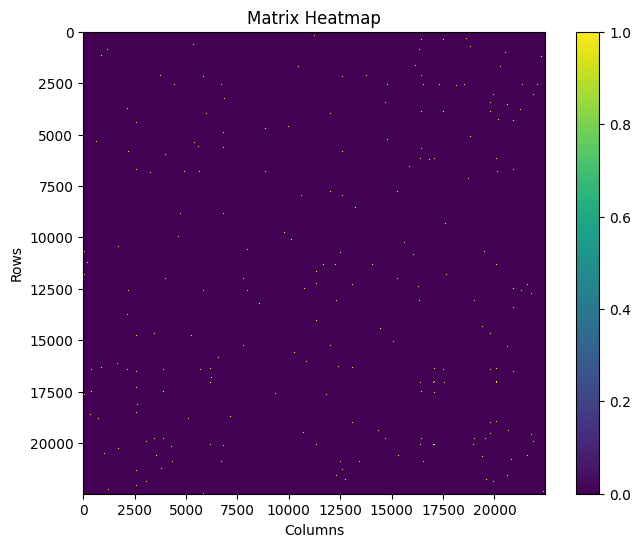

In [267]:
adj_matrix = nx.adjacency_matrix(G)
adj_matrix_dense = adj_matrix.toarray() 
plt.figure(figsize=(8, 6))
plt.imshow(adj_matrix_dense, cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.title('Matrix Heatmap')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()

In [1]:
len(com_inv)
order = [com_inv[node] for node in range(len(adj_matrix_dense))]
new_matrix = adj_matrix_dense[order]
print(order)

NameError: name 'com_inv' is not defined

In [288]:
order = list(np.zeros(len(adj_matrix_dense)))
for i in range(len(adj_matrix)):
    for key,value in final_com.items():
        if i in value:
            order[i]=key
print(order)
new_matrix = adj_matrix_dense[order]

[0, 1, 2, 3, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

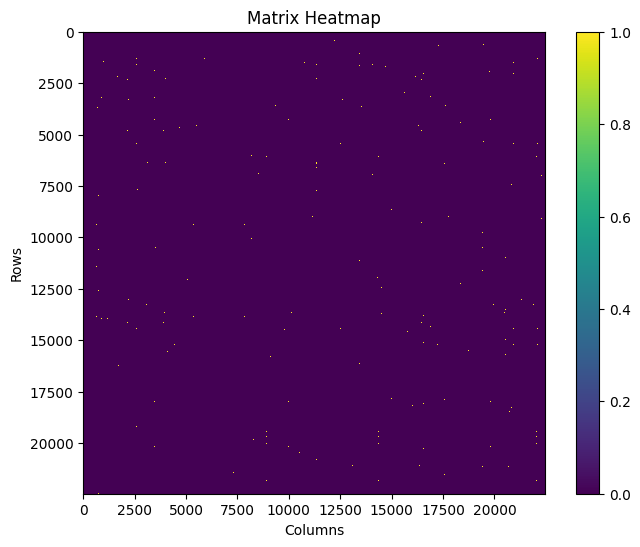

In [284]:
plt.figure(figsize=(8, 6))
plt.imshow(new_matrix, cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.title('Matrix Heatmap')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()

In [25]:
order = [node for community in communities for node in community] #[item for sublist in nested_list for item in sublist]

bulit_in = adj_matrix_dense[order]

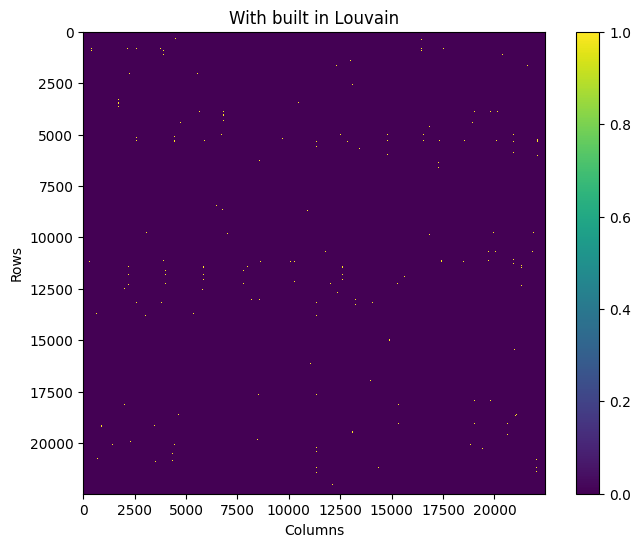

In [30]:
plt.figure(figsize=(8, 6))
plt.imshow(bulit_in, cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.title('With built in Louvain')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()

In [277]:
import numpy as np

# Example adjacency matrix
adj_matrix = np.array([
    [0, 1, 1, 0],
    [1, 0, 0, 1],
    [1, 0, 0, 1],
    [0, 1, 1, 0]
])

# Define a new order for rows and columns
new_order = [2, 0, 3, 1]  # Rearrange the rows and columns

# Rearrange both rows and columns of the adjacency matrix
adj_matrix_reordered = adj_matrix[new_order]
print("Original Adjacency Matrix:")
print(adj_matrix)
print("\nReordered Adjacency Matrix:")
print(adj_matrix_reordered)




Original Adjacency Matrix:
[[0 1 1 0]
 [1 0 0 1]
 [1 0 0 1]
 [0 1 1 0]]

Reordered Adjacency Matrix:
[[1 0 0 1]
 [0 1 1 0]
 [0 1 1 0]
 [1 0 0 1]]


In [32]:
graph = nx.read_edgelist("data/CA-GrQc.txt", nodetype = int)
N = nx.number_of_nodes(graph)
m = nx.number_of_edges(graph)
print("The number of nodes in the graph is: ",N)
print("The number of edges in the graph is:",m)

The number of nodes in the graph is:  5242
The number of edges in the graph is: 14496


In [48]:
A= nx.adjacency_matrix(graph).toarray() 

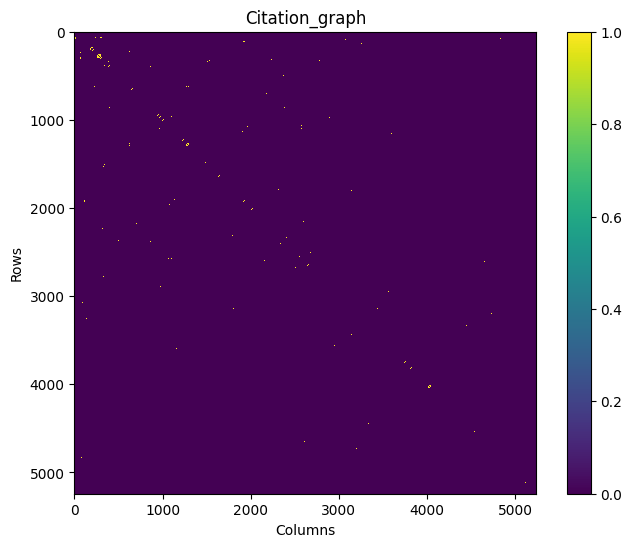

In [49]:
plt.figure(figsize=(8, 6))
plt.imshow(A, cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.title('Citation_graph')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()

In [50]:
citation_com = nx.community.louvain_communities(graph,seed=2)
print("There are",len(citation_com),"communities.")


There are 393 communities.


In [63]:
v = nx.community.modularity(graph,citation_com)
print(v)

0.8612342254002234


In [46]:
order = [node for comm in citation_com for node in comm] #[item for sublist in nested_list for item in sublist]
bulit_in = A[order]
plt.figure(figsize=(8, 6))
plt.imshow(A, cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.title('Citation_graph')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()

IndexError: index 24578 is out of bounds for axis 0 with size 5242

In [47]:
print(len(order))
print(len(A))

5242
5242


In [45]:
order

[1024,
 24578,
 24582,
 24583,
 13831,
 13832,
 6158,
 6160,
 19475,
 4635,
 8732,
 20000,
 12324,
 4135,
 15911,
 16937,
 15920,
 15931,
 1090,
 15947,
 14924,
 81,
 15959,
 15961,
 15455,
 16994,
 15972,
 23653,
 21613,
 23665,
 7281,
 11892,
 4213,
 124,
 3197,
 16513,
 18052,
 7307,
 25228,
 3725,
 19090,
 10898,
 18067,
 24722,
 19607,
 4759,
 24219,
 7324,
 20645,
 8870,
 8876,
 8365,
 18094,
 23727,
 8367,
 4275,
 17075,
 13493,
 11444,
 20663,
 8376,
 8888,
 13496,
 12472,
 9417,
 16589,
 23758,
 2255,
 23256,
 18141,
 23264,
 2789,
 10990,
 5366,
 16128,
 15617,
 22790,
 23302,
 12552,
 13067,
 12043,
 12045,
 8978,
 16659,
 1817,
 5402,
 283,
 24860,
 18720,
 20257,
 20258,
 4896,
 20261,
 10022,
 21806,
 15663,
 18742,
 18233,
 13625,
 9017,
 15166,
 9023,
 15170,
 1860,
 20806,
 1880,
 5465,
 20827,
 15198,
 14176,
 23394,
 18788,
 14181,
 18791,
 10600,
 22377,
 22890,
 18297,
 24444,
 5505,
 16770,
 8579,
 9095,
 3466,
 8589,
 26005,
 3990,
 24471,
 14746,
 9631,
 16801,


In [12]:
print(len(set(G.neighbors(1))))
i = 0
for c in G.neighbors(1):
    i+=1
print(i)

34
34


In [36]:
%%time
for _ in range(1000000):
    x = set(G.neighbors(1)).intersection({2,3})
len(x)


CPU times: user 1.63 s, sys: 2.45 ms, total: 1.63 s
Wall time: 1.63 s


0

In [38]:
%%time
for _ in range(1000000):
    x = set(G[1]).intersection({2,3})
len(x)

CPU times: user 1.91 s, sys: 0 ns, total: 1.91 s
Wall time: 1.92 s


0

In [17]:
for i in G[1]:
    print(i)

21708
22208
22171
6829
16590
20135
8894
15785
10281
22265
7136
22405
10379
13737
8533
14344
2812
5755
16260
15026
17370
17460
8049
5307
4987
18304
12305
19743
20024
21729
10554
11557
5228
9934


In [50]:
%%time
shared_edges = sum(1 for edge in G.edges() if edge[0] in {0,1} and edge[1] in {2})

CPU times: user 75.1 ms, sys: 3.87 ms, total: 79 ms
Wall time: 77.4 ms


In [48]:
shared_edges

0

In [49]:
len(G.edges())

171002

In [56]:
import random
nodes = G.nodes()
random.seed(2)
random.shuffle(nodes)

TypeError: 'NodeView' object does not support item assignment

In [57]:
nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 

In [69]:
def generate_hyper(com,G,node_degrees,com_inv):
    """Generates new coarse grain graph with each community as a single
    node.

    Weights between nodes are the sum of all weights between respective
    communities and self loops are added for the weights of he internal
    edges.
    """
    new_graph = nx.Graph()
    total_degrees = {}
    # Create nodes for each community.
    for community, members in com.items():
        new_graph.add_node(community, size=len(members))
        total_degrees[community] = sum(node_degrees[node] for node in members)
    nx.set_node_attributes(new_graph, total_degrees, 'total_degree')
    # Create the combined edges from the individual old edges.
    for u, v, w in G.edges(data="shared_degree", default=1):
        c1 = com_inv[u]
        c2 = com_inv[v]
        new_weight = w
        if new_graph.has_edge(c1, c2):
            new_weight += new_graph[c1][c2].get("shared_degree", 1)
        new_graph.add_edge(c1, c2, shared_degree=new_weight)
    return new_graph


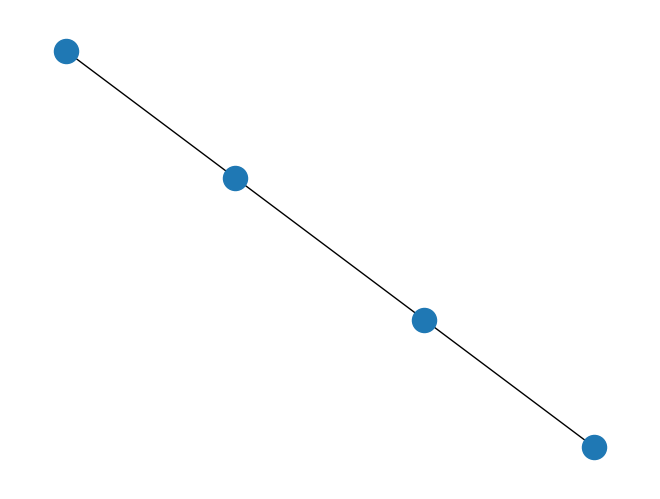

In [70]:
test_G = nx.Graph()
test_G.add_edge(0,1)
test_G.add_edge(1,2)
test_G.add_edge(2,3)
nx.draw(test_G)

In [71]:
com_test = {0:{0,1},1:{2,3}}
com_inv_test = {0:0,1:0,2:1,3:1}
nodes_degrees_test = G.degree()

In [73]:
hyper_test = generate_hyper(com_test,test_G,nodes_degrees_test,com_inv_test) #com,G,node_degrees,com_inv

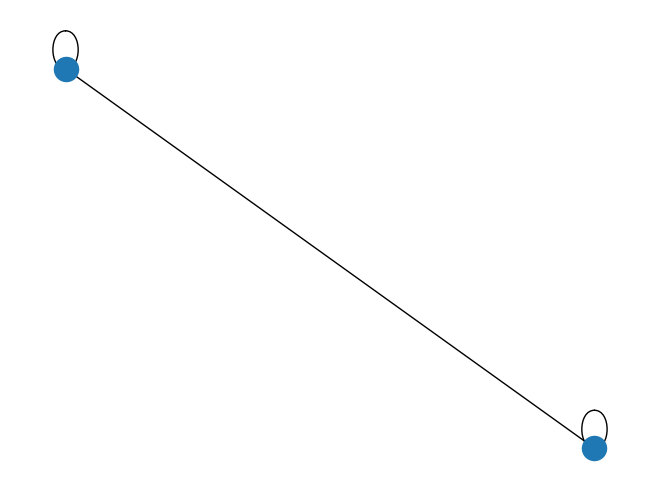

In [74]:
nx.draw(hyper_test)

In [79]:
hyper_test[0][0]['shared_degree']

1

In [80]:
t = {}
t[1] = {1}
t[2] = {2}
t[1].remove(1)
print(t)
print(t.drop)

{1: set()}


In [84]:
b = True
i = 0
while b:
    b = False
    i+=1
    if i<=1:
        b = True
    print(i)

1
2
